In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential, model_from_json
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, plot_roc_curve

# Rede Neural - Classificação Binária
## HoldOut

In [2]:
# Importando bade de dados
previsores = pd.read_csv('../dados/entradas_breast.csv')
classe = pd.read_csv('../dados/saidas_breast.csv')

In [3]:
previsores.head()

radius_mean   texture_mean   perimeter_mean   area_mean   smoothness_mean  \
0         17.99          10.38           122.80      1001.0           0.11840   
1         20.57          17.77           132.90      1326.0           0.08474   
2         19.69          21.25           130.00      1203.0           0.10960   
3         11.42          20.38            77.58       386.1           0.14250   
4         20.29          14.34           135.10      1297.0           0.10030   

    compactness_mean   concavity_mean  concave_points_mean   symmetry_mean  \
0            0.27760           0.3001              0.14710          0.2419   
1            0.07864           0.0869              0.07017          0.1812   
2            0.15990           0.1974              0.12790          0.2069   
3            0.28390           0.2414              0.10520          0.2597   
4            0.13280         198.0000              0.10430          0.1809   

    fractal_dimension_mean  ...   radius_worst   texture_worst  \
0                  0.07871  ...          25.38           17.33   
1                  0.05667  ...          24.99           23.41   
2                  0.05999  ...          23.57           25.53   
3                  0.09744  ...          14.91           26.50   
4                  0.05883  ...          22.54           16.67   

    perimeter_worst   area_worst   smoothness_worst   compactness_worst  \
0            184.60       2019.0             0.1622              0.6656   
1            158.80       1956.0             0.1238              0.1866   
2            152.50       1709.0             0.1444              0.4245   
3             98.87        567.7             0.2098              0.8663   
4            152.20       1575.0             0.1374            205.0000   

    concavity_worst   concave_points_worst   symmetry_worst  \
0            0.7119                 0.2654           0.4601   
1            0.2416               186.0000         275.0000   
2            0.4504               243.0000           0.3613   
3            0.6869                 0.2575           0.6638   
4            0.4000                 0.1625           0.2364   

    fractal_dimension_worst  
0                   0.11890  
1                   0.08902  
2                   0.08758  
3                 173.00000  
4                   0.07678  

[5 rows x 30 columns]

In [4]:
classe.head()

0
0  0
1  0
2  0
3  0
4  0

In [5]:
# Dividindo entre treino e teste HoldOut
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(previsores, classe, test_size = 0.25)

input_dim = quantidade de atributos previsores

units = quantidade de neuronios da primeira camada oculta, ((quaatidade de feature + Saídas) / 2) = ((30 + 1) / 2) = 15.5

activation = função de ativação

kernel_initializer = função de inicialização dos pesos

optimizer = função de otimização do gradient estocástico

loss = função de perda, calculo do erro

metrics = métrica de avaliação

batch_size = quantidade de registros a ser calculado o erro

epochs = quantidade de repetição

In [7]:
# Modificando parâmetros do adam
otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
# Criando estrutura da rede neural
classificador = Sequential()
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))
classificador.add(Dense(units = 16, activation = 'relu', kernel_initializer = 'random_uniform'))
classificador.add(Dense(units = 1, activation = 'sigmoid'))
# Compilando rede neural
classificador.compile(optimizer = otimizador, loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

In [8]:
# Resumo do modelo criado
classificador.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                496       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Treinamento e teste do modelo
results = classificador.fit(previsores_treinamento, classe_treinamento, batch_size = 10, epochs = 100, validation_data = (previsores_teste, classe_teste))

Epoch 1/100
43/43 [==============================] - 2s 35ms/step - loss: 1.5141 - binary_accuracy: 0.5535 - val_loss: 0.7294 - val_binary_accuracy: 0.6643
Epoch 2/100
43/43 [==============================] - 0s 3ms/step - loss: 0.5718 - binary_accuracy: 0.6722 - val_loss: 0.6213 - val_binary_accuracy: 0.6154
Epoch 3/100
43/43 [==============================] - 0s 3ms/step - loss: 0.5756 - binary_accuracy: 0.6702 - val_loss: 0.6172 - val_binary_accuracy: 0.7063
Epoch 4/100
43/43 [==============================] - 0s 3ms/step - loss: 0.5032 - binary_accuracy: 0.7682 - val_loss: 0.5221 - val_binary_accuracy: 0.7622
Epoch 5/100
43/43 [==============================] - 0s 3ms/step - loss: 0.4968 - binary_accuracy: 0.7789 - val_loss: 0.4140 - val_binary_accuracy: 0.8322
Epoch 6/100
43/43 [==============================] - 0s 6ms/step - loss: 0.4060 - binary_accuracy: 0.8584 - val_loss: 0.4205 - val_binary_accuracy: 0.7832
Epoch 7/100
43/43 [==============================] - 0s 3ms/step - lo

In [10]:
# Verificando resultados
results.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [11]:
# Realizando previsão do conjunto de teste
previsoes = classificador.predict(previsores_teste)
previsoes = (previsoes >= 0.5)

### Métricas de Avaliação

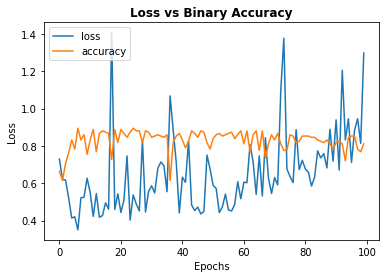

In [12]:
# Plotando val_loss e val_binary_accuracy do modelo 
plt.plot(results.history['val_loss'])
plt.plot(results.history['val_binary_accuracy'])
plt.title('Loss vs Binary Accuracy', fontweight = 'bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(title = '', labels = ['loss','accuracy'], ncol = 1, loc = 'upper left')

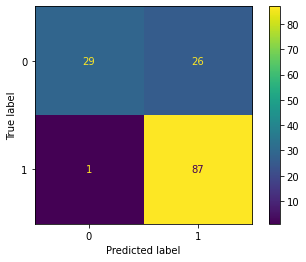

In [13]:
# Matriz de confusão
matriz = confusion_matrix(classe_teste, previsoes)
cm_display = ConfusionMatrixDisplay(matriz).plot()

In [14]:
# Accuracy usando sklearn (classe_teste x previsoes)
presicao = accuracy_score(classe_teste, previsoes)
presicao

0.8111888111888111

In [15]:
# Accuracy usando keras
resultado = classificador.evaluate(previsores_teste, classe_teste)
resultado

5/5 [==============================] - 0s 2ms/step - loss: 1.2981 - binary_accuracy: 0.8112


[1.2981165647506714, 0.811188817024231]

In [16]:
# Vizualização dos pesos
# Pesos da camada de entrada para primeira camada oculta
pesos0 = classificador.layers[0].get_weights()
# Pesos da primeira camada oculta para segunda camada oculta
pesos1 = classificador.layers[1].get_weights()
# Pesos da segunda camada oculta para camada de saída
pesos2 = classificador.layers[2].get_weights()

In [17]:
print(len(pesos0))

2


In [18]:
print(pesos0)

[array([[-3.86423580e-02, -1.37205884e-01, -6.57094344e-02,
        -5.92741221e-02, -4.24229391e-02,  2.31398176e-02,
        -4.30504866e-02, -3.05445623e-02, -3.50746396e-03,
         9.09565017e-02, -1.59080267e-01,  1.37170225e-01,
        -3.83190572e-01,  4.59158123e-02, -1.21354036e-01,
         6.32103160e-02],
       [ 1.78389922e-02, -2.02756852e-01,  2.85622589e-02,
        -6.26122355e-02, -2.43884828e-02, -1.66253582e-01,
        -3.28173228e-02, -1.06280735e-02, -7.16565643e-03,
         1.10413954e-01, -2.48610809e-01,  1.25914425e-01,
        -4.15003031e-01,  1.11291334e-02, -3.14233056e-03,
         1.81427926e-01],
       [-4.31963801e-02, -1.28261954e-01,  5.70881702e-02,
         9.13978517e-02, -3.77749428e-02, -3.50544006e-02,
        -1.44691300e-02,  1.58524543e-01,  7.40714930e-03,
        -3.15599553e-02, -3.82231101e-02, -3.75077613e-02,
        -2.96710610e-01, -3.25683318e-02, -6.59712628e-02,
         8.06906149e-02],
       [ 4.64985333e-02, -9.51180886

In [19]:
print(pesos1)

[array([[-2.89139897e-02,  3.78310531e-02,  2.43767370e-02,
        -4.06541638e-02,  8.06745365e-02,  5.56704123e-03,
         6.76103979e-02, -8.72807298e-03,  5.45118563e-02,
        -5.88389412e-02,  1.22861363e-01,  5.85934222e-02,
         2.41924599e-02, -1.40265049e-02, -2.30743904e-02,
        -4.46830802e-02],
       [-2.62187086e-02,  1.07552722e-01, -4.50939350e-02,
        -1.24198891e-01,  7.43275210e-02, -1.82896852e-02,
        -4.87766154e-02, -4.02709842e-02, -1.49975345e-01,
        -6.60222769e-02,  1.59023359e-01, -3.07975225e-02,
        -8.05231929e-02,  1.17874779e-02, -2.15378646e-02,
        -2.85820775e-02],
       [ 2.96724681e-03,  7.85662457e-02, -3.15370550e-03,
        -5.98093644e-02, -2.69415267e-02, -2.20151339e-02,
         1.02912828e-01, -1.09282732e-02, -8.03778097e-02,
        -9.62370913e-03, -1.23636518e-02,  4.00780663e-02,
         8.33686907e-03, -1.33331150e-01, -3.54619771e-02,
         4.42424752e-02],
       [-3.43512860e-04,  1.83902889

In [20]:
print(pesos2)

[array([[-0.3035517 ],
       [-0.23748143],
       [-0.38118348],
       [-0.41790652],
       [ 0.45040447],
       [ 0.1511652 ],
       [ 0.17903148],
       [-0.20276624],
       [ 0.6869903 ],
       [ 0.04456703],
       [ 0.36351988],
       [ 0.18178035],
       [-0.47866517],
       [ 0.09115734],
       [-0.4308125 ],
       [-0.62625915]], dtype=float32), array([0.2633875], dtype=float32)]


## Salvando e recuperando Rede Neural

In [ ]:
# Criando objeto json com estrutura da rede neural
classificador_json = classificador.to_json()

# Sanvando em disco arquivo com rede neural
with open('ClassificadorBreast.json', 'w') as json_file:
    json_file.write(classificador_json)

# Salvando os pesos da rede neural
classificador.save_weights('ClassificadorBreast.h5')

In [ ]:
# Nova instância para teste
novo = np.array([[15.80, 8.34, 118, 900, 0.10, 0.26, 0.08, 0.134, 0.178, 0.20, 
                  0.05, 1098, 0.87, 4500, 145.2, 0.005, 0.04, 0.05, 0.015, 0.03, 
                  0.007, 23.15, 16.64, 178.5, 2018, 0.14, 0.185, 0.84, 158, 0.363]])

# Realizando previsão
previsao = classificador.predict(novo)
previsao = (previsao > 0.5)
previsao

array([[ True]])

In [ ]:
# Carregando arquivo e lendo parâmetros da rede neural
arquivo = open('ClassificadorBreast.json', 'r')
estrutura_rede = arquivo.read()
arquivo.close()

# Atribuindo estrutura e pessos da rede neural
classificador = model_from_json(estrutura_rede)
classificador.load_weights('ClassificadorBreast.h5')

# Realizando previsão
previsao = classificador.predict(novo)
previsao = (previsao > 0.5)
previsao

array([[ True]])

# Rede Neural - Classificação Binária
## Validação Cruzada com K-fold 

In [21]:
# Criando função para rede neural
def criarRede():
    # Criando estrutura da rede neural
    classificador = Sequential()
    classificador.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'random_uniform', input_dim = 30))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))

    classificador.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 32, activation = 'relu', kernel_initializer = 'random_uniform'))
    classificador.add(Dropout(0.2))

    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    # Modificando parametros do adam
    # otimizador = keras.optimizers.Adam(lr = 0.001, decay = 0.0001, clipvalue = 0.5)
    
    # Compilando rede neural
    classificador.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])

    return classificador

In [22]:
# Parâmetros para treinamento, usando KerasClassifier
classificador = KerasClassifier(build_fn = criarRede, epochs = 100, batch_size = 10)

In [23]:
# Executando treinamento e teste usando validação cruzada com 10 folds
resultados = cross_val_score(estimator = classificador, X = previsores, y = classe, cv = 10, scoring = 'accuracy')

5/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1950 - binary_accuracy: 0.9295
Epoch 26/100
52/52 [==============================] - 0s 1ms/step - loss: 0.2042 - binary_accuracy: 0.9214
Epoch 27/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1783 - binary_accuracy: 0.9290
Epoch 28/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2198 - binary_accuracy: 0.9068
Epoch 29/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2242 - binary_accuracy: 0.9216
Epoch 30/100
52/52 [==============================] - 0s 2ms/step - loss: 0.2039 - binary_accuracy: 0.9139
Epoch 31/100
52/52 [==============================] - 0s 2ms/step - loss: 0.1755 - binary_accuracy: 0.9348
Epoch 32/100
52/52 [==============================] - 0s 1ms/step - loss: 0.2473 - binary_accuracy: 0.8837
Epoch 33/100
52/52 [==============================] - 0s 1ms/step - loss: 0.2127 - binary_accuracy: 0.9246
Epoch 34/100
52/52 [========================

### Métricas de Avaliação

In [24]:
# Média dos folds
media = resultados.mean()
media

0.8964285714285714

In [25]:
# Desvio padrão dos folds
desvio = resultados.std()
desvio

0.06389014515005369

# Rede Neural - Classificação Binária
## Validação Cruzada com K-fold e GridSearchCV

In [26]:
# Criando função para rede neural
def criarRede(optimizer, loos, kernel_initializer, activation, neurons):
    # Criando estrutura da rede neural
    classificador = Sequential()
    classificador.add(Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer, input_dim = 30))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = neurons, activation = activation, kernel_initializer = kernel_initializer))
    classificador.add(Dropout(0.2))
    classificador.add(Dense(units = 1, activation = 'sigmoid'))
    # Compilando rede neural
    classificador.compile(optimizer = optimizer, loss = loos, metrics = ['binary_accuracy'])

    return classificador

In [27]:
# Parâmetros para treinamento, usando KerasClassifier
classificador = KerasClassifier(build_fn = criarRede)

# Parâmetros para o GridSearchCV
parametros = {
    'batch_size': [10, 30],
    'epochs': [50, 100],
    'optimizer': ['adam', 'sgd'],
    'loos': ['binary_crossentropy', 'hinge'],
    'kernel_initializer': ['random_uniform', 'normal'],
    'activation': ['relu', 'tanh'],
    'neurons': [16, 8]
}

In [28]:
# Parâmetros para o execução do GridSearchCV
grid_search = GridSearchCV(estimator = classificador, param_grid = parametros, scoring = 'accuracy', cv = 5)

In [ ]:
# Executando treinamento e teste usando validação cruzada com 5 folds e GridSearchCV
grid_search = grid_search.fit(previsores, classe)

Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 1.3992 - binary_accuracy: 0.5475
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5611 - binary_accuracy: 0.6747
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6152 - binary_accuracy: 0.6302
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5488 - binary_accuracy: 0.7334
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4979 - binary_accuracy: 0.7422
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5099 - binary_accuracy: 0.6962
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4465 - binary_accuracy: 0.7729
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.4248 - binary_accuracy: 0.7746
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.3866 - binary_accuracy: 0.8107
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 1.3995 - binary_accuracy: 0.5639
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6308 - binary_accuracy: 0.6870
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5524 - binary_accuracy: 0.6927
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4911 - binary_accuracy: 0.6987
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4741 - binary_accuracy: 0.7466
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4457 - binary_accuracy: 0.8060
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4178 - binary_accuracy: 0.7854
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4362 - binary_accuracy: 0.7343
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4314 - binary_accuracy: 0.7953
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 1.4997 - binary_accuracy: 0.5898
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6013 - binary_accuracy: 0.6657
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6260 - binary_accuracy: 0.7517
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.4950 - binary_accuracy: 0.7484
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4434 - binary_accuracy: 0.7772
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5047 - binary_accuracy: 0.7424
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4666 - binary_accuracy: 0.7639
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.4018 - binary_accuracy: 0.8014
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.3946 - binary_accuracy: 0.8339
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 2.7076 - binary_accuracy: 0.5018
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6792 - binary_accuracy: 0.6674
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5477 - binary_accuracy: 0.7311
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4533 - binary_accuracy: 0.7561
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4883 - binary_accuracy: 0.7617
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.4653 - binary_accuracy: 0.8141
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4284 - binary_accuracy: 0.8294
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.3807 - binary_accuracy: 0.8605
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.3746 - binary_accuracy: 0.8800
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 1.7275 - binary_accuracy: 0.5132
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6651 - binary_accuracy: 0.5640
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6006 - binary_accuracy: 0.5675
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6379 - binary_accuracy: 0.5815
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5303 - binary_accuracy: 0.6861
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.4964 - binary_accuracy: 0.6884
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4758 - binary_accuracy: 0.7420
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4584 - binary_accuracy: 0.7680
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.4999 - binary_accuracy: 0.7666
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 17.7855 - binary_accuracy: 0.5774
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 147.7743 - binary_accuracy: 0.6600
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6627 - binary_accuracy: 0.6838
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6614 - binary_accuracy: 0.6592
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6549 - binary_accuracy: 0.6815
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6392 - binary_accuracy: 0.6874
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6377 - binary_accuracy: 0.6567
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6378 - binary_accuracy: 0.6854
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6438 - binary_accuracy: 0.6586
Epoch 10/50
46/46 [==============================] -

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 6.0083 - binary_accuracy: 0.5437
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6737 - binary_accuracy: 0.6506
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6616 - binary_accuracy: 0.6253
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6313 - binary_accuracy: 0.6258
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6239 - binary_accuracy: 0.6323
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6141 - binary_accuracy: 0.6283
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6119 - binary_accuracy: 0.6393
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6329 - binary_accuracy: 0.6338
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6178 - binary_accuracy: 0.6200
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 216.3680 - binary_accuracy: 0.5760
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6944 - binary_accuracy: 0.6448
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6792 - binary_accuracy: 0.6092
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6747 - binary_accuracy: 0.6195
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6696 - binary_accuracy: 0.6001
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6639 - binary_accuracy: 0.6248
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6718 - binary_accuracy: 0.6025
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6627 - binary_accuracy: 0.6292
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6727 - binary_accuracy: 0.6050
Epoch 10/50
46/46 [==============================] - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 4.0811 - binary_accuracy: 0.5779
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6428 - binary_accuracy: 0.5742
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6239 - binary_accuracy: 0.5966
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6168 - binary_accuracy: 0.6034
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6354 - binary_accuracy: 0.6242
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6221 - binary_accuracy: 0.5725
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6121 - binary_accuracy: 0.6087
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6232 - binary_accuracy: 0.5791
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6108 - binary_accuracy: 0.5952
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 10.1174 - binary_accuracy: 0.5500
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6775 - binary_accuracy: 0.6024
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6337 - binary_accuracy: 0.5881
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6407 - binary_accuracy: 0.5455
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6514 - binary_accuracy: 0.5753
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6450 - binary_accuracy: 0.6020
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6431 - binary_accuracy: 0.5609
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6263 - binary_accuracy: 0.6278
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6495 - binary_accuracy: 0.5992
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 0.9842 - binary_accuracy: 0.6675
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6213 - binary_accuracy: 0.7062
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5596 - binary_accuracy: 0.7171
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5620 - binary_accuracy: 0.7039
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5122 - binary_accuracy: 0.7011
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5325 - binary_accuracy: 0.7143
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5177 - binary_accuracy: 0.6543
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.4321 - binary_accuracy: 0.7549
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4507 - binary_accuracy: 0.7534
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7969 - binary_accuracy: 0.5196
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6411 - binary_accuracy: 0.5820
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5850 - binary_accuracy: 0.6354
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5601 - binary_accuracy: 0.6395
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5945 - binary_accuracy: 0.6218
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5962 - binary_accuracy: 0.6446
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5612 - binary_accuracy: 0.6344
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5676 - binary_accuracy: 0.6587
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5322 - binary_accuracy: 0.6901
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 4.4344 - binary_accuracy: 0.5576
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7778 - binary_accuracy: 0.5637
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5861 - binary_accuracy: 0.6793
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6438 - binary_accuracy: 0.6350
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6264 - binary_accuracy: 0.6173
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5711 - binary_accuracy: 0.6497
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5690 - binary_accuracy: 0.6566
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5490 - binary_accuracy: 0.6666
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5780 - binary_accuracy: 0.6656
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 1.7116 - binary_accuracy: 0.5459
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7220 - binary_accuracy: 0.5662
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6530 - binary_accuracy: 0.6036
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6266 - binary_accuracy: 0.5541
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5876 - binary_accuracy: 0.6274
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6114 - binary_accuracy: 0.6300
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5762 - binary_accuracy: 0.6616
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5709 - binary_accuracy: 0.6699
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5524 - binary_accuracy: 0.6496
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 0.9475 - binary_accuracy: 0.4820
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6287 - binary_accuracy: 0.5634
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6107 - binary_accuracy: 0.5667
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5820 - binary_accuracy: 0.6396
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5539 - binary_accuracy: 0.6411
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5437 - binary_accuracy: 0.6247
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5374 - binary_accuracy: 0.6605
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5106 - binary_accuracy: 0.6843
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5579 - binary_accuracy: 0.6669
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 6.1811 - binary_accuracy: 0.6517
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6261 - binary_accuracy: 0.6715
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6043 - binary_accuracy: 0.6808
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6035 - binary_accuracy: 0.7049
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5960 - binary_accuracy: 0.6774
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5961 - binary_accuracy: 0.6776
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5899 - binary_accuracy: 0.6874
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6201 - binary_accuracy: 0.6623
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5918 - binary_accuracy: 0.6858
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 1.1562 - binary_accuracy: 0.6283
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6162 - binary_accuracy: 0.5964
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6042 - binary_accuracy: 0.6351
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 1.0237 - binary_accuracy: 0.6382
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6417 - binary_accuracy: 0.6955
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6116 - binary_accuracy: 0.6520
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6034 - binary_accuracy: 0.6444
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6166 - binary_accuracy: 0.6281
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6158 - binary_accuracy: 0.6392
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 1.6450 - binary_accuracy: 0.5878
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6865 - binary_accuracy: 0.6146
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6826 - binary_accuracy: 0.6103
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6700 - binary_accuracy: 0.6707
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6726 - binary_accuracy: 0.6320
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6726 - binary_accuracy: 0.6207
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6814 - binary_accuracy: 0.5776
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6685 - binary_accuracy: 0.6235
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6683 - binary_accuracy: 0.6209
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 6.3521 - binary_accuracy: 0.5230
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6774 - binary_accuracy: 0.5674
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6779 - binary_accuracy: 0.5836
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6666 - binary_accuracy: 0.6188
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8134 - binary_accuracy: 0.5833
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6816 - binary_accuracy: 0.5907
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6561
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6728 - binary_accuracy: 0.6244
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7971 - binary_accuracy: 0.6016
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 13.3241 - binary_accuracy: 0.5506
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6895 - binary_accuracy: 0.5838
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6855 - binary_accuracy: 0.6048
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6893 - binary_accuracy: 0.5471
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6836 - binary_accuracy: 0.5850
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6800 - binary_accuracy: 0.5990
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6804 - binary_accuracy: 0.5907
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6779 - binary_accuracy: 0.6000
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6776 - binary_accuracy: 0.5980
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6727 - binary_accuracy: 0.6308
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6537 - binary_accuracy: 0.6725
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5770 - binary_accuracy: 0.7126
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6815 - binary_accuracy: 0.6592
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7076 - binary_accuracy: 0.6417
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7074 - binary_accuracy: 0.6463
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6361 - binary_accuracy: 0.6820
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6092 - binary_accuracy: 0.6954
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6338 - binary_accuracy: 0.6835
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8305 - binary_accuracy: 0.5589
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7359 - binary_accuracy: 0.6228
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7273 - binary_accuracy: 0.6551
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7375 - binary_accuracy: 0.6279
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6823 - binary_accuracy: 0.6589
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7698 - binary_accuracy: 0.6153
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7300 - binary_accuracy: 0.6355
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6723
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7428 - binary_accuracy: 0.6286
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7276 - binary_accuracy: 0.6370
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7302 - binary_accuracy: 0.6351
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6822 - binary_accuracy: 0.6590
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6362 - binary_accuracy: 0.6822
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7368 - binary_accuracy: 0.6319
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7613 - binary_accuracy: 0.6193
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7021 - binary_accuracy: 0.6489
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6866 - binary_accuracy: 0.6571
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7067 - binary_accuracy: 0.6472
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9363 - binary_accuracy: 0.4668
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8573 - binary_accuracy: 0.5831
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7848 - binary_accuracy: 0.6037
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7272 - binary_accuracy: 0.6796
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6905 - binary_accuracy: 0.7504
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7062 - binary_accuracy: 0.7106
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6559 - binary_accuracy: 0.7742
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6680 - binary_accuracy: 0.7719
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6572 - binary_accuracy: 0.7769
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8890 - binary_accuracy: 0.5313
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7982 - binary_accuracy: 0.6101
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8058 - binary_accuracy: 0.6022
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7745 - binary_accuracy: 0.6377
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7904 - binary_accuracy: 0.6344
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8084 - binary_accuracy: 0.5917
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7697 - binary_accuracy: 0.6170
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8575 - binary_accuracy: 0.5710
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7412 - binary_accuracy: 0.6204
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8856 - binary_accuracy: 0.4770
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6330 - binary_accuracy: 0.6837
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5879 - binary_accuracy: 0.7058
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6415 - binary_accuracy: 0.6791
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5932 - binary_accuracy: 0.7040
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6364 - binary_accuracy: 0.6827
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5992 - binary_accuracy: 0.7005
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6262 - binary_accuracy: 0.6879
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6160 - binary_accuracy: 0.6857
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 0.7835 - binary_accuracy: 0.5844
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6870 - binary_accuracy: 0.6589
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7875 - binary_accuracy: 0.6036
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6500 - binary_accuracy: 0.6753
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7324 - binary_accuracy: 0.6338
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6854 - binary_accuracy: 0.6576
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7769 - binary_accuracy: 0.6117
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7337 - binary_accuracy: 0.6335
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7340 - binary_accuracy: 0.6335
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7388 - binary_accuracy: 0.6051
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6687 - binary_accuracy: 0.6606
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7327 - binary_accuracy: 0.6341
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7454 - binary_accuracy: 0.6270
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8069 - binary_accuracy: 0.5961
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7648 - binary_accuracy: 0.6191
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7164 - binary_accuracy: 0.6430
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7821 - binary_accuracy: 0.6090
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7586 - binary_accuracy: 0.6207
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8300 - binary_accuracy: 0.5615
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7701 - binary_accuracy: 0.6107
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8074 - binary_accuracy: 0.5963
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7621 - binary_accuracy: 0.6189
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8737 - binary_accuracy: 0.5632
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7813 - binary_accuracy: 0.6096
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7632 - binary_accuracy: 0.6185
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7448 - binary_accuracy: 0.6276
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6943 - binary_accuracy: 0.6529
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 0.9384 - binary_accuracy: 0.4644
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.6016
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8239 - binary_accuracy: 0.5882
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8523 - binary_accuracy: 0.5758
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8144 - binary_accuracy: 0.5944
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7660 - binary_accuracy: 0.6188
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8473 - binary_accuracy: 0.5767
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8135 - binary_accuracy: 0.5917
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7693 - binary_accuracy: 0.6140
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 0.6737 - binary_accuracy: 0.6404
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6502 - binary_accuracy: 0.6709
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7225 - binary_accuracy: 0.6539
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6490 - binary_accuracy: 0.6732
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6246 - binary_accuracy: 0.6828
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6182 - binary_accuracy: 0.6959
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6141 - binary_accuracy: 0.6947
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5276 - binary_accuracy: 0.7373
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6073 - binary_accuracy: 0.6970
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8217 - binary_accuracy: 0.4940
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8223 - binary_accuracy: 0.5636
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8202 - binary_accuracy: 0.6666
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7123 - binary_accuracy: 0.7225
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7322 - binary_accuracy: 0.6605
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7562 - binary_accuracy: 0.6268
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7022 - binary_accuracy: 0.6496
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7256 - binary_accuracy: 0.6443
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6520 - binary_accuracy: 0.6864
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 0.7677 - binary_accuracy: 0.6296
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7598 - binary_accuracy: 0.6430
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7346 - binary_accuracy: 0.6589
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7745 - binary_accuracy: 0.5905
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7229 - binary_accuracy: 0.6950
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7101 - binary_accuracy: 0.6778
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7439 - binary_accuracy: 0.6309
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7829 - binary_accuracy: 0.6209
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7245 - binary_accuracy: 0.6759
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 0.9579 - binary_accuracy: 0.4744
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8463 - binary_accuracy: 0.5849
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7719 - binary_accuracy: 0.6623
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7678 - binary_accuracy: 0.6562
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7466 - binary_accuracy: 0.6566
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7293 - binary_accuracy: 0.7042
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6834 - binary_accuracy: 0.6886
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.7140
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6204 - binary_accuracy: 0.7567
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8428 - binary_accuracy: 0.5711
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8294 - binary_accuracy: 0.5905
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8215 - binary_accuracy: 0.6198
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7871 - binary_accuracy: 0.6115
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7964 - binary_accuracy: 0.6486
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6855 - binary_accuracy: 0.7126
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7306 - binary_accuracy: 0.6715
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7175 - binary_accuracy: 0.7155
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.7612
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6912 - binary_accuracy: 0.5968
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6342 - binary_accuracy: 0.6885
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6370 - binary_accuracy: 0.6813
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6459 - binary_accuracy: 0.6778
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6024 - binary_accuracy: 0.6992
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6418 - binary_accuracy: 0.6795
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6700
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7098 - binary_accuracy: 0.6489
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5811 - binary_accuracy: 0.7058
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7494 - binary_accuracy: 0.6207
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7341 - binary_accuracy: 0.6341
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7592 - binary_accuracy: 0.6213
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6969 - binary_accuracy: 0.6534
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7276 - binary_accuracy: 0.6417
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6212 - binary_accuracy: 0.6802
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7018 - binary_accuracy: 0.6474
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6928 - binary_accuracy: 0.6540
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7373 - binary_accuracy: 0.6316
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8490 - binary_accuracy: 0.5691
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7690 - binary_accuracy: 0.6165
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7917 - binary_accuracy: 0.6070
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7021 - binary_accuracy: 0.6526
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8784 - binary_accuracy: 0.5683
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7908 - binary_accuracy: 0.6064
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7347 - binary_accuracy: 0.6383
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7720 - binary_accuracy: 0.6124
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7730 - binary_accuracy: 0.6188
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8924 - binary_accuracy: 0.4973
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7544 - binary_accuracy: 0.6211
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8111 - binary_accuracy: 0.6057
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8677 - binary_accuracy: 0.5691
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8493 - binary_accuracy: 0.5760
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8406 - binary_accuracy: 0.5838
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7910 - binary_accuracy: 0.6064
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7593 - binary_accuracy: 0.6197
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7970 - binary_accuracy: 0.6085
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8247 - binary_accuracy: 0.5905
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7591 - binary_accuracy: 0.6215
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8300 - binary_accuracy: 0.5858
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7894 - binary_accuracy: 0.6079
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7784 - binary_accuracy: 0.6123
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7982 - binary_accuracy: 0.5974
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8367 - binary_accuracy: 0.5817
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8505 - binary_accuracy: 0.5734
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7402 - binary_accuracy: 0.6322
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 14.3506 - binary_accuracy: 0.5303
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 2.5056 - binary_accuracy: 0.6231
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 1.0383 - binary_accuracy: 0.6447
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8670 - binary_accuracy: 0.6401
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6958
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6010 - binary_accuracy: 0.7395
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6297 - binary_accuracy: 0.6492
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6075 - binary_accuracy: 0.6756
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4735 - binary_accuracy: 0.7101
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 4.0164 - binary_accuracy: 0.5337
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 1.5078 - binary_accuracy: 0.6043
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9448 - binary_accuracy: 0.6456
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6106 - binary_accuracy: 0.7126
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5758 - binary_accuracy: 0.7016
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4605 - binary_accuracy: 0.7671
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5752 - binary_accuracy: 0.7366
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4311 - binary_accuracy: 0.7990
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4207 - binary_accuracy: 0.7688
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 5.0532 - binary_accuracy: 0.5745
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 1.8128 - binary_accuracy: 0.6366
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8105 - binary_accuracy: 0.6160
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5757 - binary_accuracy: 0.6940
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5978 - binary_accuracy: 0.7042
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6402 - binary_accuracy: 0.6781
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6420 - binary_accuracy: 0.6436
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5282 - binary_accuracy: 0.6949
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5631 - binary_accuracy: 0.6387
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 6.7656 - binary_accuracy: 0.5717
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 2.5119 - binary_accuracy: 0.5558
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9963 - binary_accuracy: 0.6468
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8369 - binary_accuracy: 0.6443
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7361 - binary_accuracy: 0.6822
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7281 - binary_accuracy: 0.6534
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6063 - binary_accuracy: 0.6726
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5621 - binary_accuracy: 0.6273
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5125 - binary_accuracy: 0.6786
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 5.5804 - binary_accuracy: 0.5051
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 1.6709 - binary_accuracy: 0.5504
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7579 - binary_accuracy: 0.6247
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6109 - binary_accuracy: 0.6362
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6716 - binary_accuracy: 0.6141
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6687 - binary_accuracy: 0.6090
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6536 - binary_accuracy: 0.6406
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5175 - binary_accuracy: 0.7373
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.4942 - binary_accuracy: 0.7317
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 197.7494 - binary_accuracy: 0.6301
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 78.5649 - binary_accuracy: 0.6640
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6516 - binary_accuracy: 0.6859
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6190 - binary_accuracy: 0.7407
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 2.4310 - binary_accuracy: 0.6970
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 1309.0650 - binary_accuracy: 0.6647
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6429 - binary_accuracy: 0.6896
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6360 - binary_accuracy: 0.6965
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6280 - binary_accuracy: 0.7050
Epoch 10/50
46/46 [==============================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 30.7127 - binary_accuracy: 0.5675
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6402 - binary_accuracy: 0.6689
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6368 - binary_accuracy: 0.6143
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9533 - binary_accuracy: 0.6234
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6215 - binary_accuracy: 0.6602
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6259 - binary_accuracy: 0.6414
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6132 - binary_accuracy: 0.6404
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6022 - binary_accuracy: 0.6568
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6349 - binary_accuracy: 0.5845
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 2ms/step - loss: 350432.8113 - binary_accuracy: 0.5296
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6407 - binary_accuracy: 0.6525
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6414 - binary_accuracy: 0.6008
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6139 - binary_accuracy: 0.6099
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6138 - binary_accuracy: 0.6249
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.5935 - binary_accuracy: 0.6353
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6261 - binary_accuracy: 0.6194
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6247 - binary_accuracy: 0.6127
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6262 - binary_accuracy: 0.6040
Epoch 10/50
46/46 [==============================]

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 293.8224 - binary_accuracy: 0.5653
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8542 - binary_accuracy: 0.6049
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 3.9795 - binary_accuracy: 0.6008
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6500 - binary_accuracy: 0.5594
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6417 - binary_accuracy: 0.5941
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6508 - binary_accuracy: 0.5888
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6426 - binary_accuracy: 0.6282
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6395 - binary_accuracy: 0.6080
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6446 - binary_accuracy: 0.5766
Epoch 10/50
46/46 [==============================] - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 19.6849 - binary_accuracy: 0.5840
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7124 - binary_accuracy: 0.5786
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6795 - binary_accuracy: 0.6143
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6737 - binary_accuracy: 0.5695
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.5763
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6614 - binary_accuracy: 0.5956
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6626 - binary_accuracy: 0.5926
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.5858
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6646 - binary_accuracy: 0.5864
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 1.1501 - binary_accuracy: 0.5949
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8157 - binary_accuracy: 0.6503
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7311 - binary_accuracy: 0.6536
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6104 - binary_accuracy: 0.6976
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5900 - binary_accuracy: 0.7157
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6514 - binary_accuracy: 0.6157
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5568 - binary_accuracy: 0.7300
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5620 - binary_accuracy: 0.6739
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5410 - binary_accuracy: 0.7650
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 5.9131 - binary_accuracy: 0.6232
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8357 - binary_accuracy: 0.6449
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7425 - binary_accuracy: 0.6636
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6913 - binary_accuracy: 0.6454
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6308 - binary_accuracy: 0.6289
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5914 - binary_accuracy: 0.6733
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6183 - binary_accuracy: 0.6909
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5333 - binary_accuracy: 0.7461
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5290 - binary_accuracy: 0.7478
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 13.1695 - binary_accuracy: 0.4996
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 2.3213 - binary_accuracy: 0.5519
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 1.1370 - binary_accuracy: 0.5343
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8033 - binary_accuracy: 0.5542
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6967 - binary_accuracy: 0.6100
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6439 - binary_accuracy: 0.5771
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6317 - binary_accuracy: 0.5904
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.6248
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5899 - binary_accuracy: 0.6138
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 4.3497 - binary_accuracy: 0.5981
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8707 - binary_accuracy: 0.5181
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7238 - binary_accuracy: 0.4984
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6642 - binary_accuracy: 0.5912
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6824 - binary_accuracy: 0.6182
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5856 - binary_accuracy: 0.6496
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5612 - binary_accuracy: 0.6592
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5632 - binary_accuracy: 0.6305
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6132 - binary_accuracy: 0.5198
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 2.8691 - binary_accuracy: 0.4723
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7270 - binary_accuracy: 0.5901
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6260 - binary_accuracy: 0.6119
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.5793
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6192 - binary_accuracy: 0.6584
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5640 - binary_accuracy: 0.6226
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6231 - binary_accuracy: 0.6240
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5736 - binary_accuracy: 0.6265
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5427 - binary_accuracy: 0.6331
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 49.6783 - binary_accuracy: 0.6010
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6529 - binary_accuracy: 0.6425
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6354 - binary_accuracy: 0.6864
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6013 - binary_accuracy: 0.6724
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6247 - binary_accuracy: 0.6742
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6071 - binary_accuracy: 0.7009
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5873 - binary_accuracy: 0.7249
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6172 - binary_accuracy: 0.6606
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8008 - binary_accuracy: 0.6400
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 1.4588 - binary_accuracy: 0.5886
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7063 - binary_accuracy: 0.6186
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6442
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6673 - binary_accuracy: 0.6524
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6349
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6351 - binary_accuracy: 0.6359
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6302 - binary_accuracy: 0.6381
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6144 - binary_accuracy: 0.6663
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6086 - binary_accuracy: 0.6533
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 1ms/step - loss: 23.2038 - binary_accuracy: 0.5666
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6352 - binary_accuracy: 0.6159
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6550 - binary_accuracy: 0.6309
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6483 - binary_accuracy: 0.6113
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6504 - binary_accuracy: 0.6180
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6413 - binary_accuracy: 0.6265
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6370 - binary_accuracy: 0.6196
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6376 - binary_accuracy: 0.6330
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_accuracy: 0.6122
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 8.6088 - binary_accuracy: 0.5663
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6875 - binary_accuracy: 0.6141
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6857 - binary_accuracy: 0.5949
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6856 - binary_accuracy: 0.5771
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6833 - binary_accuracy: 0.5851
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6846 - binary_accuracy: 0.5705
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6819 - binary_accuracy: 0.5813
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6780 - binary_accuracy: 0.5958
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6783 - binary_accuracy: 0.5921
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 23.0761 - binary_accuracy: 0.5482
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6924 - binary_accuracy: 0.5857
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6799 - binary_accuracy: 0.6074
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6835 - binary_accuracy: 0.5739
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.5964
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6153
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6727 - binary_accuracy: 0.6145
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.5949
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6884 - binary_accuracy: 0.5422
Epoch 10/50
46/46 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9721 - binary_accuracy: 0.3443
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.6502
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5701 - binary_accuracy: 0.7121
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6109 - binary_accuracy: 0.6961
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.6635
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6285 - binary_accuracy: 0.6859
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6451 - binary_accuracy: 0.6791
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6341 - binary_accuracy: 0.6851
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5920 - binary_accuracy: 0.7015
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7473 - binary_accuracy: 0.6253
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6010 - binary_accuracy: 0.7027
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6843 - binary_accuracy: 0.6547
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7018 - binary_accuracy: 0.6452
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6763 - binary_accuracy: 0.6585
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7571 - binary_accuracy: 0.6221
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7195 - binary_accuracy: 0.6432
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6929 - binary_accuracy: 0.6539
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7372 - binary_accuracy: 0.6281
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9057 - binary_accuracy: 0.4549
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8679 - binary_accuracy: 0.5075
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7765 - binary_accuracy: 0.6002
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8012 - binary_accuracy: 0.5758
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7242 - binary_accuracy: 0.6639
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7576 - binary_accuracy: 0.6100
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7828 - binary_accuracy: 0.6044
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7192 - binary_accuracy: 0.6234
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7372 - binary_accuracy: 0.6487
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9520 - binary_accuracy: 0.4375
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8280 - binary_accuracy: 0.5737
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7736 - binary_accuracy: 0.6280
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7444 - binary_accuracy: 0.6649
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8131 - binary_accuracy: 0.6378
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7612 - binary_accuracy: 0.6168
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7044 - binary_accuracy: 0.7052
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.7224
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7038 - binary_accuracy: 0.6980
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8898 - binary_accuracy: 0.5270
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7758 - binary_accuracy: 0.5868
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7907 - binary_accuracy: 0.6046
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8045 - binary_accuracy: 0.6254
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7696 - binary_accuracy: 0.6529
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8014 - binary_accuracy: 0.5934
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7535 - binary_accuracy: 0.6533
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7175 - binary_accuracy: 0.6690
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6952 - binary_accuracy: 0.6590
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8243 - binary_accuracy: 0.4960
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6564 - binary_accuracy: 0.6600
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6199 - binary_accuracy: 0.6846
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5254 - binary_accuracy: 0.7433
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6352 - binary_accuracy: 0.6809
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6078 - binary_accuracy: 0.6924
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6931 - binary_accuracy: 0.6542
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5574 - binary_accuracy: 0.7225
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6527 - binary_accuracy: 0.6614
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7321 - binary_accuracy: 0.6241
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7097 - binary_accuracy: 0.6418
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6514 - binary_accuracy: 0.6760
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7797 - binary_accuracy: 0.6078
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7564 - binary_accuracy: 0.6198
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7832 - binary_accuracy: 0.6062
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6860 - binary_accuracy: 0.6565
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7073 - binary_accuracy: 0.6446
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6801 - binary_accuracy: 0.6596
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9279 - binary_accuracy: 0.4359
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9295 - binary_accuracy: 0.4751
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.9141 - binary_accuracy: 0.5053
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8944 - binary_accuracy: 0.4584
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8840 - binary_accuracy: 0.4933
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8302 - binary_accuracy: 0.5667
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8255 - binary_accuracy: 0.5320
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8660 - binary_accuracy: 0.5191
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7653 - binary_accuracy: 0.6043
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8137 - binary_accuracy: 0.5818
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8702 - binary_accuracy: 0.5621
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8588 - binary_accuracy: 0.5654
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8226 - binary_accuracy: 0.5833
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8091 - binary_accuracy: 0.5955
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8456 - binary_accuracy: 0.5760
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8596 - binary_accuracy: 0.5702
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8454 - binary_accuracy: 0.5773
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7577 - binary_accuracy: 0.6211
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7341 - binary_accuracy: 0.6274
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8031 - binary_accuracy: 0.6006
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7968 - binary_accuracy: 0.6071
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8023 - binary_accuracy: 0.5990
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7823 - binary_accuracy: 0.6097
Epoch 6/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7996 - binary_accuracy: 0.5994
Epoch 7/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8207 - binary_accuracy: 0.5897
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7468 - binary_accuracy: 0.6289
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8187 - binary_accuracy: 0.5918
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9578 - binary_accuracy: 0.3406
Epoch 2/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8609 - binary_accuracy: 0.4714
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6423 - binary_accuracy: 0.6507
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6716 - binary_accuracy: 0.6536
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6969 - binary_accuracy: 0.6494
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6834 - binary_accuracy: 0.6596
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6399 - binary_accuracy: 0.6721
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6237 - binary_accuracy: 0.6909
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6816 - binary_accuracy: 0.6563
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7802 - binary_accuracy: 0.6090
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6906 - binary_accuracy: 0.6661
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8000 - binary_accuracy: 0.5981
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6703
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8007 - binary_accuracy: 0.5980
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7130 - binary_accuracy: 0.6486
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6593 - binary_accuracy: 0.6694
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6356 - binary_accuracy: 0.6833
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7732 - binary_accuracy: 0.6164
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8863 - binary_accuracy: 0.4928
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8746 - binary_accuracy: 0.5114
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7264 - binary_accuracy: 0.6124
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8408 - binary_accuracy: 0.5436
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8406 - binary_accuracy: 0.5648
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7869 - binary_accuracy: 0.5924
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8994 - binary_accuracy: 0.5275
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7332 - binary_accuracy: 0.6312
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8551 - binary_accuracy: 0.5713
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9574 - binary_accuracy: 0.4546
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9130 - binary_accuracy: 0.5095
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8890 - binary_accuracy: 0.5539
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7464 - binary_accuracy: 0.6750
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7842 - binary_accuracy: 0.6479
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7490 - binary_accuracy: 0.6652
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7570 - binary_accuracy: 0.6149
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7964 - binary_accuracy: 0.6264
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7474 - binary_accuracy: 0.6740
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8653 - binary_accuracy: 0.5211
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8900 - binary_accuracy: 0.5378
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8507 - binary_accuracy: 0.5443
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8176 - binary_accuracy: 0.5955
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8214 - binary_accuracy: 0.6174
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7716 - binary_accuracy: 0.6383
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7523 - binary_accuracy: 0.6669
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7477 - binary_accuracy: 0.6421
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8376 - binary_accuracy: 0.5922
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6716 - binary_accuracy: 0.6442
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7172 - binary_accuracy: 0.6214
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6045 - binary_accuracy: 0.6998
Epoch 4/50
46/46 [==============================] - 0s 1ms/step - loss: 0.6527 - binary_accuracy: 0.6757
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6249 - binary_accuracy: 0.6881
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6706 - binary_accuracy: 0.6643
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6692
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6340 - binary_accuracy: 0.6841
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6117 - binary_accuracy: 0.6951
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8683 - binary_accuracy: 0.5136
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7985 - binary_accuracy: 0.5377
Epoch 3/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8114 - binary_accuracy: 0.5660
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8067 - binary_accuracy: 0.5888
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7197 - binary_accuracy: 0.6540
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7413 - binary_accuracy: 0.6593
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8111 - binary_accuracy: 0.6050
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7579 - binary_accuracy: 0.6124
Epoch 9/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7097 - binary_accuracy: 0.6624
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8504 - binary_accuracy: 0.5216
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7346 - binary_accuracy: 0.6136
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8176 - binary_accuracy: 0.5834
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7335 - binary_accuracy: 0.6367
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7590 - binary_accuracy: 0.6207
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7751 - binary_accuracy: 0.6107
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7643 - binary_accuracy: 0.6132
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7402 - binary_accuracy: 0.6281
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7934 - binary_accuracy: 0.6114
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8588 - binary_accuracy: 0.5805
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8024 - binary_accuracy: 0.5824
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7870 - binary_accuracy: 0.6145
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8015 - binary_accuracy: 0.6064
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7232 - binary_accuracy: 0.6430
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8120 - binary_accuracy: 0.5869
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8802 - binary_accuracy: 0.5572
Epoch 8/50
46/46 [==============================] - 0s 1ms/step - loss: 0.8353 - binary_accuracy: 0.5793
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8045 - binary_accuracy: 0.6064
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8826 - binary_accuracy: 0.5339
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8104 - binary_accuracy: 0.6065
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8000 - binary_accuracy: 0.5905
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7989 - binary_accuracy: 0.6065
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8072 - binary_accuracy: 0.6042
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7887 - binary_accuracy: 0.6087
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8243 - binary_accuracy: 0.5877
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8076 - binary_accuracy: 0.5945
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7654 - binary_accuracy: 0.6206
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 2.0110 - binary_accuracy: 0.6043
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.5987
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5051 - binary_accuracy: 0.6847
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5205 - binary_accuracy: 0.6628
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4604 - binary_accuracy: 0.8079
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4617 - binary_accuracy: 0.7882
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4085 - binary_accuracy: 0.8198
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4645 - binary_accuracy: 0.7964
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.3627 - binary_accuracy: 0.8274
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.6942 - binary_accuracy: 0.5064
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5868 - binary_accuracy: 0.6907
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5760 - binary_accuracy: 0.6637
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5124 - binary_accuracy: 0.7434
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5180 - binary_accuracy: 0.6818
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5322 - binary_accuracy: 0.7485
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4337 - binary_accuracy: 0.8200
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4455 - binary_accuracy: 0.8037
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.3985 - binary_accuracy: 0.8279
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.6980 - binary_accuracy: 0.5184
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6539 - binary_accuracy: 0.6430
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5909 - binary_accuracy: 0.6749
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5522 - binary_accuracy: 0.6773
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5190 - binary_accuracy: 0.7066
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5167 - binary_accuracy: 0.7337
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4371 - binary_accuracy: 0.8159
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4283 - binary_accuracy: 0.8098
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4329 - binary_accuracy: 0.8281
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.7936 - binary_accuracy: 0.5433
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6501 - binary_accuracy: 0.5804
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5827 - binary_accuracy: 0.6357
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5454 - binary_accuracy: 0.6819
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4721 - binary_accuracy: 0.7383
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5331 - binary_accuracy: 0.6882
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4947 - binary_accuracy: 0.7607
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4403 - binary_accuracy: 0.7827
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.3928 - binary_accuracy: 0.8313
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.3162 - binary_accuracy: 0.5693
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6441 - binary_accuracy: 0.5746
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5404 - binary_accuracy: 0.6275
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5269 - binary_accuracy: 0.6610
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5131 - binary_accuracy: 0.6728
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5282 - binary_accuracy: 0.6418
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4768 - binary_accuracy: 0.7271
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4673 - binary_accuracy: 0.7230
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4536 - binary_accuracy: 0.7552
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 2.7443 - binary_accuracy: 0.6360
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6291 - binary_accuracy: 0.6538
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6133 - binary_accuracy: 0.6832
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6083 - binary_accuracy: 0.6721
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6236 - binary_accuracy: 0.7005
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6187 - binary_accuracy: 0.6710
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5997 - binary_accuracy: 0.6688
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6026 - binary_accuracy: 0.6497
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6010 - binary_accuracy: 0.6713
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 4.9570 - binary_accuracy: 0.5785
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6768 - binary_accuracy: 0.6592
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6906 - binary_accuracy: 0.6487
Epoch 4/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6661 - binary_accuracy: 0.6607
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6544 - binary_accuracy: 0.6879
Epoch 6/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6566 - binary_accuracy: 0.6459
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6619 - binary_accuracy: 0.6381
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6503 - binary_accuracy: 0.6469
Epoch 9/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6469 - binary_accuracy: 0.6624
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 125.2691 - binary_accuracy: 0.5772
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7006 - binary_accuracy: 0.6332
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6441
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6527 - binary_accuracy: 0.6616
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.5990
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6518 - binary_accuracy: 0.6504
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6555 - binary_accuracy: 0.6268
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6248
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6023
Epoch 10/100
46/46 [========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 67.3507 - binary_accuracy: 0.4892
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 553.8891 - binary_accuracy: 0.5888
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6843 - binary_accuracy: 0.5868
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6832 - binary_accuracy: 0.5914
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6722 - binary_accuracy: 0.6186
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.5931
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6716 - binary_accuracy: 0.6183
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6712 - binary_accuracy: 0.6041
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6727 - binary_accuracy: 0.6035
Epoch 10/100
46/46 [=======================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 4.3059 - binary_accuracy: 0.5992
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7243 - binary_accuracy: 0.6025
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6336 - binary_accuracy: 0.6233
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6376 - binary_accuracy: 0.5745
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6355 - binary_accuracy: 0.5710
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6193 - binary_accuracy: 0.6193
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6239 - binary_accuracy: 0.6183
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6149 - binary_accuracy: 0.6190
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6363 - binary_accuracy: 0.5964
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.0317 - binary_accuracy: 0.6027
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6275 - binary_accuracy: 0.6530
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5448 - binary_accuracy: 0.6933
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5265 - binary_accuracy: 0.7338
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5064 - binary_accuracy: 0.7227
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5094 - binary_accuracy: 0.7124
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4710 - binary_accuracy: 0.8019
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4247 - binary_accuracy: 0.8419
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4128 - binary_accuracy: 0.8472
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.7847 - binary_accuracy: 0.5501
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6317
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6468 - binary_accuracy: 0.6033
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5624 - binary_accuracy: 0.6965
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5289 - binary_accuracy: 0.7158
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5544 - binary_accuracy: 0.6653
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4256 - binary_accuracy: 0.8254
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4334 - binary_accuracy: 0.7940
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4537 - binary_accuracy: 0.7761
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 1.3280 - binary_accuracy: 0.5156
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6384 - binary_accuracy: 0.5961
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5638 - binary_accuracy: 0.6975
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5354 - binary_accuracy: 0.6667
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5253 - binary_accuracy: 0.7099
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5406 - binary_accuracy: 0.7454
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4855 - binary_accuracy: 0.7828
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4716 - binary_accuracy: 0.7669
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4650 - binary_accuracy: 0.7525
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.0251 - binary_accuracy: 0.5239
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6475 - binary_accuracy: 0.6722
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5788 - binary_accuracy: 0.6708
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5146 - binary_accuracy: 0.6947
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5418 - binary_accuracy: 0.6480
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4946 - binary_accuracy: 0.7049
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5237 - binary_accuracy: 0.6605
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4551 - binary_accuracy: 0.7233
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4756 - binary_accuracy: 0.7292
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 2.7804 - binary_accuracy: 0.4800
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.6474
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5598 - binary_accuracy: 0.6464
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5231 - binary_accuracy: 0.7179
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5426 - binary_accuracy: 0.6799
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4977 - binary_accuracy: 0.7935
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4396 - binary_accuracy: 0.7769
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4656 - binary_accuracy: 0.7421
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.3902 - binary_accuracy: 0.8310
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 8.0102 - binary_accuracy: 0.6184
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6307 - binary_accuracy: 0.6853
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6213 - binary_accuracy: 0.6803
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6356 - binary_accuracy: 0.6588
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6177 - binary_accuracy: 0.6484
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6103 - binary_accuracy: 0.6839
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6040 - binary_accuracy: 0.6831
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6147 - binary_accuracy: 0.6640
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6165 - binary_accuracy: 0.6752
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.1272 - binary_accuracy: 0.5772
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6377 - binary_accuracy: 0.6416
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6235 - binary_accuracy: 0.6551
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6256 - binary_accuracy: 0.6413
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6205 - binary_accuracy: 0.6306
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6162 - binary_accuracy: 0.6512
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6262 - binary_accuracy: 0.6360
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6199 - binary_accuracy: 0.6152
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6220 - binary_accuracy: 0.6112
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 1ms/step - loss: 35.8726 - binary_accuracy: 0.5390
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.6146
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6739 - binary_accuracy: 0.6434
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6728 - binary_accuracy: 0.5758
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6347
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6177
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6170
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6057
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6534 - binary_accuracy: 0.6367
Epoch 10/100
46/46 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 4.2125 - binary_accuracy: 0.5842
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6965 - binary_accuracy: 0.5446
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6825 - binary_accuracy: 0.6238
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6815 - binary_accuracy: 0.6098
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6812 - binary_accuracy: 0.5962
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6790 - binary_accuracy: 0.6018
Epoch 7/100
46/46 [==============================] - 0s 1ms/step - loss: 0.6765 - binary_accuracy: 0.6079
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6696 - binary_accuracy: 0.6333
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.6166
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.0838 - binary_accuracy: 0.5508
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6818 - binary_accuracy: 0.5545
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6541 - binary_accuracy: 0.5971
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6504 - binary_accuracy: 0.5579
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6428 - binary_accuracy: 0.5896
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6363 - binary_accuracy: 0.6010
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6506 - binary_accuracy: 0.5824
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6455 - binary_accuracy: 0.5997
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6395 - binary_accuracy: 0.5971
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6987 - binary_accuracy: 0.6232
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6391 - binary_accuracy: 0.6805
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5777 - binary_accuracy: 0.7111
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6498 - binary_accuracy: 0.6751
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6328 - binary_accuracy: 0.6840
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5960 - binary_accuracy: 0.7020
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6840 - binary_accuracy: 0.6580
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6079 - binary_accuracy: 0.6961
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5617 - binary_accuracy: 0.7192
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7372 - binary_accuracy: 0.6416
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8019 - binary_accuracy: 0.5991
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7061 - binary_accuracy: 0.6470
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6927 - binary_accuracy: 0.6538
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7460 - binary_accuracy: 0.6270
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6678
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7062 - binary_accuracy: 0.6473
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7365 - binary_accuracy: 0.6318
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7204 - binary_accuracy: 0.6398
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7308 - binary_accuracy: 0.6306
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8045 - binary_accuracy: 0.5982
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7230 - binary_accuracy: 0.6387
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7469 - binary_accuracy: 0.6266
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7776 - binary_accuracy: 0.6114
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7390 - binary_accuracy: 0.6305
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8351 - binary_accuracy: 0.5825
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6799 - binary_accuracy: 0.6600
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7902 - binary_accuracy: 0.6049
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8761 - binary_accuracy: 0.5755
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8249 - binary_accuracy: 0.5914
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8707 - binary_accuracy: 0.5618
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8820 - binary_accuracy: 0.5574
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8623 - binary_accuracy: 0.5724
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8128 - binary_accuracy: 0.5900
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8422 - binary_accuracy: 0.5884
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7854 - binary_accuracy: 0.6037
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7774 - binary_accuracy: 0.6174
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8322 - binary_accuracy: 0.5901
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8202 - binary_accuracy: 0.5971
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8104 - binary_accuracy: 0.5850
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8576 - binary_accuracy: 0.5640
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8371 - binary_accuracy: 0.5725
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7802 - binary_accuracy: 0.6105
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7613 - binary_accuracy: 0.6203
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7974 - binary_accuracy: 0.6137
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7323 - binary_accuracy: 0.6496
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6840 - binary_accuracy: 0.6558
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6645
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6259 - binary_accuracy: 0.6877
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6391 - binary_accuracy: 0.6806
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6428 - binary_accuracy: 0.6774
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5876 - binary_accuracy: 0.7062
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6161 - binary_accuracy: 0.6919
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6383 - binary_accuracy: 0.6809
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5621 - binary_accuracy: 0.7197
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7544 - binary_accuracy: 0.5937
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7258 - binary_accuracy: 0.6345
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7957 - binary_accuracy: 0.6021
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7484 - binary_accuracy: 0.6260
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7177 - binary_accuracy: 0.6412
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7068 - binary_accuracy: 0.6467
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7766 - binary_accuracy: 0.6118
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7113 - binary_accuracy: 0.6442
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6594 - binary_accuracy: 0.6704
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 0s 1ms/step - loss: 0.8477 - binary_accuracy: 0.5308
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7446 - binary_accuracy: 0.6288
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8127 - binary_accuracy: 0.5942
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7448 - binary_accuracy: 0.6295
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7866 - binary_accuracy: 0.6051
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7536 - binary_accuracy: 0.6230
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7738 - binary_accuracy: 0.6138
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7539 - binary_accuracy: 0.6230
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7726 - binary_accuracy: 0.6147
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8655 - binary_accuracy: 0.5656
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7843 - binary_accuracy: 0.6049
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8306 - binary_accuracy: 0.5865
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7648 - binary_accuracy: 0.6188
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8251 - binary_accuracy: 0.5874
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7724 - binary_accuracy: 0.6144
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7551 - binary_accuracy: 0.6205
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8241 - binary_accuracy: 0.5879
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9049 - binary_accuracy: 0.5476
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8036 - binary_accuracy: 0.6095
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8248 - binary_accuracy: 0.5701
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8061 - binary_accuracy: 0.5961
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8482 - binary_accuracy: 0.5719
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8508 - binary_accuracy: 0.5746
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7687 - binary_accuracy: 0.6163
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8285 - binary_accuracy: 0.5856
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8305 - binary_accuracy: 0.5851
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7330 - binary_accuracy: 0.6334
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7948 - binary_accuracy: 0.5169
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6895
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5856 - binary_accuracy: 0.7112
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5662 - binary_accuracy: 0.7176
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6763
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6201 - binary_accuracy: 0.6915
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6621 - binary_accuracy: 0.6692
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6978 - binary_accuracy: 0.6510
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6359 - binary_accuracy: 0.6826
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8527 - binary_accuracy: 0.4622
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7474 - binary_accuracy: 0.6079
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7036 - binary_accuracy: 0.6569
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6773 - binary_accuracy: 0.6805
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.6851
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6346 - binary_accuracy: 0.6942
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7024 - binary_accuracy: 0.6659
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6342 - binary_accuracy: 0.7686
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6900 - binary_accuracy: 0.6956
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8559 - binary_accuracy: 0.5736
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7694 - binary_accuracy: 0.6112
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7912 - binary_accuracy: 0.6062
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7929 - binary_accuracy: 0.6060
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7403 - binary_accuracy: 0.6246
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7540 - binary_accuracy: 0.6249
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7224 - binary_accuracy: 0.6405
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7570 - binary_accuracy: 0.6228
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8220 - binary_accuracy: 0.5897
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8581 - binary_accuracy: 0.5833
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8497 - binary_accuracy: 0.5321
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9178 - binary_accuracy: 0.5107
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7577 - binary_accuracy: 0.6260
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7880 - binary_accuracy: 0.6011
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7978 - binary_accuracy: 0.5973
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7269 - binary_accuracy: 0.6382
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8472 - binary_accuracy: 0.5796
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7855 - binary_accuracy: 0.6129
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8332 - binary_accuracy: 0.5986
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8067 - binary_accuracy: 0.6213
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7171 - binary_accuracy: 0.6317
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8583 - binary_accuracy: 0.5608
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8325 - binary_accuracy: 0.5787
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8306 - binary_accuracy: 0.5734
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8211 - binary_accuracy: 0.5921
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7380 - binary_accuracy: 0.6337
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7539 - binary_accuracy: 0.6465
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6756
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6912 - binary_accuracy: 0.6555
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6437 - binary_accuracy: 0.6786
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7098 - binary_accuracy: 0.6466
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6190 - binary_accuracy: 0.6907
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6441 - binary_accuracy: 0.6782
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6837 - binary_accuracy: 0.6584
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5873 - binary_accuracy: 0.7064
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6476 - binary_accuracy: 0.6775
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7631 - binary_accuracy: 0.6288
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7083 - binary_accuracy: 0.6479
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7444 - binary_accuracy: 0.6354
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7892 - binary_accuracy: 0.6009
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6999 - binary_accuracy: 0.6502
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7383 - binary_accuracy: 0.6340
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7052 - binary_accuracy: 0.6511
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6472 - binary_accuracy: 0.6759
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7388 - binary_accuracy: 0.6343
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8213 - binary_accuracy: 0.5918
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8308 - binary_accuracy: 0.5942
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7903 - binary_accuracy: 0.6050
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7864 - binary_accuracy: 0.6101
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7703 - binary_accuracy: 0.6215
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6773 - binary_accuracy: 0.6618
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7742 - binary_accuracy: 0.6131
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7978 - binary_accuracy: 0.6013
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7237 - binary_accuracy: 0.6371
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8163 - binary_accuracy: 0.5834
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8401 - binary_accuracy: 0.5860
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7745 - binary_accuracy: 0.6085
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8247 - binary_accuracy: 0.5863
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7811 - binary_accuracy: 0.6101
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7703 - binary_accuracy: 0.6143
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7887 - binary_accuracy: 0.6069
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7825 - binary_accuracy: 0.6135
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7576 - binary_accuracy: 0.6182
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8690 - binary_accuracy: 0.5470
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7538 - binary_accuracy: 0.6089
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7907 - binary_accuracy: 0.6029
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8849 - binary_accuracy: 0.5652
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8200 - binary_accuracy: 0.5931
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7877 - binary_accuracy: 0.6040
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8090 - binary_accuracy: 0.5987
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7811 - binary_accuracy: 0.6116
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7886 - binary_accuracy: 0.6061
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 4.8497 - binary_accuracy: 0.5439
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 1.3550 - binary_accuracy: 0.5575
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 1.0220 - binary_accuracy: 0.6415
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6804 - binary_accuracy: 0.6452
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6100 - binary_accuracy: 0.6978
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5795 - binary_accuracy: 0.6139
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6071 - binary_accuracy: 0.7155
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5806 - binary_accuracy: 0.6862
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4903 - binary_accuracy: 0.7388
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 7.0287 - binary_accuracy: 0.5247
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7270 - binary_accuracy: 0.6346
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 1.6484 - binary_accuracy: 0.5924
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 1.0129 - binary_accuracy: 0.5803
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7176 - binary_accuracy: 0.6365
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5896 - binary_accuracy: 0.6522
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6722 - binary_accuracy: 0.6345
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5913 - binary_accuracy: 0.6453
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6203 - binary_accuracy: 0.7226
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.8975 - binary_accuracy: 0.5909
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9551 - binary_accuracy: 0.5625
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6902 - binary_accuracy: 0.5825
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6551 - binary_accuracy: 0.6314
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5231 - binary_accuracy: 0.6669
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6145 - binary_accuracy: 0.6626
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5541 - binary_accuracy: 0.5994
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5331 - binary_accuracy: 0.6779
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5043 - binary_accuracy: 0.7225
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 5.7699 - binary_accuracy: 0.5546
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 1.1486 - binary_accuracy: 0.5739
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8136 - binary_accuracy: 0.5915
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6441 - binary_accuracy: 0.6672
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6516 - binary_accuracy: 0.6186
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5988 - binary_accuracy: 0.6600
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6245 - binary_accuracy: 0.6737
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5231 - binary_accuracy: 0.7174
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4939 - binary_accuracy: 0.7270
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 3.9985 - binary_accuracy: 0.5117
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 1.7500 - binary_accuracy: 0.6084
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8665 - binary_accuracy: 0.6152
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6030 - binary_accuracy: 0.6838
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5293 - binary_accuracy: 0.6967
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5567 - binary_accuracy: 0.7320
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4629 - binary_accuracy: 0.7364
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.4873 - binary_accuracy: 0.7485
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4646 - binary_accuracy: 0.7607
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 97.5715 - binary_accuracy: 0.6101
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6742 - binary_accuracy: 0.6583
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6620 - binary_accuracy: 0.6618
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.6700
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6407 - binary_accuracy: 0.6855
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 1.1229 - binary_accuracy: 0.7036
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6375 - binary_accuracy: 0.6647
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6361 - binary_accuracy: 0.6874
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6493 - binary_accuracy: 0.6523
Epoch 10/100
46/46 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 11362.7237 - binary_accuracy: 0.5836
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6717 - binary_accuracy: 0.6397
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6646 - binary_accuracy: 0.6535
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7731 - binary_accuracy: 0.6118
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6568 - binary_accuracy: 0.6160
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6376 - binary_accuracy: 0.6740
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6448 - binary_accuracy: 0.6683
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6490 - binary_accuracy: 0.6380
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6471 - binary_accuracy: 0.6460
Epoch 10/100
46/46 [======================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 5.9102 - binary_accuracy: 0.5856
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7998 - binary_accuracy: 0.6224
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6123 - binary_accuracy: 0.6250
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6125 - binary_accuracy: 0.6374
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6021 - binary_accuracy: 0.6846
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6231 - binary_accuracy: 0.6076
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6262 - binary_accuracy: 0.6119
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6091 - binary_accuracy: 0.6189
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6037 - binary_accuracy: 0.6315
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 40393.2198 - binary_accuracy: 0.5028
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7718 - binary_accuracy: 0.5920
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 8.1031 - binary_accuracy: 0.5672
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 11.4312 - binary_accuracy: 0.5796
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6763 - binary_accuracy: 0.5858
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6740 - binary_accuracy: 0.6196
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6805 - binary_accuracy: 0.5761
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.6219
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.5938
Epoch 10/100
46/46 [=====================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 282.4062 - binary_accuracy: 0.5695
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6875 - binary_accuracy: 0.6198
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6816 - binary_accuracy: 0.5813
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6847 - binary_accuracy: 0.5890
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6840 - binary_accuracy: 0.5843
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6853 - binary_accuracy: 0.5580
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6783 - binary_accuracy: 0.5959
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6728 - binary_accuracy: 0.6239
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6820 - binary_accuracy: 0.5777
Epoch 10/100
46/46 [========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 2.7869 - binary_accuracy: 0.6687
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6842 - binary_accuracy: 0.5127
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5924 - binary_accuracy: 0.5955
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5550 - binary_accuracy: 0.6423
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6008 - binary_accuracy: 0.5993
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5049 - binary_accuracy: 0.6500
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.4924 - binary_accuracy: 0.6869
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5445 - binary_accuracy: 0.6140
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5248 - binary_accuracy: 0.6586
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 4.6616 - binary_accuracy: 0.4878
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8857 - binary_accuracy: 0.5951
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8378 - binary_accuracy: 0.6103
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6152 - binary_accuracy: 0.6391
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6198 - binary_accuracy: 0.6367
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5715 - binary_accuracy: 0.6905
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5831 - binary_accuracy: 0.6532
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5224 - binary_accuracy: 0.7105
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5460 - binary_accuracy: 0.6768
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 3.5676 - binary_accuracy: 0.5615
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8048 - binary_accuracy: 0.6022
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6860 - binary_accuracy: 0.6164
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6050 - binary_accuracy: 0.6169
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6943 - binary_accuracy: 0.6013
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5987 - binary_accuracy: 0.6453
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5851 - binary_accuracy: 0.6891
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5772 - binary_accuracy: 0.6453
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5956 - binary_accuracy: 0.6310
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 9.1461 - binary_accuracy: 0.4499
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 2.5610 - binary_accuracy: 0.5201
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9635 - binary_accuracy: 0.6248
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6492 - binary_accuracy: 0.6930
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6034 - binary_accuracy: 0.7288
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5690 - binary_accuracy: 0.7424
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5297 - binary_accuracy: 0.7723
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5232 - binary_accuracy: 0.7536
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5176 - binary_accuracy: 0.7902
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 3.1043 - binary_accuracy: 0.5660
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6348 - binary_accuracy: 0.6107
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5952 - binary_accuracy: 0.6206
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6738 - binary_accuracy: 0.5992
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6061 - binary_accuracy: 0.5830
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5781 - binary_accuracy: 0.6394
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5838 - binary_accuracy: 0.6270
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6070 - binary_accuracy: 0.6262
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5768 - binary_accuracy: 0.6349
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 0s 2ms/step - loss: 6.6535 - binary_accuracy: 0.6454
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7826 - binary_accuracy: 0.6763
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6651 - binary_accuracy: 0.6939
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6578 - binary_accuracy: 0.6858
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6534 - binary_accuracy: 0.6758
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6554 - binary_accuracy: 0.6555
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6412 - binary_accuracy: 0.6855
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6252 - binary_accuracy: 0.7155
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6418 - binary_accuracy: 0.6703
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 35.2920 - binary_accuracy: 0.6035
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6842 - binary_accuracy: 0.6238
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6740 - binary_accuracy: 0.6609
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6762 - binary_accuracy: 0.6184
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.6520
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6664
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6673 - binary_accuracy: 0.6258
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6554 - binary_accuracy: 0.6575
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6419
Epoch 10/100
46/46 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.4141 - binary_accuracy: 0.6083
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6097 - binary_accuracy: 0.6211
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6184 - binary_accuracy: 0.5934
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6178 - binary_accuracy: 0.5903
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6339 - binary_accuracy: 0.5776
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7924 - binary_accuracy: 0.6193
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6115 - binary_accuracy: 0.6108
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7722 - binary_accuracy: 0.6285
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6174 - binary_accuracy: 0.6308
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 30.2428 - binary_accuracy: 0.5377
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6078
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6680 - binary_accuracy: 0.5907
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.6079
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6712 - binary_accuracy: 0.5964
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6711 - binary_accuracy: 0.5923
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6640 - binary_accuracy: 0.6080
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6521 - binary_accuracy: 0.5917
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6427 - binary_accuracy: 0.5798
Epoch 10/100
46/46 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 10.2479 - binary_accuracy: 0.5563
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7728 - binary_accuracy: 0.6173
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6505 - binary_accuracy: 0.5953
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6462 - binary_accuracy: 0.6137
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6357 - binary_accuracy: 0.5842
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6331 - binary_accuracy: 0.5981
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6528 - binary_accuracy: 0.5478
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6428 - binary_accuracy: 0.6278
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6227 - binary_accuracy: 0.6247
Epoch 10/100
46/46 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6769 - binary_accuracy: 0.6252
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6857 - binary_accuracy: 0.6414
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6194 - binary_accuracy: 0.6762
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6229 - binary_accuracy: 0.6892
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6005 - binary_accuracy: 0.6980
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6335 - binary_accuracy: 0.6811
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6510 - binary_accuracy: 0.6731
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6959 - binary_accuracy: 0.6505
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6330 - binary_accuracy: 0.6840
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8624 - binary_accuracy: 0.5225
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7053 - binary_accuracy: 0.6449
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7390 - binary_accuracy: 0.6137
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6525 - binary_accuracy: 0.6745
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7434 - binary_accuracy: 0.6278
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7356 - binary_accuracy: 0.6293
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6988 - binary_accuracy: 0.6468
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7297 - binary_accuracy: 0.6370
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6942 - binary_accuracy: 0.6546
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8407 - binary_accuracy: 0.5738
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7397 - binary_accuracy: 0.6321
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7637 - binary_accuracy: 0.6167
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7127 - binary_accuracy: 0.6435
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7608 - binary_accuracy: 0.6198
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7864 - binary_accuracy: 0.6044
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6949 - binary_accuracy: 0.6525
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6972 - binary_accuracy: 0.6530
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7535 - binary_accuracy: 0.6233
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9727 - binary_accuracy: 0.4087
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8892 - binary_accuracy: 0.4746
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9271 - binary_accuracy: 0.5010
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7917 - binary_accuracy: 0.6015
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7373 - binary_accuracy: 0.6315
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8127 - binary_accuracy: 0.5901
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8312 - binary_accuracy: 0.5766
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8422 - binary_accuracy: 0.5697
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8007 - binary_accuracy: 0.6000
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8705 - binary_accuracy: 0.5190
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8186 - binary_accuracy: 0.5975
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8216 - binary_accuracy: 0.5912
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7551 - binary_accuracy: 0.6308
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8101 - binary_accuracy: 0.5915
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8011 - binary_accuracy: 0.5968
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8020 - binary_accuracy: 0.6017
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8663 - binary_accuracy: 0.5612
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8320 - binary_accuracy: 0.5821
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8749 - binary_accuracy: 0.4239
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9975 - binary_accuracy: 0.3578
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9944 - binary_accuracy: 0.3531
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9414 - binary_accuracy: 0.3581
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8996 - binary_accuracy: 0.3946
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7704 - binary_accuracy: 0.5592
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.6611
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6303 - binary_accuracy: 0.6829
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.6713
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9141 - binary_accuracy: 0.4308
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8276 - binary_accuracy: 0.5672
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7079 - binary_accuracy: 0.6391
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7472 - binary_accuracy: 0.6181
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7147 - binary_accuracy: 0.6428
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7538 - binary_accuracy: 0.6230
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.6578
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6531 - binary_accuracy: 0.6707
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6808 - binary_accuracy: 0.6676
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.9636 - binary_accuracy: 0.4223
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7570 - binary_accuracy: 0.6121
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7489 - binary_accuracy: 0.6278
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8071 - binary_accuracy: 0.5939
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7351 - binary_accuracy: 0.6277
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7884 - binary_accuracy: 0.6037
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7966 - binary_accuracy: 0.6020
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7008 - binary_accuracy: 0.6454
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7106 - binary_accuracy: 0.6457
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9516 - binary_accuracy: 0.4582
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7254 - binary_accuracy: 0.6292
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7806 - binary_accuracy: 0.6097
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8367 - binary_accuracy: 0.5802
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7890 - binary_accuracy: 0.6055
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7953 - binary_accuracy: 0.6023
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7924 - binary_accuracy: 0.6022
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7589 - binary_accuracy: 0.6206
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8089 - binary_accuracy: 0.5892
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8653 - binary_accuracy: 0.5685
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8521 - binary_accuracy: 0.5748
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7850 - binary_accuracy: 0.6079
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8707 - binary_accuracy: 0.5640
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7951 - binary_accuracy: 0.6037
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8883 - binary_accuracy: 0.5559
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8781 - binary_accuracy: 0.5613
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8186 - binary_accuracy: 0.5898
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7927 - binary_accuracy: 0.6037
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.5861 - binary_accuracy: 0.6846
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6304 - binary_accuracy: 0.6796
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7286 - binary_accuracy: 0.6364
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6843 - binary_accuracy: 0.6584
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6128 - binary_accuracy: 0.6939
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7061 - binary_accuracy: 0.6462
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6258 - binary_accuracy: 0.6857
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6750 - binary_accuracy: 0.6625
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6377 - binary_accuracy: 0.6814
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8869 - binary_accuracy: 0.4653
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7705 - binary_accuracy: 0.5823
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7558 - binary_accuracy: 0.6363
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7026 - binary_accuracy: 0.6517
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6902 - binary_accuracy: 0.6480
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7344 - binary_accuracy: 0.6290
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8221 - binary_accuracy: 0.5882
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6685 - binary_accuracy: 0.6696
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7334 - binary_accuracy: 0.6358
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7612 - binary_accuracy: 0.6183
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7921 - binary_accuracy: 0.5997
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7048 - binary_accuracy: 0.6315
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7603 - binary_accuracy: 0.6649
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7425 - binary_accuracy: 0.6805
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7297 - binary_accuracy: 0.7037
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7782 - binary_accuracy: 0.6793
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6731 - binary_accuracy: 0.7629
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6906 - binary_accuracy: 0.7360
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8585 - binary_accuracy: 0.5597
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8207 - binary_accuracy: 0.5895
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7654 - binary_accuracy: 0.6151
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7911 - binary_accuracy: 0.6074
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8391 - binary_accuracy: 0.5765
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7659 - binary_accuracy: 0.6170
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8126 - binary_accuracy: 0.5861
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8694 - binary_accuracy: 0.5667
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7952 - binary_accuracy: 0.6003
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8274 - binary_accuracy: 0.5484
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8298 - binary_accuracy: 0.5467
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7786 - binary_accuracy: 0.6448
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7429 - binary_accuracy: 0.6306
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7439 - binary_accuracy: 0.6842
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8115 - binary_accuracy: 0.6129
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7425 - binary_accuracy: 0.6889
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7069 - binary_accuracy: 0.6915
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7663 - binary_accuracy: 0.6842
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7199 - binary_accuracy: 0.6241
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5528 - binary_accuracy: 0.7246
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5973 - binary_accuracy: 0.7006
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6343 - binary_accuracy: 0.6824
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6388 - binary_accuracy: 0.6824
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6250 - binary_accuracy: 0.6882
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6502 - binary_accuracy: 0.6766
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6323 - binary_accuracy: 0.6844
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.6628
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8865 - binary_accuracy: 0.4714
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7847 - binary_accuracy: 0.6073
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7186 - binary_accuracy: 0.6426
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7102 - binary_accuracy: 0.6446
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7548 - binary_accuracy: 0.6272
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7330 - binary_accuracy: 0.6330
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7134 - binary_accuracy: 0.6465
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8009 - binary_accuracy: 0.5972
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7477 - binary_accuracy: 0.6310
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 1.0010 - binary_accuracy: 0.3847
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8945 - binary_accuracy: 0.5362
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8850 - binary_accuracy: 0.5302
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8146 - binary_accuracy: 0.6055
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8082 - binary_accuracy: 0.5969
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7609 - binary_accuracy: 0.6314
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7241 - binary_accuracy: 0.6325
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8254 - binary_accuracy: 0.5779
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7900 - binary_accuracy: 0.5868
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9227 - binary_accuracy: 0.4756
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9147 - binary_accuracy: 0.5274
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8668 - binary_accuracy: 0.5350
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8728 - binary_accuracy: 0.5618
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8157 - binary_accuracy: 0.5787
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8284 - binary_accuracy: 0.5987
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8343 - binary_accuracy: 0.5479
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8220 - binary_accuracy: 0.5783
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7564 - binary_accuracy: 0.6242
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9059 - binary_accuracy: 0.4977
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8789 - binary_accuracy: 0.5246
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7741 - binary_accuracy: 0.6126
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8075 - binary_accuracy: 0.5983
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8489 - binary_accuracy: 0.5779
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8369 - binary_accuracy: 0.5825
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8178 - binary_accuracy: 0.5898
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8121 - binary_accuracy: 0.5934
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8100 - binary_accuracy: 0.5920
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 7.6896 - binary_accuracy: 0.6004
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.1733 - binary_accuracy: 0.5064
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8325 - binary_accuracy: 0.6024
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6430 - binary_accuracy: 0.6284
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6290 - binary_accuracy: 0.6216
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6205 - binary_accuracy: 0.6194
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5371 - binary_accuracy: 0.6635
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5542 - binary_accuracy: 0.6454
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5457 - binary_accuracy: 0.6708
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 1.7260 - binary_accuracy: 0.5758
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8741 - binary_accuracy: 0.6168
Epoch 3/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6099 - binary_accuracy: 0.6341
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6671 - binary_accuracy: 0.6297
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5119 - binary_accuracy: 0.7024
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4887 - binary_accuracy: 0.7575
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5001 - binary_accuracy: 0.7126
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4611 - binary_accuracy: 0.7664
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5101 - binary_accuracy: 0.7448
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 1.9296 - binary_accuracy: 0.5754
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8840 - binary_accuracy: 0.5135
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6426 - binary_accuracy: 0.6384
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5906 - binary_accuracy: 0.6568
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5291 - binary_accuracy: 0.7019
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4909 - binary_accuracy: 0.7486
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5002 - binary_accuracy: 0.7243
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5043 - binary_accuracy: 0.7750
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.4960 - binary_accuracy: 0.7160
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 5ms/step - loss: 3.2766 - binary_accuracy: 0.5580
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1630 - binary_accuracy: 0.5842
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8173 - binary_accuracy: 0.5965
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6595 - binary_accuracy: 0.6053
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6135 - binary_accuracy: 0.6403
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5584 - binary_accuracy: 0.6528
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5356 - binary_accuracy: 0.6645
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5392 - binary_accuracy: 0.7007
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4861 - binary_accuracy: 0.7112
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 2.2718 - binary_accuracy: 0.4819
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7842 - binary_accuracy: 0.5862
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6375 - binary_accuracy: 0.6153
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6326 - binary_accuracy: 0.6469
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5903 - binary_accuracy: 0.6354
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5269 - binary_accuracy: 0.7297
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4975 - binary_accuracy: 0.7503
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4741 - binary_accuracy: 0.7507
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.4822 - binary_accuracy: 0.7286
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 21.9731 - binary_accuracy: 0.5793
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6424 - binary_accuracy: 0.6645
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6011 - binary_accuracy: 0.7108
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6195 - binary_accuracy: 0.6771
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6005 - binary_accuracy: 0.7172
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6150 - binary_accuracy: 0.6660
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6178 - binary_accuracy: 0.6843
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6430 - binary_accuracy: 0.6976
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6019 - binary_accuracy: 0.6968
Epoch 10/50
16/16 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 542.3655 - binary_accuracy: 0.5320
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.6410 - binary_accuracy: 0.6276
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6532 - binary_accuracy: 0.6519
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6443 - binary_accuracy: 0.6640
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6308 - binary_accuracy: 0.6789
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6533 - binary_accuracy: 0.6217
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6382 - binary_accuracy: 0.6644
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6464 - binary_accuracy: 0.6360
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6491 - binary_accuracy: 0.6455
Epoch 10/50
16/16 [==============================] - 

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 4.4268 - binary_accuracy: 0.5678
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6426 - binary_accuracy: 0.5825
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6305 - binary_accuracy: 0.6474
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6363 - binary_accuracy: 0.6317
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6511 - binary_accuracy: 0.6179
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6298 - binary_accuracy: 0.6585
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6201 - binary_accuracy: 0.6286
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6332 - binary_accuracy: 0.6353
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6244 - binary_accuracy: 0.6008
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 10.5415 - binary_accuracy: 0.5579
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6385 - binary_accuracy: 0.5693
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6331 - binary_accuracy: 0.5734
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6187 - binary_accuracy: 0.6067
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6209 - binary_accuracy: 0.5742
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6182 - binary_accuracy: 0.5749
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6131 - binary_accuracy: 0.6024
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6113 - binary_accuracy: 0.5810
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6167 - binary_accuracy: 0.5788
Epoch 10/50
16/16 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 15.0931 - binary_accuracy: 0.5121
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6905 - binary_accuracy: 0.5875
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6762 - binary_accuracy: 0.5935
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6809 - binary_accuracy: 0.5804
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6770 - binary_accuracy: 0.5908
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6753 - binary_accuracy: 0.5781
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.5658
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6762 - binary_accuracy: 0.5818
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6646 - binary_accuracy: 0.5826
Epoch 10/50
16/16 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 1.7019 - binary_accuracy: 0.5919
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8346 - binary_accuracy: 0.5855
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5615 - binary_accuracy: 0.6828
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5840 - binary_accuracy: 0.6429
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6347 - binary_accuracy: 0.6873
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5367 - binary_accuracy: 0.6929
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5156 - binary_accuracy: 0.6830
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5212 - binary_accuracy: 0.7316
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5058 - binary_accuracy: 0.7385
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 1.8077 - binary_accuracy: 0.5461
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8150 - binary_accuracy: 0.5976
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_accuracy: 0.6478
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6836 - binary_accuracy: 0.6270
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6131 - binary_accuracy: 0.6440
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5917 - binary_accuracy: 0.6166
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5839 - binary_accuracy: 0.6054
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5821 - binary_accuracy: 0.6476
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5623 - binary_accuracy: 0.6451
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 1.7235 - binary_accuracy: 0.5088
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6002
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6414 - binary_accuracy: 0.6060
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5950 - binary_accuracy: 0.5871
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6201 - binary_accuracy: 0.5669
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5699 - binary_accuracy: 0.6655
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5812 - binary_accuracy: 0.6085
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5591 - binary_accuracy: 0.6611
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5345 - binary_accuracy: 0.6928
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 1.9387 - binary_accuracy: 0.4827
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9040 - binary_accuracy: 0.5334
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6924 - binary_accuracy: 0.6486
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6196 - binary_accuracy: 0.6672
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5493 - binary_accuracy: 0.6332
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5739 - binary_accuracy: 0.6835
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5965 - binary_accuracy: 0.6409
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5833 - binary_accuracy: 0.6512
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5231 - binary_accuracy: 0.7356
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 5.8431 - binary_accuracy: 0.4515
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.3494 - binary_accuracy: 0.4682
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7785 - binary_accuracy: 0.5798
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7135 - binary_accuracy: 0.6200
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6632 - binary_accuracy: 0.5861
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6536 - binary_accuracy: 0.6027
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.5884
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6516 - binary_accuracy: 0.5905
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6541 - binary_accuracy: 0.6104
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 2.7093 - binary_accuracy: 0.6291
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6856 - binary_accuracy: 0.6881
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6821 - binary_accuracy: 0.6362
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6770 - binary_accuracy: 0.6708
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6744 - binary_accuracy: 0.6774
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6651 - binary_accuracy: 0.6874
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6719 - binary_accuracy: 0.6464
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6737
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6578 - binary_accuracy: 0.6866
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 1.4279 - binary_accuracy: 0.5386
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6419 - binary_accuracy: 0.6411
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6217 - binary_accuracy: 0.6575
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6387 - binary_accuracy: 0.6303
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6476 - binary_accuracy: 0.6394
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6329 - binary_accuracy: 0.6391
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6281 - binary_accuracy: 0.6487
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6345 - binary_accuracy: 0.6503
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6316 - binary_accuracy: 0.6424
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 11.5121 - binary_accuracy: 0.5781
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6890 - binary_accuracy: 0.6049
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6834 - binary_accuracy: 0.6292
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7747 - binary_accuracy: 0.6502
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6544 - binary_accuracy: 0.6383
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6547 - binary_accuracy: 0.6161
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6544 - binary_accuracy: 0.6137
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6448 - binary_accuracy: 0.6534
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.5996
Epoch 10/50
16/16 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 2.3555 - binary_accuracy: 0.5610
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6304 - binary_accuracy: 0.6061
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6285 - binary_accuracy: 0.5966
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6328 - binary_accuracy: 0.5960
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6466 - binary_accuracy: 0.5589
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6191 - binary_accuracy: 0.6242
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6339 - binary_accuracy: 0.5939
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6316 - binary_accuracy: 0.6125
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6220 - binary_accuracy: 0.5975
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 1.9338 - binary_accuracy: 0.5225
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6914 - binary_accuracy: 0.5904
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6899 - binary_accuracy: 0.5928
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6890 - binary_accuracy: 0.5874
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6891 - binary_accuracy: 0.5735
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6872 - binary_accuracy: 0.5907
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6897 - binary_accuracy: 0.5515
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6873 - binary_accuracy: 0.5729
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6854 - binary_accuracy: 0.5858
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7856 - binary_accuracy: 0.5431
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6459 - binary_accuracy: 0.6537
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6797 - binary_accuracy: 0.6616
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6527 - binary_accuracy: 0.6744
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6327 - binary_accuracy: 0.6831
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6448 - binary_accuracy: 0.6778
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6616 - binary_accuracy: 0.6693
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5945 - binary_accuracy: 0.7029
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6674
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7548 - binary_accuracy: 0.6310
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6533 - binary_accuracy: 0.6748
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7329 - binary_accuracy: 0.6335
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7177 - binary_accuracy: 0.6413
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6606 - binary_accuracy: 0.6698
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6665
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7220 - binary_accuracy: 0.6390
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7678 - binary_accuracy: 0.6164
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6912 - binary_accuracy: 0.6544
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8039 - binary_accuracy: 0.5724
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8279 - binary_accuracy: 0.6018
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7482 - binary_accuracy: 0.6268
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7745 - binary_accuracy: 0.6189
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7819 - binary_accuracy: 0.6090
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6676 - binary_accuracy: 0.6616
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8061 - binary_accuracy: 0.5973
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7678 - binary_accuracy: 0.6137
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7687 - binary_accuracy: 0.6157
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8022 - binary_accuracy: 0.5786
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8238 - binary_accuracy: 0.5806
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7881 - binary_accuracy: 0.6028
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8815 - binary_accuracy: 0.5552
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8575 - binary_accuracy: 0.5715
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8063 - binary_accuracy: 0.6013
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8285 - binary_accuracy: 0.5874
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8592 - binary_accuracy: 0.5706
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8259 - binary_accuracy: 0.5865
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8690 - binary_accuracy: 0.5499
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8467 - binary_accuracy: 0.5828
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7784 - binary_accuracy: 0.6058
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8224 - binary_accuracy: 0.5909
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8632 - binary_accuracy: 0.5762
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8328 - binary_accuracy: 0.5848
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8191 - binary_accuracy: 0.5921
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8546 - binary_accuracy: 0.5714
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8454 - binary_accuracy: 0.5783
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8563 - binary_accuracy: 0.4191
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6629
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6670 - binary_accuracy: 0.6679
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6421 - binary_accuracy: 0.6784
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7055 - binary_accuracy: 0.6431
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6769 - binary_accuracy: 0.6595
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6450 - binary_accuracy: 0.6821
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6352 - binary_accuracy: 0.6835
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5710 - binary_accuracy: 0.7150
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9607 - binary_accuracy: 0.3925
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7295 - binary_accuracy: 0.6243
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7132 - binary_accuracy: 0.6504
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7412 - binary_accuracy: 0.6278
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7069 - binary_accuracy: 0.6378
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7263 - binary_accuracy: 0.6350
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6652
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7146 - binary_accuracy: 0.6429
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7096 - binary_accuracy: 0.6457
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8046 - binary_accuracy: 0.5984
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7281 - binary_accuracy: 0.6338
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7937 - binary_accuracy: 0.6013
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8008 - binary_accuracy: 0.6085
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7828 - binary_accuracy: 0.6015
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7699 - binary_accuracy: 0.6152
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7652 - binary_accuracy: 0.6138
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7520 - binary_accuracy: 0.6225
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7610 - binary_accuracy: 0.6210
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 1.0261 - binary_accuracy: 0.4128
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9928 - binary_accuracy: 0.4132
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0033 - binary_accuracy: 0.4288
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9762 - binary_accuracy: 0.4045
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7835 - binary_accuracy: 0.6115
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7907 - binary_accuracy: 0.6000
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8145 - binary_accuracy: 0.5897
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8313 - binary_accuracy: 0.5922
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7792 - binary_accuracy: 0.6072
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8195 - binary_accuracy: 0.5997
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8290 - binary_accuracy: 0.5848
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8213 - binary_accuracy: 0.5895
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7812 - binary_accuracy: 0.6089
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8205 - binary_accuracy: 0.5871
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8677 - binary_accuracy: 0.5664
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7617 - binary_accuracy: 0.6194
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8291 - binary_accuracy: 0.5855
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7901 - binary_accuracy: 0.6050
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7619 - binary_accuracy: 0.5845
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6810 - binary_accuracy: 0.6720
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6260 - binary_accuracy: 0.6907
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6774 - binary_accuracy: 0.6644
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6245 - binary_accuracy: 0.6896
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6020 - binary_accuracy: 0.6997
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6364 - binary_accuracy: 0.6824
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6510 - binary_accuracy: 0.6731
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5720 - binary_accuracy: 0.7118
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9040 - binary_accuracy: 0.4005
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7798 - binary_accuracy: 0.5487
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7326 - binary_accuracy: 0.6495
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7379 - binary_accuracy: 0.6161
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6985 - binary_accuracy: 0.6227
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7065 - binary_accuracy: 0.6520
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7195 - binary_accuracy: 0.6101
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6744 - binary_accuracy: 0.6874
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6801 - binary_accuracy: 0.6743
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8293 - binary_accuracy: 0.5383
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7806 - binary_accuracy: 0.5994
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7762 - binary_accuracy: 0.6126
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7692 - binary_accuracy: 0.6281
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8142 - binary_accuracy: 0.5968
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7510 - binary_accuracy: 0.6281
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7803 - binary_accuracy: 0.6095
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7519 - binary_accuracy: 0.6253
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7328 - binary_accuracy: 0.6339
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8932 - binary_accuracy: 0.5216
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8022 - binary_accuracy: 0.5735
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7964 - binary_accuracy: 0.6052
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7807 - binary_accuracy: 0.6167
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7637 - binary_accuracy: 0.6193
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8151 - binary_accuracy: 0.5867
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8398 - binary_accuracy: 0.5881
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8017 - binary_accuracy: 0.5943
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7894 - binary_accuracy: 0.6021
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8859 - binary_accuracy: 0.5316
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7998 - binary_accuracy: 0.5942
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7864 - binary_accuracy: 0.6185
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8944 - binary_accuracy: 0.5496
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8094 - binary_accuracy: 0.5965
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8052 - binary_accuracy: 0.6066
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8224 - binary_accuracy: 0.5803
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8396 - binary_accuracy: 0.5633
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8393 - binary_accuracy: 0.5816
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6643 - binary_accuracy: 0.6466
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6403 - binary_accuracy: 0.6848
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6392 - binary_accuracy: 0.6781
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6146 - binary_accuracy: 0.6927
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5942 - binary_accuracy: 0.7013
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6310 - binary_accuracy: 0.6851
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6973 - binary_accuracy: 0.6537
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6821 - binary_accuracy: 0.6629
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5955 - binary_accuracy: 0.7030
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8361 - binary_accuracy: 0.5537
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7514 - binary_accuracy: 0.6219
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7188 - binary_accuracy: 0.6388
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6674 - binary_accuracy: 0.6548
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7057 - binary_accuracy: 0.6420
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8081 - binary_accuracy: 0.5829
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7154 - binary_accuracy: 0.6411
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8017 - binary_accuracy: 0.6079
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6796 - binary_accuracy: 0.6670
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7410 - binary_accuracy: 0.6494
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7572 - binary_accuracy: 0.6138
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7089 - binary_accuracy: 0.6473
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7593 - binary_accuracy: 0.6213
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.6616
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6772 - binary_accuracy: 0.6646
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7388 - binary_accuracy: 0.6324
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7687 - binary_accuracy: 0.6160
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7989 - binary_accuracy: 0.5988
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9708 - binary_accuracy: 0.4396
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8451 - binary_accuracy: 0.5283
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7858 - binary_accuracy: 0.6034
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8262 - binary_accuracy: 0.5825
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8568 - binary_accuracy: 0.5143
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8113 - binary_accuracy: 0.5770
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7573 - binary_accuracy: 0.5718
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7927 - binary_accuracy: 0.5977
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8786 - binary_accuracy: 0.5377
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8624 - binary_accuracy: 0.5599
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7990 - binary_accuracy: 0.6031
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8020 - binary_accuracy: 0.5978
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8309 - binary_accuracy: 0.5864
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8676 - binary_accuracy: 0.5705
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7897 - binary_accuracy: 0.6085
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8366 - binary_accuracy: 0.5856
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7889 - binary_accuracy: 0.6069
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7715 - binary_accuracy: 0.6121
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 12.2481 - binary_accuracy: 0.3643
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 2.4559 - binary_accuracy: 0.6175
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 1.5183 - binary_accuracy: 0.5986
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.2928 - binary_accuracy: 0.6077
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9892 - binary_accuracy: 0.6041
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8952 - binary_accuracy: 0.6043
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7157 - binary_accuracy: 0.6152
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7137 - binary_accuracy: 0.6180
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6234 - binary_accuracy: 0.6529
Epoch 10/50
16/16 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 5.5036 - binary_accuracy: 0.5905
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 2.3194 - binary_accuracy: 0.6035
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.4403 - binary_accuracy: 0.6394
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9029 - binary_accuracy: 0.6570
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7879 - binary_accuracy: 0.6684
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6116 - binary_accuracy: 0.7121
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6108 - binary_accuracy: 0.6738
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5866 - binary_accuracy: 0.6634
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5637 - binary_accuracy: 0.6754
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 3.7347 - binary_accuracy: 0.5412
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.9489 - binary_accuracy: 0.5259
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9629 - binary_accuracy: 0.5827
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6406 - binary_accuracy: 0.6007
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7920 - binary_accuracy: 0.5743
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6122 - binary_accuracy: 0.5812
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6125 - binary_accuracy: 0.5996
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6200 - binary_accuracy: 0.6000
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5787 - binary_accuracy: 0.6246
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 7.3919 - binary_accuracy: 0.4202
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 2.0256 - binary_accuracy: 0.5703
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.2531 - binary_accuracy: 0.5800
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8838 - binary_accuracy: 0.6126
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7719 - binary_accuracy: 0.5926
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6055 - binary_accuracy: 0.5972
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6427 - binary_accuracy: 0.6511
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5856 - binary_accuracy: 0.6952
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6912 - binary_accuracy: 0.6871
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 4.6131 - binary_accuracy: 0.5155
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 3.0661 - binary_accuracy: 0.5733
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 1.8732 - binary_accuracy: 0.6153
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 1.5585 - binary_accuracy: 0.5729
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 1.1787 - binary_accuracy: 0.6165
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9406 - binary_accuracy: 0.6106
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9062 - binary_accuracy: 0.6377
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7574 - binary_accuracy: 0.6509
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6803 - binary_accuracy: 0.5846
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 1933.7033 - binary_accuracy: 0.5465
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7495 - binary_accuracy: 0.6703
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6755 - binary_accuracy: 0.7073
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6750 - binary_accuracy: 0.6692
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6841
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6625 - binary_accuracy: 0.6674
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6555 - binary_accuracy: 0.6868
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6466 - binary_accuracy: 0.6948
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6437 - binary_accuracy: 0.7085
Epoch 10/50
16/16 [==============================] -

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 386.3507 - binary_accuracy: 0.5756
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6292 - binary_accuracy: 0.6460
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 50.9481 - binary_accuracy: 0.6480
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6214 - binary_accuracy: 0.6213
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6280 - binary_accuracy: 0.6415
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6101 - binary_accuracy: 0.6604
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6311 - binary_accuracy: 0.6427
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6142 - binary_accuracy: 0.6471
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6125 - binary_accuracy: 0.6506
Epoch 10/50
16/16 [==============================] -

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 32.2596 - binary_accuracy: 0.5412
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7040 - binary_accuracy: 0.6207
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6842 - binary_accuracy: 0.6046
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6775 - binary_accuracy: 0.6270
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6754 - binary_accuracy: 0.6391
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6772 - binary_accuracy: 0.6280
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.6273
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6735 - binary_accuracy: 0.6441
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6689 - binary_accuracy: 0.6228
Epoch 10/50
16/16 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 25.8493 - binary_accuracy: 0.5554
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6298 - binary_accuracy: 0.5686
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8399 - binary_accuracy: 0.5800
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.5958
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6333 - binary_accuracy: 0.5913
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6275 - binary_accuracy: 0.6094
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6453 - binary_accuracy: 0.5386
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6114 - binary_accuracy: 0.6189
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6070 - binary_accuracy: 0.5939
Epoch 10/50
16/16 [==============================] - 0

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 8.5827 - binary_accuracy: 0.5732
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7028 - binary_accuracy: 0.5913
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6392 - binary_accuracy: 0.5815
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6378 - binary_accuracy: 0.5811
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6426 - binary_accuracy: 0.5817
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6385 - binary_accuracy: 0.5533
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6245 - binary_accuracy: 0.5673
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6225 - binary_accuracy: 0.5737
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6283 - binary_accuracy: 0.5499
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 5.0048 - binary_accuracy: 0.5645
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 2.6074 - binary_accuracy: 0.6180
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.6951 - binary_accuracy: 0.6229
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1.0139 - binary_accuracy: 0.5706
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7103 - binary_accuracy: 0.6489
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7095 - binary_accuracy: 0.6322
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6375 - binary_accuracy: 0.6494
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6137 - binary_accuracy: 0.6822
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5948 - binary_accuracy: 0.6950
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 9.8036 - binary_accuracy: 0.6316
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.6434 - binary_accuracy: 0.5815
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8751 - binary_accuracy: 0.5325
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7703 - binary_accuracy: 0.5394
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6520 - binary_accuracy: 0.5121
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6971 - binary_accuracy: 0.5624
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6631 - binary_accuracy: 0.5901
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5840 - binary_accuracy: 0.6640
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6483 - binary_accuracy: 0.6350
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 6.1295 - binary_accuracy: 0.6501
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 1.8490 - binary_accuracy: 0.5549
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.1651 - binary_accuracy: 0.5267
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9420 - binary_accuracy: 0.4853
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9060 - binary_accuracy: 0.4815
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6837 - binary_accuracy: 0.5581
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7185 - binary_accuracy: 0.5250
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6908 - binary_accuracy: 0.5468
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6424 - binary_accuracy: 0.5699
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 3.2481 - binary_accuracy: 0.5358
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 1.7784 - binary_accuracy: 0.5791
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.5149 - binary_accuracy: 0.5969
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9932 - binary_accuracy: 0.5961
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7956 - binary_accuracy: 0.6206
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6422 - binary_accuracy: 0.6464
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6065 - binary_accuracy: 0.6836
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6428 - binary_accuracy: 0.6579
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6115 - binary_accuracy: 0.6853
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 5.2087 - binary_accuracy: 0.4213
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 2.0274 - binary_accuracy: 0.5226
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 1.5401 - binary_accuracy: 0.4897
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 1.2470 - binary_accuracy: 0.5507
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9470 - binary_accuracy: 0.5382
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9295 - binary_accuracy: 0.5655
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7422 - binary_accuracy: 0.5958
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7004 - binary_accuracy: 0.5526
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6495 - binary_accuracy: 0.6710
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 3.6683 - binary_accuracy: 0.6102
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7200 - binary_accuracy: 0.6903
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6794 - binary_accuracy: 0.6748
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6712 - binary_accuracy: 0.6981
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.6726
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6716
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.6866
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.7006
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6568 - binary_accuracy: 0.6837
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 2.6401 - binary_accuracy: 0.6094
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6279 - binary_accuracy: 0.6519
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6254 - binary_accuracy: 0.6403
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6258 - binary_accuracy: 0.6522
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6098 - binary_accuracy: 0.6872
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6458 - binary_accuracy: 0.6239
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6201 - binary_accuracy: 0.6501
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6231 - binary_accuracy: 0.6419
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5993 - binary_accuracy: 0.6298
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 4.7189 - binary_accuracy: 0.5195
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6843 - binary_accuracy: 0.6046
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6364
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6570 - binary_accuracy: 0.6089
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6334 - binary_accuracy: 0.6085
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6084
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6424 - binary_accuracy: 0.6269
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6504 - binary_accuracy: 0.6102
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6345 - binary_accuracy: 0.6325
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 6.0532 - binary_accuracy: 0.5559
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6384 - binary_accuracy: 0.6122
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6379 - binary_accuracy: 0.6297
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6387 - binary_accuracy: 0.5960
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6502 - binary_accuracy: 0.5736
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6411 - binary_accuracy: 0.5959
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6239 - binary_accuracy: 0.6358
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6396 - binary_accuracy: 0.5990
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6438 - binary_accuracy: 0.5620
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 3.4502 - binary_accuracy: 0.5168
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6929 - binary_accuracy: 0.5632
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6856 - binary_accuracy: 0.5948
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6860 - binary_accuracy: 0.5641
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6866 - binary_accuracy: 0.6313
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6873 - binary_accuracy: 0.5771
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6881 - binary_accuracy: 0.5639
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6786 - binary_accuracy: 0.5813
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6850 - binary_accuracy: 0.5822
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.9815 - binary_accuracy: 0.3216
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8890 - binary_accuracy: 0.4314
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7613 - binary_accuracy: 0.5739
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6803 - binary_accuracy: 0.6240
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6406 - binary_accuracy: 0.6694
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_accuracy: 0.6489
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5689 - binary_accuracy: 0.7255
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6577 - binary_accuracy: 0.6623
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6693 - binary_accuracy: 0.6689
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7827 - binary_accuracy: 0.5488
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7955 - binary_accuracy: 0.5806
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7266 - binary_accuracy: 0.6222
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7811 - binary_accuracy: 0.6018
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6522 - binary_accuracy: 0.6745
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7352 - binary_accuracy: 0.6126
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6657 - binary_accuracy: 0.6767
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7366 - binary_accuracy: 0.6297
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6645 - binary_accuracy: 0.6618
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7926 - binary_accuracy: 0.5987
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8078 - binary_accuracy: 0.5778
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7569 - binary_accuracy: 0.6043
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8507 - binary_accuracy: 0.5704
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7590 - binary_accuracy: 0.6221
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7270 - binary_accuracy: 0.6235
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7083 - binary_accuracy: 0.6462
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7539 - binary_accuracy: 0.6287
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7655 - binary_accuracy: 0.6146
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8714 - binary_accuracy: 0.5321
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8666 - binary_accuracy: 0.5408
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7809 - binary_accuracy: 0.6154
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8126 - binary_accuracy: 0.5953
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8365 - binary_accuracy: 0.5676
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8720 - binary_accuracy: 0.5652
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7824 - binary_accuracy: 0.6252
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7864 - binary_accuracy: 0.6037
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7762 - binary_accuracy: 0.6203
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.9283 - binary_accuracy: 0.4653
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8641 - binary_accuracy: 0.5438
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8340 - binary_accuracy: 0.5734
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7894 - binary_accuracy: 0.6426
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7569 - binary_accuracy: 0.6068
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7571 - binary_accuracy: 0.6348
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7668 - binary_accuracy: 0.6577
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7761 - binary_accuracy: 0.6740
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7222 - binary_accuracy: 0.6605
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6697 - binary_accuracy: 0.6391
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6450 - binary_accuracy: 0.6721
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6116 - binary_accuracy: 0.6889
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6696
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6265 - binary_accuracy: 0.6852
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6368 - binary_accuracy: 0.6821
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6162 - binary_accuracy: 0.6919
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6287 - binary_accuracy: 0.6858
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6644
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7871 - binary_accuracy: 0.5980
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7149 - binary_accuracy: 0.6445
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7241 - binary_accuracy: 0.6455
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7068 - binary_accuracy: 0.6512
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7434 - binary_accuracy: 0.6286
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7036 - binary_accuracy: 0.6486
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6943 - binary_accuracy: 0.6506
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7263 - binary_accuracy: 0.6370
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7291 - binary_accuracy: 0.6318
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7587 - binary_accuracy: 0.6070
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7689 - binary_accuracy: 0.6130
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7663 - binary_accuracy: 0.6141
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7301 - binary_accuracy: 0.6369
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7441 - binary_accuracy: 0.6282
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7920 - binary_accuracy: 0.6041
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7630 - binary_accuracy: 0.6185
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7538 - binary_accuracy: 0.6248
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6897 - binary_accuracy: 0.6530
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8438 - binary_accuracy: 0.5410
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8478 - binary_accuracy: 0.5734
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7574 - binary_accuracy: 0.5991
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8016 - binary_accuracy: 0.5949
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8097 - binary_accuracy: 0.5860
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8294 - binary_accuracy: 0.5879
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7632 - binary_accuracy: 0.6261
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7880 - binary_accuracy: 0.6089
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7774 - binary_accuracy: 0.6058
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8182 - binary_accuracy: 0.5690
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8670 - binary_accuracy: 0.5671
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8130 - binary_accuracy: 0.5896
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7956 - binary_accuracy: 0.5998
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8212 - binary_accuracy: 0.5888
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8240 - binary_accuracy: 0.5829
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8598 - binary_accuracy: 0.5677
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8133 - binary_accuracy: 0.5960
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8235 - binary_accuracy: 0.5851
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8402 - binary_accuracy: 0.4442
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6578 - binary_accuracy: 0.6385
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6641 - binary_accuracy: 0.6498
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6444 - binary_accuracy: 0.6695
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6572 - binary_accuracy: 0.6719
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6821 - binary_accuracy: 0.6583
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6460 - binary_accuracy: 0.6748
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6917 - binary_accuracy: 0.6584
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6619 - binary_accuracy: 0.6625
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9290 - binary_accuracy: 0.4340
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8619 - binary_accuracy: 0.5148
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8713 - binary_accuracy: 0.5303
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8251 - binary_accuracy: 0.5512
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8500 - binary_accuracy: 0.5272
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8214 - binary_accuracy: 0.5466
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8694 - binary_accuracy: 0.4964
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8503 - binary_accuracy: 0.5354
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8284 - binary_accuracy: 0.5620
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7281 - binary_accuracy: 0.5898
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8275 - binary_accuracy: 0.5780
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7708 - binary_accuracy: 0.5992
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7633 - binary_accuracy: 0.6242
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7818 - binary_accuracy: 0.6173
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7810 - binary_accuracy: 0.6204
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8144 - binary_accuracy: 0.5888
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7671 - binary_accuracy: 0.6184
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8223 - binary_accuracy: 0.5890
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8679 - binary_accuracy: 0.5323
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8596 - binary_accuracy: 0.5662
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7974 - binary_accuracy: 0.5992
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8154 - binary_accuracy: 0.5818
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7575 - binary_accuracy: 0.6193
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8003 - binary_accuracy: 0.5987
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8136 - binary_accuracy: 0.5925
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7927 - binary_accuracy: 0.6104
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8355 - binary_accuracy: 0.5747
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9379 - binary_accuracy: 0.4305
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8827 - binary_accuracy: 0.5256
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9143 - binary_accuracy: 0.5079
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8027 - binary_accuracy: 0.5600
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8215 - binary_accuracy: 0.5878
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7681 - binary_accuracy: 0.6349
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8223 - binary_accuracy: 0.5852
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8170 - binary_accuracy: 0.5629
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8719 - binary_accuracy: 0.5987
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8557 - binary_accuracy: 0.4225
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7823 - binary_accuracy: 0.6104
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6851
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6558 - binary_accuracy: 0.7001
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6934 - binary_accuracy: 0.6489
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7073 - binary_accuracy: 0.6746
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6686 - binary_accuracy: 0.6894
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6503 - binary_accuracy: 0.6826
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.6582
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8834 - binary_accuracy: 0.4521
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7134 - binary_accuracy: 0.6319
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7404 - binary_accuracy: 0.6206
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7180 - binary_accuracy: 0.6256
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7571 - binary_accuracy: 0.6287
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6713 - binary_accuracy: 0.6615
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7288 - binary_accuracy: 0.6424
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7591 - binary_accuracy: 0.6185
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6815 - binary_accuracy: 0.6663
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7689 - binary_accuracy: 0.6036
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7717 - binary_accuracy: 0.6148
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7736 - binary_accuracy: 0.6125
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8554 - binary_accuracy: 0.5681
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8084 - binary_accuracy: 0.5958
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7969 - binary_accuracy: 0.5996
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7315 - binary_accuracy: 0.6351
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6958 - binary_accuracy: 0.6540
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7919 - binary_accuracy: 0.6024
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7858 - binary_accuracy: 0.6086
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8090 - binary_accuracy: 0.5991
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7580 - binary_accuracy: 0.6218
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8132 - binary_accuracy: 0.5887
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7701 - binary_accuracy: 0.6165
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7623 - binary_accuracy: 0.6204
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7604 - binary_accuracy: 0.6234
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8043 - binary_accuracy: 0.5985
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7968 - binary_accuracy: 0.6002
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8609 - binary_accuracy: 0.5435
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8504 - binary_accuracy: 0.5627
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8135 - binary_accuracy: 0.5966
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8241 - binary_accuracy: 0.5935
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8035 - binary_accuracy: 0.5811
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7854 - binary_accuracy: 0.6095
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8231 - binary_accuracy: 0.5876
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8054 - binary_accuracy: 0.5986
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8393 - binary_accuracy: 0.5808
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.3695 - binary_accuracy: 0.6180
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7791 - binary_accuracy: 0.6482
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5979 - binary_accuracy: 0.6997
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5599 - binary_accuracy: 0.7087
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4761 - binary_accuracy: 0.8048
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.4572 - binary_accuracy: 0.7942
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4694 - binary_accuracy: 0.7640
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4605 - binary_accuracy: 0.8090
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4385 - binary_accuracy: 0.7991
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 2.0578 - binary_accuracy: 0.5339
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9006 - binary_accuracy: 0.5779
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6239 - binary_accuracy: 0.6151
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5523 - binary_accuracy: 0.6995
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5327 - binary_accuracy: 0.6908
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5112 - binary_accuracy: 0.7215
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4969 - binary_accuracy: 0.7152
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4955 - binary_accuracy: 0.7310
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4554 - binary_accuracy: 0.7834
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 2.8577 - binary_accuracy: 0.4958
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7796 - binary_accuracy: 0.5254
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6848 - binary_accuracy: 0.5778
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6056 - binary_accuracy: 0.5476
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6293 - binary_accuracy: 0.5840
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6197 - binary_accuracy: 0.5739
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6055 - binary_accuracy: 0.6107
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5653 - binary_accuracy: 0.6477
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5377 - binary_accuracy: 0.6789
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 2.0577 - binary_accuracy: 0.4921
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7289 - binary_accuracy: 0.5717
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6601 - binary_accuracy: 0.6042
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6548 - binary_accuracy: 0.6455
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6064 - binary_accuracy: 0.6195
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5755 - binary_accuracy: 0.6545
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5509 - binary_accuracy: 0.6595
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5386 - binary_accuracy: 0.6735
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5581 - binary_accuracy: 0.6561
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 4.3643 - binary_accuracy: 0.5173
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7948 - binary_accuracy: 0.6120
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7472 - binary_accuracy: 0.6120
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5328 - binary_accuracy: 0.7083
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5941 - binary_accuracy: 0.6541
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5531 - binary_accuracy: 0.6275
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5804 - binary_accuracy: 0.6608
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4763 - binary_accuracy: 0.7152
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4882 - binary_accuracy: 0.7142
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 36.3592 - binary_accuracy: 0.5987
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6986 - binary_accuracy: 0.6875
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6777 - binary_accuracy: 0.7021
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6786 - binary_accuracy: 0.6779
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6693 - binary_accuracy: 0.7156
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6734 - binary_accuracy: 0.6548
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.6589
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6790
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.7045
Epoch 10/100
16/16 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 2.1278 - binary_accuracy: 0.5521
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6443 - binary_accuracy: 0.6588
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6408 - binary_accuracy: 0.6149
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.6235 - binary_accuracy: 0.6697
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6279 - binary_accuracy: 0.6671
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6632 - binary_accuracy: 0.6733
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6278 - binary_accuracy: 0.6412
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6313 - binary_accuracy: 0.6269
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6176 - binary_accuracy: 0.6382
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 26.4276 - binary_accuracy: 0.5640
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6510
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6177
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6484 - binary_accuracy: 0.6221
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6577 - binary_accuracy: 0.6156
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6411 - binary_accuracy: 0.6054
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6442 - binary_accuracy: 0.6213
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6539 - binary_accuracy: 0.6169
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6486 - binary_accuracy: 0.6209
Epoch 10/100
16/16 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 97.6272 - binary_accuracy: 0.5780
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6144 - binary_accuracy: 0.5981
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6371 - binary_accuracy: 0.5815
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6196 - binary_accuracy: 0.5632
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6176 - binary_accuracy: 0.5879
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6352 - binary_accuracy: 0.5770
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6193 - binary_accuracy: 0.5718
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6324 - binary_accuracy: 0.5818
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6207 - binary_accuracy: 0.5822
Epoch 10/100
16/16 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 2.6975 - binary_accuracy: 0.5181
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.5832
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6487 - binary_accuracy: 0.5786
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6656 - binary_accuracy: 0.6002
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6301 - binary_accuracy: 0.5902
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6324 - binary_accuracy: 0.5736
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6384 - binary_accuracy: 0.5878
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6369 - binary_accuracy: 0.5814
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6323 - binary_accuracy: 0.6069
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.4048 - binary_accuracy: 0.4292
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6157 - binary_accuracy: 0.6293
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5659 - binary_accuracy: 0.6774
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5265 - binary_accuracy: 0.6807
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5146 - binary_accuracy: 0.6741
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5201 - binary_accuracy: 0.6909
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5572 - binary_accuracy: 0.6692
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4689 - binary_accuracy: 0.7575
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4850 - binary_accuracy: 0.7331
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 3.9521 - binary_accuracy: 0.4277
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.2846 - binary_accuracy: 0.5793
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7705 - binary_accuracy: 0.5613
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6868 - binary_accuracy: 0.6096
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6235
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6176 - binary_accuracy: 0.6704
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6232 - binary_accuracy: 0.6484
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6122 - binary_accuracy: 0.6706
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6212 - binary_accuracy: 0.6496
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.0345 - binary_accuracy: 0.5262
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5852 - binary_accuracy: 0.6455
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5793 - binary_accuracy: 0.6328
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6042 - binary_accuracy: 0.6064
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5915 - binary_accuracy: 0.6387
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6045 - binary_accuracy: 0.6034
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6036 - binary_accuracy: 0.6049
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5792 - binary_accuracy: 0.6269
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5648 - binary_accuracy: 0.6157
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 2.2092 - binary_accuracy: 0.4896
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7981 - binary_accuracy: 0.5074
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.5804
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6008 - binary_accuracy: 0.6512
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6245 - binary_accuracy: 0.5696
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5388 - binary_accuracy: 0.6537
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5179 - binary_accuracy: 0.6731
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5380 - binary_accuracy: 0.6591
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5270 - binary_accuracy: 0.6526
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 2.7159 - binary_accuracy: 0.4925
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 1.1870 - binary_accuracy: 0.5455
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8966 - binary_accuracy: 0.5721
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6755 - binary_accuracy: 0.6199
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6400 - binary_accuracy: 0.6223
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6129 - binary_accuracy: 0.6249
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6038 - binary_accuracy: 0.6348
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5930 - binary_accuracy: 0.6377
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5913 - binary_accuracy: 0.6169
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 2.3191 - binary_accuracy: 0.5614
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6769 - binary_accuracy: 0.6023
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6365 - binary_accuracy: 0.6297
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6369 - binary_accuracy: 0.7177
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6322 - binary_accuracy: 0.6974
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6264 - binary_accuracy: 0.6931
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6248 - binary_accuracy: 0.6947
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6159 - binary_accuracy: 0.7245
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6101 - binary_accuracy: 0.6705
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.2044 - binary_accuracy: 0.6075
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6352 - binary_accuracy: 0.6417
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6256 - binary_accuracy: 0.6132
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6234 - binary_accuracy: 0.6231
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6066 - binary_accuracy: 0.6577
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6147 - binary_accuracy: 0.6107
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6231 - binary_accuracy: 0.6196
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6177 - binary_accuracy: 0.6103
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6376 - binary_accuracy: 0.5935
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.0532 - binary_accuracy: 0.5689
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6254 - binary_accuracy: 0.6286
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6837 - binary_accuracy: 0.6042
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0852 - binary_accuracy: 0.6313
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6472 - binary_accuracy: 0.6179
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6306 - binary_accuracy: 0.6375
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6329 - binary_accuracy: 0.6172
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6372 - binary_accuracy: 0.6216
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6189 - binary_accuracy: 0.6163
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 0.7973 - binary_accuracy: 0.5329
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6159 - binary_accuracy: 0.6197
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6367 - binary_accuracy: 0.5966
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6334 - binary_accuracy: 0.6148
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6209 - binary_accuracy: 0.5862
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6023 - binary_accuracy: 0.6209
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6320 - binary_accuracy: 0.5845
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6063 - binary_accuracy: 0.6124
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6129 - binary_accuracy: 0.6011
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 23.0928 - binary_accuracy: 0.5070
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.5747
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6546 - binary_accuracy: 0.5746
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6503 - binary_accuracy: 0.5769
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6440 - binary_accuracy: 0.5787
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6507 - binary_accuracy: 0.6183
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6502 - binary_accuracy: 0.5626
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6403 - binary_accuracy: 0.6192
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6542 - binary_accuracy: 0.5830
Epoch 10/100
16/16 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8734 - binary_accuracy: 0.4535
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6720 - binary_accuracy: 0.6435
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6175 - binary_accuracy: 0.6890
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6202 - binary_accuracy: 0.6908
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6141 - binary_accuracy: 0.6960
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5861 - binary_accuracy: 0.7079
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6059 - binary_accuracy: 0.6975
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6713
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6512 - binary_accuracy: 0.6745
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7431 - binary_accuracy: 0.6153
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7222 - binary_accuracy: 0.6478
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7651 - binary_accuracy: 0.6189
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7278 - binary_accuracy: 0.6301
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7651 - binary_accuracy: 0.6111
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7058 - binary_accuracy: 0.6469
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6147 - binary_accuracy: 0.7295
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6715 - binary_accuracy: 0.7178
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6612 - binary_accuracy: 0.7038
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7686 - binary_accuracy: 0.5883
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7912 - binary_accuracy: 0.5986
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7426 - binary_accuracy: 0.6258
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7531 - binary_accuracy: 0.6188
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7328 - binary_accuracy: 0.6248
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7429 - binary_accuracy: 0.6272
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7450 - binary_accuracy: 0.6273
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7662 - binary_accuracy: 0.6137
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7461 - binary_accuracy: 0.6270
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8362 - binary_accuracy: 0.5641
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7249 - binary_accuracy: 0.6730
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8269 - binary_accuracy: 0.5919
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7080 - binary_accuracy: 0.6960
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7607 - binary_accuracy: 0.6482
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6975 - binary_accuracy: 0.7048
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6935 - binary_accuracy: 0.7178
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7104 - binary_accuracy: 0.6872
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6598 - binary_accuracy: 0.7570
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.9965 - binary_accuracy: 0.4032
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9288 - binary_accuracy: 0.4707
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8950 - binary_accuracy: 0.5307
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8816 - binary_accuracy: 0.5561
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7806 - binary_accuracy: 0.6324
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7499 - binary_accuracy: 0.6229
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8022 - binary_accuracy: 0.6424
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7468 - binary_accuracy: 0.6307
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7457 - binary_accuracy: 0.6605
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6526 - binary_accuracy: 0.6552
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6808 - binary_accuracy: 0.6598
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6514 - binary_accuracy: 0.6734
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6070 - binary_accuracy: 0.6941
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5885 - binary_accuracy: 0.7043
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6966 - binary_accuracy: 0.6530
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6686
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6152 - binary_accuracy: 0.6925
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5919 - binary_accuracy: 0.7042
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8336 - binary_accuracy: 0.5386
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7378 - binary_accuracy: 0.6337
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8139 - binary_accuracy: 0.5929
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7344 - binary_accuracy: 0.6352
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7591 - binary_accuracy: 0.6207
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6777 - binary_accuracy: 0.6605
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7788 - binary_accuracy: 0.6110
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6690 - binary_accuracy: 0.6611
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7664 - binary_accuracy: 0.6166
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8232 - binary_accuracy: 0.5676
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7639 - binary_accuracy: 0.6190
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7770 - binary_accuracy: 0.6118
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7350 - binary_accuracy: 0.6331
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7390 - binary_accuracy: 0.6307
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7668 - binary_accuracy: 0.6168
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7794 - binary_accuracy: 0.6103
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7404 - binary_accuracy: 0.6312
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7782 - binary_accuracy: 0.6115
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 6ms/step - loss: 0.8829 - binary_accuracy: 0.5295
Epoch 2/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8319 - binary_accuracy: 0.5691
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8284 - binary_accuracy: 0.5850
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8354 - binary_accuracy: 0.5770
Epoch 5/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8497 - binary_accuracy: 0.5762
Epoch 6/100
16/16 [==============================] - 0s 7ms/step - loss: 0.7872 - binary_accuracy: 0.5981
Epoch 7/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8047 - binary_accuracy: 0.5988
Epoch 8/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8202 - binary_accuracy: 0.5895
Epoch 9/100
16/16 [==============================] - 0s 6ms/step - loss: 0.7523 - binary_accuracy: 0.6243
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8201 - binary_accuracy: 0.5879
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8015 - binary_accuracy: 0.5992
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7711 - binary_accuracy: 0.6151
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9190 - binary_accuracy: 0.5405
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8717 - binary_accuracy: 0.5647
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7780 - binary_accuracy: 0.6122
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8633 - binary_accuracy: 0.5687
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7855 - binary_accuracy: 0.6074
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7454 - binary_accuracy: 0.6282
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8089 - binary_accuracy: 0.5319
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6874 - binary_accuracy: 0.6619
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7468 - binary_accuracy: 0.5758
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.7009
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6700 - binary_accuracy: 0.7129
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6251 - binary_accuracy: 0.7870
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.7357
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5663 - binary_accuracy: 0.7877
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5935 - binary_accuracy: 0.7552
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7892 - binary_accuracy: 0.6082
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7825 - binary_accuracy: 0.6139
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7641 - binary_accuracy: 0.6176
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7852 - binary_accuracy: 0.6107
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7067 - binary_accuracy: 0.6485
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7390 - binary_accuracy: 0.6342
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7454 - binary_accuracy: 0.6310
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6896 - binary_accuracy: 0.6533
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7387 - binary_accuracy: 0.6328
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7828 - binary_accuracy: 0.6055
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7660 - binary_accuracy: 0.6153
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7118 - binary_accuracy: 0.6454
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7643 - binary_accuracy: 0.6178
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7860 - binary_accuracy: 0.6069
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7940 - binary_accuracy: 0.6033
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7788 - binary_accuracy: 0.6122
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7045 - binary_accuracy: 0.6474
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7708 - binary_accuracy: 0.6146
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8103 - binary_accuracy: 0.5594
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8439 - binary_accuracy: 0.5670
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7556 - binary_accuracy: 0.6563
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7749 - binary_accuracy: 0.6129
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7363 - binary_accuracy: 0.6768
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7844 - binary_accuracy: 0.6215
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7906 - binary_accuracy: 0.6048
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7218 - binary_accuracy: 0.6555
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7337 - binary_accuracy: 0.6569
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8700 - binary_accuracy: 0.5464
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8955 - binary_accuracy: 0.5545
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8655 - binary_accuracy: 0.5549
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8076 - binary_accuracy: 0.6086
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8306 - binary_accuracy: 0.5762
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8275 - binary_accuracy: 0.5877
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8604 - binary_accuracy: 0.5740
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7643 - binary_accuracy: 0.6261
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8471 - binary_accuracy: 0.5850
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6702 - binary_accuracy: 0.6705
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6173 - binary_accuracy: 0.6958
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6489 - binary_accuracy: 0.6758
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6583 - binary_accuracy: 0.6700
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6217 - binary_accuracy: 0.6895
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6470 - binary_accuracy: 0.6790
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.6659
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6441 - binary_accuracy: 0.6803
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6209 - binary_accuracy: 0.6933
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7694 - binary_accuracy: 0.5966
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7172 - binary_accuracy: 0.6514
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6978 - binary_accuracy: 0.6580
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7575 - binary_accuracy: 0.6218
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7580 - binary_accuracy: 0.6185
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7026 - binary_accuracy: 0.6458
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7548 - binary_accuracy: 0.6265
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7335 - binary_accuracy: 0.6359
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7401 - binary_accuracy: 0.6389
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8775 - binary_accuracy: 0.4635
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7494 - binary_accuracy: 0.6299
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7675 - binary_accuracy: 0.6263
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7585 - binary_accuracy: 0.6147
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8666 - binary_accuracy: 0.5685
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7552 - binary_accuracy: 0.6234
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7824 - binary_accuracy: 0.6108
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7271 - binary_accuracy: 0.6377
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8063 - binary_accuracy: 0.5984
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9453 - binary_accuracy: 0.4398
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8227 - binary_accuracy: 0.5889
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8452 - binary_accuracy: 0.5661
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8548 - binary_accuracy: 0.5747
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7512 - binary_accuracy: 0.6279
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7631 - binary_accuracy: 0.6241
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7989 - binary_accuracy: 0.6055
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7657 - binary_accuracy: 0.6236
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8489 - binary_accuracy: 0.5840
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8799 - binary_accuracy: 0.5032
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9549 - binary_accuracy: 0.4857
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8428 - binary_accuracy: 0.5576
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9113 - binary_accuracy: 0.5070
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8150 - binary_accuracy: 0.5774
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8124 - binary_accuracy: 0.5680
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7774 - binary_accuracy: 0.6017
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8270 - binary_accuracy: 0.5717
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8440 - binary_accuracy: 0.5646
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 4.1093 - binary_accuracy: 0.5039
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 1.9347 - binary_accuracy: 0.6327
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 1.1140 - binary_accuracy: 0.6587
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9266 - binary_accuracy: 0.5636
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7194 - binary_accuracy: 0.6063
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6199 - binary_accuracy: 0.6652
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6479 - binary_accuracy: 0.6562
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5916 - binary_accuracy: 0.6812
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5315 - binary_accuracy: 0.6640
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 6.8182 - binary_accuracy: 0.5181
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 2.9657 - binary_accuracy: 0.5559
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 1.4661 - binary_accuracy: 0.5632
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9422 - binary_accuracy: 0.6437
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9964 - binary_accuracy: 0.6283
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7071 - binary_accuracy: 0.6807
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6417 - binary_accuracy: 0.7164
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6398 - binary_accuracy: 0.6739
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5755 - binary_accuracy: 0.6596
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 2.1905 - binary_accuracy: 0.5453
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9920 - binary_accuracy: 0.6188
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8064 - binary_accuracy: 0.6329
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8495 - binary_accuracy: 0.6419
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5842 - binary_accuracy: 0.6636
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6386 - binary_accuracy: 0.5999
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6243 - binary_accuracy: 0.6540
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5729 - binary_accuracy: 0.6428
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5349 - binary_accuracy: 0.6632
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 5.0141 - binary_accuracy: 0.5814
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0058 - binary_accuracy: 0.6442
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9511 - binary_accuracy: 0.6006
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8623 - binary_accuracy: 0.6487
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6297 - binary_accuracy: 0.6224
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6379 - binary_accuracy: 0.6332
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6111 - binary_accuracy: 0.6264
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6233 - binary_accuracy: 0.6662
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6175 - binary_accuracy: 0.6464
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 6.2466 - binary_accuracy: 0.5405
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 3.4100 - binary_accuracy: 0.5583
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 2.0407 - binary_accuracy: 0.6250
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 1.4729 - binary_accuracy: 0.5830
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9549 - binary_accuracy: 0.5938
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9345 - binary_accuracy: 0.6243
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6284 - binary_accuracy: 0.6682
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6693 - binary_accuracy: 0.6395
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6081 - binary_accuracy: 0.6234
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 242.6116 - binary_accuracy: 0.5873
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 34.7778 - binary_accuracy: 0.6925
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6454 - binary_accuracy: 0.6618
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6430 - binary_accuracy: 0.6876
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 2.0536 - binary_accuracy: 0.7081
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6225 - binary_accuracy: 0.6907
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6259 - binary_accuracy: 0.6950
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6203 - binary_accuracy: 0.6881
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6248 - binary_accuracy: 0.6798
Epoch 10/100
16/16 [=======================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 780.4134 - binary_accuracy: 0.5388
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6204 - binary_accuracy: 0.6102
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 3.2416 - binary_accuracy: 0.6496
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6185 - binary_accuracy: 0.6724
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6109 - binary_accuracy: 0.6453
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6157 - binary_accuracy: 0.6169
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6398 - binary_accuracy: 0.6164
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6355 - binary_accuracy: 0.6158
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6085 - binary_accuracy: 0.6499
Epoch 10/100
16/16 [========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 15.9345 - binary_accuracy: 0.5251
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6454 - binary_accuracy: 0.6013
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6583 - binary_accuracy: 0.6003
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6351 - binary_accuracy: 0.6278
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6286 - binary_accuracy: 0.6077
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6303 - binary_accuracy: 0.6200
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6474 - binary_accuracy: 0.6187
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6330 - binary_accuracy: 0.6524
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6357 - binary_accuracy: 0.6173
Epoch 10/100
16/16 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 19.2153 - binary_accuracy: 0.5311
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6967 - binary_accuracy: 0.6065
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7149 - binary_accuracy: 0.6022
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6700 - binary_accuracy: 0.6115
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6749 - binary_accuracy: 0.6051
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6626 - binary_accuracy: 0.6250
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6644 - binary_accuracy: 0.6067
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6677 - binary_accuracy: 0.6096
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6531 - binary_accuracy: 0.5913
Epoch 10/100
16/16 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 7.3714 - binary_accuracy: 0.4785
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6311 - binary_accuracy: 0.5698
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6421 - binary_accuracy: 0.5640
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6387 - binary_accuracy: 0.5826
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6424 - binary_accuracy: 0.5686
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6408 - binary_accuracy: 0.5771
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6343 - binary_accuracy: 0.5761
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6423 - binary_accuracy: 0.5745
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6381 - binary_accuracy: 0.5749
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 3.2638 - binary_accuracy: 0.4285
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.3508 - binary_accuracy: 0.4866
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7585 - binary_accuracy: 0.6168
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7929 - binary_accuracy: 0.6119
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7747 - binary_accuracy: 0.6543
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6998 - binary_accuracy: 0.5904
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6968 - binary_accuracy: 0.6337
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6814
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9647 - binary_accuracy: 0.6555
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.7813 - binary_accuracy: 0.5665
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.2240 - binary_accuracy: 0.6149
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6273 - binary_accuracy: 0.6720
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6971 - binary_accuracy: 0.6514
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5570 - binary_accuracy: 0.6929
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5561 - binary_accuracy: 0.7291
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5849 - binary_accuracy: 0.7115
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4969 - binary_accuracy: 0.7374
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.4775 - binary_accuracy: 0.7508
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 3.3384 - binary_accuracy: 0.5666
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 1.0043 - binary_accuracy: 0.5884
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9427 - binary_accuracy: 0.5874
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8192 - binary_accuracy: 0.5760
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6382 - binary_accuracy: 0.5537
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6159 - binary_accuracy: 0.5499
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6756 - binary_accuracy: 0.5760
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5971 - binary_accuracy: 0.5815
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6068 - binary_accuracy: 0.6141
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 2.3835 - binary_accuracy: 0.5498
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 2.0817 - binary_accuracy: 0.5268
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9640 - binary_accuracy: 0.6254
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8093 - binary_accuracy: 0.6062
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7044 - binary_accuracy: 0.6083
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6011 - binary_accuracy: 0.6515
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5857 - binary_accuracy: 0.6604
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.5935
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6506 - binary_accuracy: 0.6550
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 1.0769 - binary_accuracy: 0.4540
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7439 - binary_accuracy: 0.5456
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7136 - binary_accuracy: 0.4842
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.5528
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6610 - binary_accuracy: 0.5780
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6498 - binary_accuracy: 0.6085
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6348 - binary_accuracy: 0.5791
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5770 - binary_accuracy: 0.6183
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5670 - binary_accuracy: 0.6599
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 3.1611 - binary_accuracy: 0.6139
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8200 - binary_accuracy: 0.6902
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6804 - binary_accuracy: 0.7005
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6781
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6756
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6928
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6687 - binary_accuracy: 0.6688
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6628 - binary_accuracy: 0.6829
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6523 - binary_accuracy: 0.7017
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 8.9775 - binary_accuracy: 0.5315
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7087 - binary_accuracy: 0.6400
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6864 - binary_accuracy: 0.6608
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6735 - binary_accuracy: 0.6444
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6764 - binary_accuracy: 0.6156
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6539
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6706 - binary_accuracy: 0.6234
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6552 - binary_accuracy: 0.6640
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6616 - binary_accuracy: 0.6128
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 3.0971 - binary_accuracy: 0.5343
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6459 - binary_accuracy: 0.6231
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6394 - binary_accuracy: 0.6247
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6219 - binary_accuracy: 0.6405
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6246 - binary_accuracy: 0.6354
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6220 - binary_accuracy: 0.6654
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6265 - binary_accuracy: 0.6043
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6202 - binary_accuracy: 0.6525
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6376 - binary_accuracy: 0.6000
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 9.5108 - binary_accuracy: 0.5710
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6746 - binary_accuracy: 0.5913
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6784 - binary_accuracy: 0.5910
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6670 - binary_accuracy: 0.6039
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6762 - binary_accuracy: 0.5934
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6629 - binary_accuracy: 0.6419
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6768 - binary_accuracy: 0.5812
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6770 - binary_accuracy: 0.5529
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6681 - binary_accuracy: 0.6111
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 15.0285 - binary_accuracy: 0.5699
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8133 - binary_accuracy: 0.6034
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6733 - binary_accuracy: 0.5853
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.5869
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.5952
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6021
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.6124
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6627 - binary_accuracy: 0.6019
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6709 - binary_accuracy: 0.5620
Epoch 10/100
16/16 [=========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9583 - binary_accuracy: 0.3491
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7554 - binary_accuracy: 0.5676
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6651 - binary_accuracy: 0.6575
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6257 - binary_accuracy: 0.6724
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6478 - binary_accuracy: 0.6649
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6353 - binary_accuracy: 0.6809
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6502 - binary_accuracy: 0.6776
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6226 - binary_accuracy: 0.6932
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6338 - binary_accuracy: 0.6809
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7955 - binary_accuracy: 0.5778
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7037 - binary_accuracy: 0.6473
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6651 - binary_accuracy: 0.6759
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7263 - binary_accuracy: 0.6369
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7003 - binary_accuracy: 0.6506
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6960 - binary_accuracy: 0.6573
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7473 - binary_accuracy: 0.6269
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7789 - binary_accuracy: 0.6141
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6737 - binary_accuracy: 0.6666
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 5ms/step - loss: 0.7671 - binary_accuracy: 0.6149
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7330 - binary_accuracy: 0.6315
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7731 - binary_accuracy: 0.6144
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7638 - binary_accuracy: 0.6161
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7372 - binary_accuracy: 0.6335
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7543 - binary_accuracy: 0.6225
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7167 - binary_accuracy: 0.6429
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7370 - binary_accuracy: 0.6324
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7040 - binary_accuracy: 0.6482
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8343 - binary_accuracy: 0.5502
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8229 - binary_accuracy: 0.5852
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8001 - binary_accuracy: 0.5982
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7973 - binary_accuracy: 0.5944
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8437 - binary_accuracy: 0.5853
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8307 - binary_accuracy: 0.5751
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8538 - binary_accuracy: 0.5664
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8142 - binary_accuracy: 0.5846
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7765 - binary_accuracy: 0.6064
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8736 - binary_accuracy: 0.5335
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8397 - binary_accuracy: 0.5714
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7537 - binary_accuracy: 0.6265
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8386 - binary_accuracy: 0.5807
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8448 - binary_accuracy: 0.5762
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7985 - binary_accuracy: 0.5885
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8114 - binary_accuracy: 0.5915
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8148 - binary_accuracy: 0.5961
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7875 - binary_accuracy: 0.6029
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7704 - binary_accuracy: 0.5642
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6230 - binary_accuracy: 0.6777
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6752 - binary_accuracy: 0.6608
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6675
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6306 - binary_accuracy: 0.6891
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5927 - binary_accuracy: 0.7034
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6707 - binary_accuracy: 0.6612
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6278 - binary_accuracy: 0.6798
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7125 - binary_accuracy: 0.6418
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7534 - binary_accuracy: 0.6151
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7184 - binary_accuracy: 0.6346
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7465 - binary_accuracy: 0.6301
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6829 - binary_accuracy: 0.6628
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7032 - binary_accuracy: 0.6478
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7202 - binary_accuracy: 0.6389
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7234 - binary_accuracy: 0.6303
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7158 - binary_accuracy: 0.6444
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7277 - binary_accuracy: 0.6361
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.9694 - binary_accuracy: 0.3894
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7534 - binary_accuracy: 0.6108
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7439 - binary_accuracy: 0.6266
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7016 - binary_accuracy: 0.6514
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8229 - binary_accuracy: 0.5905
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7582 - binary_accuracy: 0.6187
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7135 - binary_accuracy: 0.6429
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7496 - binary_accuracy: 0.6288
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7474 - binary_accuracy: 0.6266
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8993 - binary_accuracy: 0.5028
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7997 - binary_accuracy: 0.5770
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8724 - binary_accuracy: 0.5303
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8322 - binary_accuracy: 0.5828
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7601 - binary_accuracy: 0.6114
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8261 - binary_accuracy: 0.5682
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8349 - binary_accuracy: 0.5889
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8417 - binary_accuracy: 0.5488
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8073 - binary_accuracy: 0.5750
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9285 - binary_accuracy: 0.5089
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9590 - binary_accuracy: 0.4560
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9059 - binary_accuracy: 0.5107
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7681 - binary_accuracy: 0.6126
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8019 - binary_accuracy: 0.6000
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8523 - binary_accuracy: 0.5716
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8218 - binary_accuracy: 0.5883
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8429 - binary_accuracy: 0.5752
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7996 - binary_accuracy: 0.6024
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7250 - binary_accuracy: 0.6291
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7071 - binary_accuracy: 0.6291
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6154 - binary_accuracy: 0.7010
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6322 - binary_accuracy: 0.6828
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6549 - binary_accuracy: 0.6838
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6528 - binary_accuracy: 0.6853
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6715 - binary_accuracy: 0.6651
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6416 - binary_accuracy: 0.6826
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6656 - binary_accuracy: 0.6675
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7361 - binary_accuracy: 0.6275
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8061 - binary_accuracy: 0.5806
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7178 - binary_accuracy: 0.6417
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7148 - binary_accuracy: 0.6444
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7476 - binary_accuracy: 0.6197
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7589 - binary_accuracy: 0.6189
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6778 - binary_accuracy: 0.6623
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7859 - binary_accuracy: 0.6079
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7551 - binary_accuracy: 0.6207
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8952 - binary_accuracy: 0.4735
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8236 - binary_accuracy: 0.5615
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8119 - binary_accuracy: 0.5601
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7301 - binary_accuracy: 0.6162
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7490 - binary_accuracy: 0.6170
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7771 - binary_accuracy: 0.5933
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7649 - binary_accuracy: 0.6167
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7874 - binary_accuracy: 0.5906
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7667 - binary_accuracy: 0.6167
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9986 - binary_accuracy: 0.4147
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9217 - binary_accuracy: 0.4743
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8988 - binary_accuracy: 0.4875
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9008 - binary_accuracy: 0.4947
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8566 - binary_accuracy: 0.5696
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8067 - binary_accuracy: 0.5792
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8234 - binary_accuracy: 0.5627
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7749 - binary_accuracy: 0.6303
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7749 - binary_accuracy: 0.6674
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8395 - binary_accuracy: 0.5529
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8298 - binary_accuracy: 0.5668
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8215 - binary_accuracy: 0.5857
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7746 - binary_accuracy: 0.6440
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7967 - binary_accuracy: 0.6353
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7596 - binary_accuracy: 0.6343
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7163 - binary_accuracy: 0.7007
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7264 - binary_accuracy: 0.6545
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7401 - binary_accuracy: 0.6403
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7944 - binary_accuracy: 0.5384
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6511 - binary_accuracy: 0.6603
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7122 - binary_accuracy: 0.6428
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6699 - binary_accuracy: 0.6644
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6565 - binary_accuracy: 0.6655
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7211 - binary_accuracy: 0.6322
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7222 - binary_accuracy: 0.6329
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6873 - binary_accuracy: 0.6557
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6583 - binary_accuracy: 0.6792
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7325 - binary_accuracy: 0.6331
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7144 - binary_accuracy: 0.6408
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7225 - binary_accuracy: 0.6368
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7689 - binary_accuracy: 0.6156
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6248 - binary_accuracy: 0.6896
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7193 - binary_accuracy: 0.6443
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7534 - binary_accuracy: 0.6241
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6874 - binary_accuracy: 0.6570
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7441 - binary_accuracy: 0.6267
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7215 - binary_accuracy: 0.6184
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7993 - binary_accuracy: 0.5849
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7381 - binary_accuracy: 0.6313
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7969 - binary_accuracy: 0.5905
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7888 - binary_accuracy: 0.6001
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8043 - binary_accuracy: 0.5990
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7446 - binary_accuracy: 0.6220
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7424 - binary_accuracy: 0.6223
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7751 - binary_accuracy: 0.6110
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8582 - binary_accuracy: 0.5221
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7921 - binary_accuracy: 0.6105
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8612 - binary_accuracy: 0.5701
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8118 - binary_accuracy: 0.5827
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7921 - binary_accuracy: 0.6000
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8223 - binary_accuracy: 0.5864
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8556 - binary_accuracy: 0.5553
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8174 - binary_accuracy: 0.6104
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8396 - binary_accuracy: 0.5979
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8940 - binary_accuracy: 0.5428
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8353 - binary_accuracy: 0.5777
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8870 - binary_accuracy: 0.5540
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8383 - binary_accuracy: 0.5703
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8282 - binary_accuracy: 0.5777
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8137 - binary_accuracy: 0.5851
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8163 - binary_accuracy: 0.5858
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8931 - binary_accuracy: 0.5516
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8600 - binary_accuracy: 0.5620
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6203
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6125 - binary_accuracy: 0.6881
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5966 - binary_accuracy: 0.6926
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5990 - binary_accuracy: 0.6364
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6056 - binary_accuracy: 0.6613
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5897 - binary_accuracy: 0.6204
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5707 - binary_accuracy: 0.6585
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5818 - binary_accuracy: 0.6625
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5653 - binary_accuracy: 0.6587
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6721 - binary_accuracy: 0.5930
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6372 - binary_accuracy: 0.6580
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6053 - binary_accuracy: 0.6487
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6090 - binary_accuracy: 0.6619
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6245 - binary_accuracy: 0.5890
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5793 - binary_accuracy: 0.7038
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6253 - binary_accuracy: 0.6636
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6207 - binary_accuracy: 0.6382
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6115 - binary_accuracy: 0.6330
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6678 - binary_accuracy: 0.6259
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6248 - binary_accuracy: 0.6371
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6044 - binary_accuracy: 0.6105
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6155 - binary_accuracy: 0.6354
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5916 - binary_accuracy: 0.6540
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5835 - binary_accuracy: 0.6440
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5963 - binary_accuracy: 0.6854
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6407 - binary_accuracy: 0.5732
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5857 - binary_accuracy: 0.6594
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6727 - binary_accuracy: 0.5749
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6474 - binary_accuracy: 0.6159
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6205 - binary_accuracy: 0.6335
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6213 - binary_accuracy: 0.6226
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6438 - binary_accuracy: 0.5526
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6046 - binary_accuracy: 0.6201
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5732 - binary_accuracy: 0.6496
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5979 - binary_accuracy: 0.6398
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5946 - binary_accuracy: 0.6419
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6841 - binary_accuracy: 0.5649
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6540 - binary_accuracy: 0.5782
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6312 - binary_accuracy: 0.5908
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6014 - binary_accuracy: 0.6302
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5975 - binary_accuracy: 0.6538
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5965 - binary_accuracy: 0.6215
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6348 - binary_accuracy: 0.6039
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6401 - binary_accuracy: 0.5800
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6610 - binary_accuracy: 0.5168
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6038
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6413 - binary_accuracy: 0.6811
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6265 - binary_accuracy: 0.7026
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6374 - binary_accuracy: 0.6740
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6153 - binary_accuracy: 0.6977
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6102 - binary_accuracy: 0.7004
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6394 - binary_accuracy: 0.6546
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6364 - binary_accuracy: 0.6480
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6160 - binary_accuracy: 0.6748
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6708 - binary_accuracy: 0.5820
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6655 - binary_accuracy: 0.5858
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6272 - binary_accuracy: 0.6710
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6485 - binary_accuracy: 0.6132
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6162 - binary_accuracy: 0.6721
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6547 - binary_accuracy: 0.6190
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6513 - binary_accuracy: 0.6363
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6476 - binary_accuracy: 0.6350
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6110 - binary_accuracy: 0.6746
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6740 - binary_accuracy: 0.5340
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6128
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6486 - binary_accuracy: 0.6177
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6551 - binary_accuracy: 0.5889
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6484 - binary_accuracy: 0.6067
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6357 - binary_accuracy: 0.6498
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6393 - binary_accuracy: 0.6059
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6201 - binary_accuracy: 0.6579
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6219 - binary_accuracy: 0.6206
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6948 - binary_accuracy: 0.4973
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.5740
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6787 - binary_accuracy: 0.5547
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6792 - binary_accuracy: 0.5666
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6540 - binary_accuracy: 0.6233
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6538 - binary_accuracy: 0.6208
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6734 - binary_accuracy: 0.5713
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6699 - binary_accuracy: 0.5606
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6570 - binary_accuracy: 0.6131
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6843 - binary_accuracy: 0.5853
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6711 - binary_accuracy: 0.6191
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.5987
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6614 - binary_accuracy: 0.6125
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.5312
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6571 - binary_accuracy: 0.6258
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6599 - binary_accuracy: 0.5676
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_accuracy: 0.5872
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6453 - binary_accuracy: 0.5763
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6703 - binary_accuracy: 0.6339
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6418 - binary_accuracy: 0.6619
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6317 - binary_accuracy: 0.6599
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6315 - binary_accuracy: 0.6540
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6128 - binary_accuracy: 0.6857
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6061 - binary_accuracy: 0.6847
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6114 - binary_accuracy: 0.6554
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6109 - binary_accuracy: 0.6643
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6656 - binary_accuracy: 0.6645
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6758 - binary_accuracy: 0.5876
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.5995
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6041
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6464 - binary_accuracy: 0.6270
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6348 - binary_accuracy: 0.6438
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6419 - binary_accuracy: 0.6308
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6259 - binary_accuracy: 0.6444
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6463 - binary_accuracy: 0.6361
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6555 - binary_accuracy: 0.6179
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6739 - binary_accuracy: 0.6193
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6528 - binary_accuracy: 0.6513
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6603 - binary_accuracy: 0.6299
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6539 - binary_accuracy: 0.6331
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6556 - binary_accuracy: 0.5991
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6382 - binary_accuracy: 0.6111
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6396 - binary_accuracy: 0.6186
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6306 - binary_accuracy: 0.6414
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.5777
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6764 - binary_accuracy: 0.5961
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6731 - binary_accuracy: 0.5801
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6689 - binary_accuracy: 0.5687
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6802 - binary_accuracy: 0.5756
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6783 - binary_accuracy: 0.5894
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6355
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6699 - binary_accuracy: 0.6025
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6597 - binary_accuracy: 0.6009
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6790 - binary_accuracy: 0.5613
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6827 - binary_accuracy: 0.5736
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6548 - binary_accuracy: 0.6198
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6556 - binary_accuracy: 0.5875
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6845 - binary_accuracy: 0.5754
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6785 - binary_accuracy: 0.5573
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6432 - binary_accuracy: 0.5591
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6442 - binary_accuracy: 0.6066
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6445 - binary_accuracy: 0.6189
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6281 - binary_accuracy: 0.6336
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6836 - binary_accuracy: 0.5535
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6454 - binary_accuracy: 0.6633
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6300 - binary_accuracy: 0.6786
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6305 - binary_accuracy: 0.6930
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6235 - binary_accuracy: 0.7056
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6331 - binary_accuracy: 0.6853
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6243 - binary_accuracy: 0.6904
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6319 - binary_accuracy: 0.6856
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6355 - binary_accuracy: 0.6879
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6821 - binary_accuracy: 0.5290
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6342
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6571 - binary_accuracy: 0.6569
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6339 - binary_accuracy: 0.6320
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6421 - binary_accuracy: 0.6410
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6395 - binary_accuracy: 0.6425
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6469 - binary_accuracy: 0.6461
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6461 - binary_accuracy: 0.6239
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6433 - binary_accuracy: 0.6344
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6816 - binary_accuracy: 0.5490
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6708 - binary_accuracy: 0.5921
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6661 - binary_accuracy: 0.6226
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6415
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6524 - binary_accuracy: 0.6368
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6525 - binary_accuracy: 0.6270
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6476 - binary_accuracy: 0.6381
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6528 - binary_accuracy: 0.6371
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6530 - binary_accuracy: 0.5920
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6851 - binary_accuracy: 0.5545
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6783 - binary_accuracy: 0.5848
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6767 - binary_accuracy: 0.6198
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6828 - binary_accuracy: 0.5782
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6722 - binary_accuracy: 0.6000
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6731 - binary_accuracy: 0.6030
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6813 - binary_accuracy: 0.5438
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6827 - binary_accuracy: 0.5634
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6846 - binary_accuracy: 0.5831
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6940 - binary_accuracy: 0.5370
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6106
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6811 - binary_accuracy: 0.5551
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.5846
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6751 - binary_accuracy: 0.5555
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6634 - binary_accuracy: 0.5953
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6657 - binary_accuracy: 0.5948
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.5937
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6746 - binary_accuracy: 0.5494
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.7610 - binary_accuracy: 0.6606
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7091 - binary_accuracy: 0.6672
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6408 - binary_accuracy: 0.6940
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6583 - binary_accuracy: 0.6760
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6523 - binary_accuracy: 0.6775
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6211 - binary_accuracy: 0.6926
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6381 - binary_accuracy: 0.6835
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 0.5303 - binary_accuracy: 0.7371
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6778 - binary_accuracy: 0.6624
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8398 - binary_accuracy: 0.5585
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7739 - binary_accuracy: 0.6414
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7486 - binary_accuracy: 0.6385
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8086 - binary_accuracy: 0.6004
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7521 - binary_accuracy: 0.6263
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7257 - binary_accuracy: 0.6401
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7314 - binary_accuracy: 0.6360
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7208 - binary_accuracy: 0.6424
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7063 - binary_accuracy: 0.6489
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.8364 - binary_accuracy: 0.5354
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8056 - binary_accuracy: 0.6207
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7714 - binary_accuracy: 0.6280
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8241 - binary_accuracy: 0.5906
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7243 - binary_accuracy: 0.6442
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7293 - binary_accuracy: 0.6400
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7921 - binary_accuracy: 0.6082
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7450 - binary_accuracy: 0.6305
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7392 - binary_accuracy: 0.6327
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.9159 - binary_accuracy: 0.4705
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8844 - binary_accuracy: 0.5813
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7962 - binary_accuracy: 0.6134
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8437 - binary_accuracy: 0.5788
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7650 - binary_accuracy: 0.6216
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8059 - binary_accuracy: 0.5825
Epoch 7/50
46/46 [==============================] - 0s 4ms/step - loss: 0.8258 - binary_accuracy: 0.5893
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7521 - binary_accuracy: 0.6519
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8010 - binary_accuracy: 0.5905
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.8895 - binary_accuracy: 0.5731
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8254 - binary_accuracy: 0.5965
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8013 - binary_accuracy: 0.6033
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8439 - binary_accuracy: 0.5784
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8564 - binary_accuracy: 0.5726
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8769 - binary_accuracy: 0.5647
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8151 - binary_accuracy: 0.5991
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7714 - binary_accuracy: 0.6304
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7866 - binary_accuracy: 0.6214
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8143 - binary_accuracy: 0.5858
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.7149
Epoch 3/50
46/46 [==============================] - 0s 4ms/step - loss: 0.6996 - binary_accuracy: 0.6697
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6379 - binary_accuracy: 0.6995
Epoch 5/50
46/46 [==============================] - 0s 1ms/step - loss: 0.7267 - binary_accuracy: 0.6485
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6798
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6670 - binary_accuracy: 0.6758
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6630 - binary_accuracy: 0.6778
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6305 - binary_accuracy: 0.6926
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.8438 - binary_accuracy: 0.5862
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8162 - binary_accuracy: 0.6228
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7768 - binary_accuracy: 0.6487
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7920 - binary_accuracy: 0.6274
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7415 - binary_accuracy: 0.6497
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7444 - binary_accuracy: 0.6445
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7368 - binary_accuracy: 0.6494
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7740 - binary_accuracy: 0.6255
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6872 - binary_accuracy: 0.6722
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8821 - binary_accuracy: 0.5985
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8304 - binary_accuracy: 0.6360
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8499 - binary_accuracy: 0.6081
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7590 - binary_accuracy: 0.6624
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7937 - binary_accuracy: 0.6309
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8975 - binary_accuracy: 0.5595
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8263 - binary_accuracy: 0.5969
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7955 - binary_accuracy: 0.6186
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7718 - binary_accuracy: 0.6281
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.9052 - binary_accuracy: 0.4905
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8748 - binary_accuracy: 0.6062
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8552 - binary_accuracy: 0.6130
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8673 - binary_accuracy: 0.6034
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8535 - binary_accuracy: 0.6023
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8956 - binary_accuracy: 0.5716
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9113 - binary_accuracy: 0.5559
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8386 - binary_accuracy: 0.5990
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8180 - binary_accuracy: 0.6111
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8813 - binary_accuracy: 0.5845
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8789 - binary_accuracy: 0.5923
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8883 - binary_accuracy: 0.5774
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8306 - binary_accuracy: 0.6128
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8463 - binary_accuracy: 0.6001
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8056 - binary_accuracy: 0.6149
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8224 - binary_accuracy: 0.6079
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7844 - binary_accuracy: 0.6230
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8259 - binary_accuracy: 0.6008
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7547 - binary_accuracy: 0.6625
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7801 - binary_accuracy: 0.6512
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6882 - binary_accuracy: 0.6885
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7145 - binary_accuracy: 0.6616
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.6641 - binary_accuracy: 0.6814
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6589 - binary_accuracy: 0.6810
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6849 - binary_accuracy: 0.6646
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6524 - binary_accuracy: 0.6810
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6501 - binary_accuracy: 0.6800
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8887 - binary_accuracy: 0.5710
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8541 - binary_accuracy: 0.5911
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8083 - binary_accuracy: 0.6180
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7814 - binary_accuracy: 0.6256
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7297 - binary_accuracy: 0.6556
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7472 - binary_accuracy: 0.6384
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7601 - binary_accuracy: 0.6268
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7207 - binary_accuracy: 0.6474
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8240 - binary_accuracy: 0.5925
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9007 - binary_accuracy: 0.5606
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8628 - binary_accuracy: 0.5944
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8446 - binary_accuracy: 0.5971
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7416 - binary_accuracy: 0.6485
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7870 - binary_accuracy: 0.6199
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8904 - binary_accuracy: 0.5560
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8341 - binary_accuracy: 0.5878
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7331 - binary_accuracy: 0.6375
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7683 - binary_accuracy: 0.6192
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9423 - binary_accuracy: 0.5119
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8459 - binary_accuracy: 0.6001
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8662 - binary_accuracy: 0.5876
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8732 - binary_accuracy: 0.5739
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7493 - binary_accuracy: 0.6412
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8292 - binary_accuracy: 0.5950
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8936 - binary_accuracy: 0.5597
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8234 - binary_accuracy: 0.5956
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7716 - binary_accuracy: 0.6216
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9367 - binary_accuracy: 0.5034
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9133 - binary_accuracy: 0.5352
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8566 - binary_accuracy: 0.5945
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8374 - binary_accuracy: 0.6072
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8569 - binary_accuracy: 0.5877
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8221 - binary_accuracy: 0.6046
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8565 - binary_accuracy: 0.5821
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7954 - binary_accuracy: 0.6120
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8661 - binary_accuracy: 0.5735
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8156 - binary_accuracy: 0.5006
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7595 - binary_accuracy: 0.7001
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7255 - binary_accuracy: 0.7101
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7055 - binary_accuracy: 0.7096
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7229 - binary_accuracy: 0.6896
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7402 - binary_accuracy: 0.6704
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6870 - binary_accuracy: 0.6943
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6954 - binary_accuracy: 0.6815
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7101 - binary_accuracy: 0.6757
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8663 - binary_accuracy: 0.5850
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8843 - binary_accuracy: 0.5948
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7894 - binary_accuracy: 0.6584
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8448 - binary_accuracy: 0.6133
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8202 - binary_accuracy: 0.6255
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8038 - binary_accuracy: 0.6296
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8392 - binary_accuracy: 0.5983
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7883 - binary_accuracy: 0.6359
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7565 - binary_accuracy: 0.6518
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8614 - binary_accuracy: 0.5566
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8284 - binary_accuracy: 0.6478
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8279 - binary_accuracy: 0.6350
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8813 - binary_accuracy: 0.5893
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8790 - binary_accuracy: 0.5848
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8256 - binary_accuracy: 0.6148
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8115 - binary_accuracy: 0.6254
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8005 - binary_accuracy: 0.6261
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8325 - binary_accuracy: 0.6093
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8782 - binary_accuracy: 0.5365
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8560 - binary_accuracy: 0.6087
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9126 - binary_accuracy: 0.5551
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8675 - binary_accuracy: 0.5905
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8200 - binary_accuracy: 0.6165
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8533 - binary_accuracy: 0.5982
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8530 - binary_accuracy: 0.5962
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8675 - binary_accuracy: 0.5783
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8897 - binary_accuracy: 0.5743
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9261 - binary_accuracy: 0.5204
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8875 - binary_accuracy: 0.5636
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9038 - binary_accuracy: 0.5847
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8550 - binary_accuracy: 0.6223
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8748 - binary_accuracy: 0.5990
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8573 - binary_accuracy: 0.6091
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8932 - binary_accuracy: 0.5843
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8585 - binary_accuracy: 0.5999
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8382 - binary_accuracy: 0.6040
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6877 - binary_accuracy: 0.4885
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6075 - binary_accuracy: 0.6969
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5943 - binary_accuracy: 0.7088
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6126 - binary_accuracy: 0.6555
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5834 - binary_accuracy: 0.6921
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6142 - binary_accuracy: 0.6461
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6039 - binary_accuracy: 0.6453
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5906 - binary_accuracy: 0.6713
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6058 - binary_accuracy: 0.6645
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6473 - binary_accuracy: 0.6237
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6363 - binary_accuracy: 0.5731
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5838 - binary_accuracy: 0.6775
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5777 - binary_accuracy: 0.6903
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6132 - binary_accuracy: 0.6423
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6384 - binary_accuracy: 0.6272
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5682 - binary_accuracy: 0.6977
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5630 - binary_accuracy: 0.6750
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5955 - binary_accuracy: 0.6638
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6891 - binary_accuracy: 0.5827
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.5983
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6415 - binary_accuracy: 0.6470
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6431 - binary_accuracy: 0.5986
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6330 - binary_accuracy: 0.6221
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6385 - binary_accuracy: 0.6080
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6369 - binary_accuracy: 0.6232
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6454 - binary_accuracy: 0.6016
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6279 - binary_accuracy: 0.6249
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6812 - binary_accuracy: 0.5451
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6569 - binary_accuracy: 0.5911
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6413 - binary_accuracy: 0.6021
Epoch 4/50
46/46 [==============================] - 0s 4ms/step - loss: 0.6170 - binary_accuracy: 0.6590
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5989 - binary_accuracy: 0.6614
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6088 - binary_accuracy: 0.6567
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6036 - binary_accuracy: 0.6493
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5841 - binary_accuracy: 0.6775
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6046 - binary_accuracy: 0.6583
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.7193 - binary_accuracy: 0.4446
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6662 - binary_accuracy: 0.5613
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6150 - binary_accuracy: 0.6401
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6046 - binary_accuracy: 0.6498
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5816 - binary_accuracy: 0.6734
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6122 - binary_accuracy: 0.6387
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5982 - binary_accuracy: 0.6478
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6256 - binary_accuracy: 0.5767
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6288 - binary_accuracy: 0.6177
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 2s 2ms/step - loss: 0.6915 - binary_accuracy: 0.5490
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6320 - binary_accuracy: 0.6598
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6125 - binary_accuracy: 0.7071
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6154 - binary_accuracy: 0.6908
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6064 - binary_accuracy: 0.6853
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6337 - binary_accuracy: 0.6690
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5995 - binary_accuracy: 0.7002
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6071 - binary_accuracy: 0.6985
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5935 - binary_accuracy: 0.6956
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6855 - binary_accuracy: 0.5553
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6740 - binary_accuracy: 0.6196
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6625 - binary_accuracy: 0.5984
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6497 - binary_accuracy: 0.6419
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6448 - binary_accuracy: 0.6564
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6319 - binary_accuracy: 0.6764
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6203 - binary_accuracy: 0.6394
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6277 - binary_accuracy: 0.6020
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6295 - binary_accuracy: 0.6249
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6898 - binary_accuracy: 0.5405
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6861 - binary_accuracy: 0.5767
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6613 - binary_accuracy: 0.6277
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6707 - binary_accuracy: 0.5994
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6468 - binary_accuracy: 0.6367
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6638 - binary_accuracy: 0.6417
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6438 - binary_accuracy: 0.6131
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6741 - binary_accuracy: 0.5689
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6107 - binary_accuracy: 0.6691
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6926 - binary_accuracy: 0.5714
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.5730
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6492 - binary_accuracy: 0.6146
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.5955
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6609 - binary_accuracy: 0.6124
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.5534
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6762 - binary_accuracy: 0.5193
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6471 - binary_accuracy: 0.5637
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6470 - binary_accuracy: 0.6230
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6816 - binary_accuracy: 0.5579
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6707 - binary_accuracy: 0.5834
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6848 - binary_accuracy: 0.5785
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6810 - binary_accuracy: 0.5945
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6837 - binary_accuracy: 0.5504
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6237
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6510 - binary_accuracy: 0.6137
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6080
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6093
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6712 - binary_accuracy: 0.6362
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6315 - binary_accuracy: 0.6870
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6130 - binary_accuracy: 0.6807
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6167 - binary_accuracy: 0.6425
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5829 - binary_accuracy: 0.6794
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5681 - binary_accuracy: 0.7177
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5925 - binary_accuracy: 0.6534
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5666 - binary_accuracy: 0.6864
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5642 - binary_accuracy: 0.6665
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6933 - binary_accuracy: 0.5468
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6481 - binary_accuracy: 0.6322
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6354 - binary_accuracy: 0.6291
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6413 - binary_accuracy: 0.5869
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6015 - binary_accuracy: 0.7019
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6316 - binary_accuracy: 0.6670
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6550 - binary_accuracy: 0.6127
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6010 - binary_accuracy: 0.6536
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6194 - binary_accuracy: 0.6125
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6810 - binary_accuracy: 0.6030
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6884 - binary_accuracy: 0.5768
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6641 - binary_accuracy: 0.6348
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6501 - binary_accuracy: 0.6405
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6636 - binary_accuracy: 0.6015
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6303 - binary_accuracy: 0.6323
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6521 - binary_accuracy: 0.5989
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6471 - binary_accuracy: 0.5967
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6735 - binary_accuracy: 0.6073
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.7090 - binary_accuracy: 0.4416
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6792 - binary_accuracy: 0.5742
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6038
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6513 - binary_accuracy: 0.6418
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6571 - binary_accuracy: 0.5941
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.5933
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6578 - binary_accuracy: 0.5526
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6410 - binary_accuracy: 0.6198
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6313 - binary_accuracy: 0.6148
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7026 - binary_accuracy: 0.5226
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6779 - binary_accuracy: 0.5751
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6825 - binary_accuracy: 0.5716
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6377 - binary_accuracy: 0.6111
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6260 - binary_accuracy: 0.6440
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6354 - binary_accuracy: 0.5972
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.6170
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6185
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6471 - binary_accuracy: 0.5895
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6784 - binary_accuracy: 0.5655
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6346 - binary_accuracy: 0.7034
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6353 - binary_accuracy: 0.6905
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6171 - binary_accuracy: 0.7073
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6186 - binary_accuracy: 0.7103
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6298 - binary_accuracy: 0.6844
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6404 - binary_accuracy: 0.6561
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6324 - binary_accuracy: 0.6863
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6232 - binary_accuracy: 0.6893
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6825 - binary_accuracy: 0.5367
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6478 - binary_accuracy: 0.6614
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6241
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6546 - binary_accuracy: 0.6512
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6421 - binary_accuracy: 0.6591
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6446 - binary_accuracy: 0.6573
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6318 - binary_accuracy: 0.6525
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6433 - binary_accuracy: 0.6476
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6514 - binary_accuracy: 0.6098
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7071 - binary_accuracy: 0.4898
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6706 - binary_accuracy: 0.5839
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6584 - binary_accuracy: 0.6299
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6564 - binary_accuracy: 0.6312
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.5901
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6377 - binary_accuracy: 0.6640
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6434 - binary_accuracy: 0.6288
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6571 - binary_accuracy: 0.6075
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6124 - binary_accuracy: 0.6647
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.6903 - binary_accuracy: 0.5130
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6851 - binary_accuracy: 0.5193
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6019
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.5880
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6767 - binary_accuracy: 0.5542
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6597 - binary_accuracy: 0.6195
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6746 - binary_accuracy: 0.5693
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6462 - binary_accuracy: 0.6026
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6654 - binary_accuracy: 0.5717
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.6882 - binary_accuracy: 0.5606
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6925 - binary_accuracy: 0.5569
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.5852
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6825 - binary_accuracy: 0.5520
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.5736
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.5894
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6283
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6702 - binary_accuracy: 0.5876
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6596 - binary_accuracy: 0.5976
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.7516 - binary_accuracy: 0.6436
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6571 - binary_accuracy: 0.6975
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6583 - binary_accuracy: 0.6801
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6660 - binary_accuracy: 0.6728
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.5958 - binary_accuracy: 0.7092
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7350 - binary_accuracy: 0.6338
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6780 - binary_accuracy: 0.6634
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.5061 - binary_accuracy: 0.7506
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6748 - binary_accuracy: 0.6647
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.8497 - binary_accuracy: 0.5073
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7866 - binary_accuracy: 0.6170
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8198 - binary_accuracy: 0.6029
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7729 - binary_accuracy: 0.6197
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6479 - binary_accuracy: 0.6820
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7533 - binary_accuracy: 0.6262
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7593 - binary_accuracy: 0.6216
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 0.7152 - binary_accuracy: 0.6442
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7494 - binary_accuracy: 0.6269
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.8744 - binary_accuracy: 0.4868
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8096 - binary_accuracy: 0.6124
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8307 - binary_accuracy: 0.6011
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8471 - binary_accuracy: 0.5842
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7447 - binary_accuracy: 0.6368
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7979 - binary_accuracy: 0.6044
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8177 - binary_accuracy: 0.5927
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7248 - binary_accuracy: 0.6448
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7428 - binary_accuracy: 0.6334
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.9160 - binary_accuracy: 0.6181
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8740 - binary_accuracy: 0.5725
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8634 - binary_accuracy: 0.5686
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7693 - binary_accuracy: 0.6238
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8014 - binary_accuracy: 0.6203
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.9166 - binary_accuracy: 0.5328
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8201 - binary_accuracy: 0.6104
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8260 - binary_accuracy: 0.6242
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7715 - binary_accuracy: 0.6525
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.9328 - binary_accuracy: 0.4418
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8905 - binary_accuracy: 0.5791
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8686 - binary_accuracy: 0.5801
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8060 - binary_accuracy: 0.6042
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8441 - binary_accuracy: 0.5825
Epoch 6/50
46/46 [==============================] - 0s 4ms/step - loss: 0.8414 - binary_accuracy: 0.5849
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8097 - binary_accuracy: 0.5979
Epoch 8/50
46/46 [==============================] - 0s 4ms/step - loss: 0.8600 - binary_accuracy: 0.5723
Epoch 9/50
46/46 [==============================] - 0s 4ms/step - loss: 0.7890 - binary_accuracy: 0.6076
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.7611 - binary_accuracy: 0.6257
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7626 - binary_accuracy: 0.6471
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7520 - binary_accuracy: 0.6597
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6535 - binary_accuracy: 0.7075
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7273 - binary_accuracy: 0.6610
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7044 - binary_accuracy: 0.6698
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6858 - binary_accuracy: 0.6785
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6255 - binary_accuracy: 0.7067
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6582 - binary_accuracy: 0.6858
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8412 - binary_accuracy: 0.4322
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7976 - binary_accuracy: 0.6221
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7990 - binary_accuracy: 0.6282
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7878 - binary_accuracy: 0.6397
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7335 - binary_accuracy: 0.6722
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7550 - binary_accuracy: 0.6464
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7729 - binary_accuracy: 0.6393
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7329 - binary_accuracy: 0.6543
Epoch 9/50
46/46 [==============================] - 0s 4ms/step - loss: 0.7770 - binary_accuracy: 0.6304
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8751 - binary_accuracy: 0.5896
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8687 - binary_accuracy: 0.6097
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7687 - binary_accuracy: 0.6492
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8699 - binary_accuracy: 0.5815
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8251 - binary_accuracy: 0.5976
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8269 - binary_accuracy: 0.6037
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8222 - binary_accuracy: 0.6085
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8058 - binary_accuracy: 0.6100
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7798 - binary_accuracy: 0.6232
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9492 - binary_accuracy: 0.5499
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8854 - binary_accuracy: 0.5866
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8534 - binary_accuracy: 0.6219
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8585 - binary_accuracy: 0.5998
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7818 - binary_accuracy: 0.6266
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7715 - binary_accuracy: 0.6404
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7747 - binary_accuracy: 0.6297
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8233 - binary_accuracy: 0.6003
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8704 - binary_accuracy: 0.5622
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9601 - binary_accuracy: 0.4487
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8644 - binary_accuracy: 0.6034
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8835 - binary_accuracy: 0.5948
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8873 - binary_accuracy: 0.5805
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7641 - binary_accuracy: 0.6484
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8212 - binary_accuracy: 0.6148
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8835 - binary_accuracy: 0.5693
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8477 - binary_accuracy: 0.5910
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8384 - binary_accuracy: 0.5935
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.7840 - binary_accuracy: 0.5833
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7809 - binary_accuracy: 0.6612
Epoch 3/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6891 - binary_accuracy: 0.7006
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7875 - binary_accuracy: 0.6333
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6527 - binary_accuracy: 0.6989
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7106 - binary_accuracy: 0.6577
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6534 - binary_accuracy: 0.6856
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6505 - binary_accuracy: 0.6834
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6551 - binary_accuracy: 0.6797
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8183 - binary_accuracy: 0.6319
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8178 - binary_accuracy: 0.6303
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7546 - binary_accuracy: 0.6620
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7482 - binary_accuracy: 0.6563
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7660 - binary_accuracy: 0.6390
Epoch 6/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7356 - binary_accuracy: 0.6473
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7513 - binary_accuracy: 0.6344
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.6720 - binary_accuracy: 0.6747
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7574 - binary_accuracy: 0.6268
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9067 - binary_accuracy: 0.5191
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.9047 - binary_accuracy: 0.5512
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8618 - binary_accuracy: 0.5839
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8063 - binary_accuracy: 0.6226
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7859 - binary_accuracy: 0.6177
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7989 - binary_accuracy: 0.6221
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7684 - binary_accuracy: 0.6275
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8017 - binary_accuracy: 0.6104
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7343 - binary_accuracy: 0.6410
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8887 - binary_accuracy: 0.5086
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8572 - binary_accuracy: 0.5830
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8313 - binary_accuracy: 0.6003
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8044 - binary_accuracy: 0.6149
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7981 - binary_accuracy: 0.6157
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8491 - binary_accuracy: 0.5690
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7764 - binary_accuracy: 0.6112
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7942 - binary_accuracy: 0.5977
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7985 - binary_accuracy: 0.6011
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 3ms/step - loss: 0.9012 - binary_accuracy: 0.5125
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9110 - binary_accuracy: 0.5446
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8373 - binary_accuracy: 0.5921
Epoch 4/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8413 - binary_accuracy: 0.5929
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8728 - binary_accuracy: 0.5677
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8935 - binary_accuracy: 0.5602
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8697 - binary_accuracy: 0.5655
Epoch 8/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8297 - binary_accuracy: 0.5906
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8104 - binary_accuracy: 0.6084
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8535 - binary_accuracy: 0.4834
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8077 - binary_accuracy: 0.6288
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6609 - binary_accuracy: 0.7265
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7015 - binary_accuracy: 0.6844
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6984 - binary_accuracy: 0.6728
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6981 - binary_accuracy: 0.6841
Epoch 7/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7019 - binary_accuracy: 0.6748
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7492 - binary_accuracy: 0.6416
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.6891 - binary_accuracy: 0.6768
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8703 - binary_accuracy: 0.6110
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8319 - binary_accuracy: 0.6414
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7695 - binary_accuracy: 0.6731
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8490 - binary_accuracy: 0.6139
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8252 - binary_accuracy: 0.6216
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7734 - binary_accuracy: 0.6439
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7491 - binary_accuracy: 0.6576
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7373 - binary_accuracy: 0.6583
Epoch 9/50
46/46 [==============================] - 0s 3ms/step - loss: 0.7081 - binary_accuracy: 0.6770
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8767 - binary_accuracy: 0.4326
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8476 - binary_accuracy: 0.6178
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8901 - binary_accuracy: 0.5854
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8320 - binary_accuracy: 0.6260
Epoch 5/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8292 - binary_accuracy: 0.6295
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8012 - binary_accuracy: 0.6453
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8371 - binary_accuracy: 0.6118
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7609 - binary_accuracy: 0.6602
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7894 - binary_accuracy: 0.6354
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.9137 - binary_accuracy: 0.4620
Epoch 2/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8266 - binary_accuracy: 0.6204
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8506 - binary_accuracy: 0.5995
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8383 - binary_accuracy: 0.6177
Epoch 5/50
46/46 [==============================] - 0s 3ms/step - loss: 0.8263 - binary_accuracy: 0.6175
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.7569 - binary_accuracy: 0.6534
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8664 - binary_accuracy: 0.5838
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8542 - binary_accuracy: 0.5952
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8203 - binary_accuracy: 0.6085
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
46/46 [==============================] - 1s 2ms/step - loss: 0.8926 - binary_accuracy: 0.5724
Epoch 2/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8999 - binary_accuracy: 0.5324
Epoch 3/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8714 - binary_accuracy: 0.6033
Epoch 4/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9362 - binary_accuracy: 0.5503
Epoch 5/50
46/46 [==============================] - 0s 4ms/step - loss: 0.8487 - binary_accuracy: 0.6255
Epoch 6/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8750 - binary_accuracy: 0.5950
Epoch 7/50
46/46 [==============================] - 0s 2ms/step - loss: 0.9449 - binary_accuracy: 0.5487
Epoch 8/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8461 - binary_accuracy: 0.6115
Epoch 9/50
46/46 [==============================] - 0s 2ms/step - loss: 0.8039 - binary_accuracy: 0.6318
Epoch 10/50
46/46 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6357 - binary_accuracy: 0.6858
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6030 - binary_accuracy: 0.6829
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6348 - binary_accuracy: 0.6134
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5784 - binary_accuracy: 0.6649
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5741 - binary_accuracy: 0.6841
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6297 - binary_accuracy: 0.6420
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5806 - binary_accuracy: 0.6056
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6345 - binary_accuracy: 0.6123
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5888 - binary_accuracy: 0.6428
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6714 - binary_accuracy: 0.5916
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6315 - binary_accuracy: 0.6655
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6004 - binary_accuracy: 0.6599
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6016 - binary_accuracy: 0.6477
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5984 - binary_accuracy: 0.6345
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5948 - binary_accuracy: 0.6571
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6164 - binary_accuracy: 0.6223
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6033 - binary_accuracy: 0.6225
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5786 - binary_accuracy: 0.6712
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6844 - binary_accuracy: 0.5202
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6254 - binary_accuracy: 0.6641
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6288 - binary_accuracy: 0.6048
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6346 - binary_accuracy: 0.5673
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6139 - binary_accuracy: 0.6174
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6285 - binary_accuracy: 0.6305
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6118 - binary_accuracy: 0.6252
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6071 - binary_accuracy: 0.6087
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6089 - binary_accuracy: 0.6224
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6740 - binary_accuracy: 0.5679
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6000 - binary_accuracy: 0.6657
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6069 - binary_accuracy: 0.6295
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5860 - binary_accuracy: 0.6487
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6114 - binary_accuracy: 0.5919
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5938 - binary_accuracy: 0.6471
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5922 - binary_accuracy: 0.5946
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5556 - binary_accuracy: 0.6803
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6001 - binary_accuracy: 0.6097
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6987 - binary_accuracy: 0.5055
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6665 - binary_accuracy: 0.6200
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6389 - binary_accuracy: 0.6483
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6146 - binary_accuracy: 0.6462
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5756 - binary_accuracy: 0.7453
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6446 - binary_accuracy: 0.5834
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6025 - binary_accuracy: 0.6699
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 0.5682 - binary_accuracy: 0.6976
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5971 - binary_accuracy: 0.6900
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6140
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6519 - binary_accuracy: 0.6733
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6507 - binary_accuracy: 0.6582
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6258 - binary_accuracy: 0.6993
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6301 - binary_accuracy: 0.6804
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6033 - binary_accuracy: 0.7072
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6284 - binary_accuracy: 0.6745
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6264 - binary_accuracy: 0.6848
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6327 - binary_accuracy: 0.6821
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6844 - binary_accuracy: 0.5511
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6702 - binary_accuracy: 0.6252
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6554 - binary_accuracy: 0.6449
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6388 - binary_accuracy: 0.6613
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6363 - binary_accuracy: 0.6557
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6295 - binary_accuracy: 0.6624
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6655 - binary_accuracy: 0.5998
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6241 - binary_accuracy: 0.6656
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6400 - binary_accuracy: 0.6079
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6807 - binary_accuracy: 0.5911
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6049
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6442 - binary_accuracy: 0.6327
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6243
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6193
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6774 - binary_accuracy: 0.5764
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6389 - binary_accuracy: 0.6216
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6522 - binary_accuracy: 0.6362
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6469 - binary_accuracy: 0.6356
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6871 - binary_accuracy: 0.5514
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6762 - binary_accuracy: 0.5812
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6255
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6568 - binary_accuracy: 0.5496
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6780 - binary_accuracy: 0.5820
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6660 - binary_accuracy: 0.5766
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6511 - binary_accuracy: 0.5785
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6383 - binary_accuracy: 0.5620
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6320 - binary_accuracy: 0.5811
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6873 - binary_accuracy: 0.5209
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6066
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6822 - binary_accuracy: 0.5819
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.6284
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.5695
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6507 - binary_accuracy: 0.6094
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.5613
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6496 - binary_accuracy: 0.5957
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6769 - binary_accuracy: 0.5820
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6807 - binary_accuracy: 0.5495
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6330 - binary_accuracy: 0.7002
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6212 - binary_accuracy: 0.7057
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5997 - binary_accuracy: 0.7097
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6290 - binary_accuracy: 0.6824
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6137 - binary_accuracy: 0.6948
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6070 - binary_accuracy: 0.6990
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6274 - binary_accuracy: 0.6674
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5930 - binary_accuracy: 0.6847
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6722 - binary_accuracy: 0.6118
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6236 - binary_accuracy: 0.6868
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6005 - binary_accuracy: 0.6622
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6192 - binary_accuracy: 0.6294
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5835 - binary_accuracy: 0.6433
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5969 - binary_accuracy: 0.6291
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5999 - binary_accuracy: 0.6496
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6440 - binary_accuracy: 0.5977
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6430 - binary_accuracy: 0.6055
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6915 - binary_accuracy: 0.5291
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6758 - binary_accuracy: 0.5921
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6555 - binary_accuracy: 0.6227
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6329 - binary_accuracy: 0.6428
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6268 - binary_accuracy: 0.5816
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5995 - binary_accuracy: 0.6430
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6048 - binary_accuracy: 0.6318
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6152 - binary_accuracy: 0.6300
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6071 - binary_accuracy: 0.6301
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6833 - binary_accuracy: 0.5770
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.5893
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6839 - binary_accuracy: 0.5306
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6388 - binary_accuracy: 0.5948
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.5579
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6088 - binary_accuracy: 0.6242
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6261 - binary_accuracy: 0.6379
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6091 - binary_accuracy: 0.6623
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6170 - binary_accuracy: 0.6771
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6832 - binary_accuracy: 0.6198
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6382
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.6013
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6771 - binary_accuracy: 0.5948
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.5425
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6288 - binary_accuracy: 0.6207
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6406 - binary_accuracy: 0.5755
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6202 - binary_accuracy: 0.6943
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5988 - binary_accuracy: 0.6721
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6732
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6299 - binary_accuracy: 0.6861
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6222 - binary_accuracy: 0.6956
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6276 - binary_accuracy: 0.6883
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6219 - binary_accuracy: 0.6586
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6405 - binary_accuracy: 0.6591
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6365 - binary_accuracy: 0.6655
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5955 - binary_accuracy: 0.7229
Epoch 9/100
46/46 [==============================] - 0s 1ms/step - loss: 0.6027 - binary_accuracy: 0.7076
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6864 - binary_accuracy: 0.5725
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6722 - binary_accuracy: 0.6260
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6729 - binary_accuracy: 0.6057
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6586 - binary_accuracy: 0.6415
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6530 - binary_accuracy: 0.6557
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6577 - binary_accuracy: 0.6235
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6427 - binary_accuracy: 0.6593
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6308 - binary_accuracy: 0.6636
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6424 - binary_accuracy: 0.6421
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6887 - binary_accuracy: 0.5835
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6673 - binary_accuracy: 0.6259
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6706 - binary_accuracy: 0.6177
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6636 - binary_accuracy: 0.5895
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6223
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6513 - binary_accuracy: 0.6288
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6510 - binary_accuracy: 0.6162
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6462 - binary_accuracy: 0.6203
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6357 - binary_accuracy: 0.6563
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6979 - binary_accuracy: 0.4929
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6825 - binary_accuracy: 0.5739
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6702 - binary_accuracy: 0.6095
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6692 - binary_accuracy: 0.6101
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6774 - binary_accuracy: 0.5816
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6645 - binary_accuracy: 0.6176
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6405 - binary_accuracy: 0.6552
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6606 - binary_accuracy: 0.5847
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6543 - binary_accuracy: 0.5897
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6881 - binary_accuracy: 0.5301
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6849 - binary_accuracy: 0.5644
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6299
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6814 - binary_accuracy: 0.5653
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6797 - binary_accuracy: 0.5326
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6244
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6620 - binary_accuracy: 0.6081
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6814 - binary_accuracy: 0.5444
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.5279
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.7608 - binary_accuracy: 0.6614
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6276 - binary_accuracy: 0.7088
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6766 - binary_accuracy: 0.6705
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7090 - binary_accuracy: 0.6498
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7131 - binary_accuracy: 0.6462
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6606 - binary_accuracy: 0.6722
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6557 - binary_accuracy: 0.6742
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6311 - binary_accuracy: 0.6859
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5952 - binary_accuracy: 0.7037
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8678 - binary_accuracy: 0.5444
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7312 - binary_accuracy: 0.6607
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7721 - binary_accuracy: 0.6226
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7327 - binary_accuracy: 0.6395
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7259 - binary_accuracy: 0.6404
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7155 - binary_accuracy: 0.6452
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6558 - binary_accuracy: 0.6749
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7380 - binary_accuracy: 0.6323
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7564 - binary_accuracy: 0.6226
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8047 - binary_accuracy: 0.6266
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7856 - binary_accuracy: 0.6311
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8037 - binary_accuracy: 0.6115
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7527 - binary_accuracy: 0.6320
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7623 - binary_accuracy: 0.6239
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 0.7513 - binary_accuracy: 0.6299
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7591 - binary_accuracy: 0.6232
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7963 - binary_accuracy: 0.6044
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7695 - binary_accuracy: 0.6180
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.9475 - binary_accuracy: 0.5104
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8094 - binary_accuracy: 0.6636
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8488 - binary_accuracy: 0.6276
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8427 - binary_accuracy: 0.6106
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8363 - binary_accuracy: 0.6396
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7576 - binary_accuracy: 0.6747
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8285 - binary_accuracy: 0.6107
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8173 - binary_accuracy: 0.6712
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7778 - binary_accuracy: 0.6385
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8564 - binary_accuracy: 0.5590
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8374 - binary_accuracy: 0.6060
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.7564 - binary_accuracy: 0.6411
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7698 - binary_accuracy: 0.5999
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7881 - binary_accuracy: 0.6707
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8032 - binary_accuracy: 0.6459
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7663 - binary_accuracy: 0.6742
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8032 - binary_accuracy: 0.6441
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7765 - binary_accuracy: 0.6503
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7263 - binary_accuracy: 0.7086
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7530 - binary_accuracy: 0.6586
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6889 - binary_accuracy: 0.6831
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6965 - binary_accuracy: 0.6740
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6316 - binary_accuracy: 0.7047
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6838
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6768
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6889 - binary_accuracy: 0.6636
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6166 - binary_accuracy: 0.7024
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8899 - binary_accuracy: 0.5565
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7865 - binary_accuracy: 0.6503
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7989 - binary_accuracy: 0.6285
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7332 - binary_accuracy: 0.6587
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7640 - binary_accuracy: 0.6367
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7745 - binary_accuracy: 0.6253
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7254 - binary_accuracy: 0.6529
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7109 - binary_accuracy: 0.6578
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7224 - binary_accuracy: 0.6522
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8538 - binary_accuracy: 0.4380
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9062 - binary_accuracy: 0.5756
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8088 - binary_accuracy: 0.6387
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8470 - binary_accuracy: 0.5984
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7957 - binary_accuracy: 0.6247
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8519 - binary_accuracy: 0.5899
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8195 - binary_accuracy: 0.6060
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8276 - binary_accuracy: 0.5983
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7352 - binary_accuracy: 0.6469
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8700 - binary_accuracy: 0.5674
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8773 - binary_accuracy: 0.5879
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8676 - binary_accuracy: 0.5907
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9226 - binary_accuracy: 0.5543
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8923 - binary_accuracy: 0.5646
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8612 - binary_accuracy: 0.5821
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8381 - binary_accuracy: 0.5948
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8026 - binary_accuracy: 0.6124
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8623 - binary_accuracy: 0.5744
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9021 - binary_accuracy: 0.5255
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8703 - binary_accuracy: 0.6160
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8817 - binary_accuracy: 0.5919
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8560 - binary_accuracy: 0.5953
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8675 - binary_accuracy: 0.5879
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8511 - binary_accuracy: 0.5952
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8322 - binary_accuracy: 0.6025
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8359 - binary_accuracy: 0.5973
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8589 - binary_accuracy: 0.5839
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8083 - binary_accuracy: 0.5756
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7359 - binary_accuracy: 0.6693
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6898 - binary_accuracy: 0.6883
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6827 - binary_accuracy: 0.6796
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7088 - binary_accuracy: 0.6595
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6903 - binary_accuracy: 0.6663
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6777 - binary_accuracy: 0.6699
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6476 - binary_accuracy: 0.6838
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.6664
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8519 - binary_accuracy: 0.5581
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8328 - binary_accuracy: 0.6229
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7837 - binary_accuracy: 0.6416
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7518 - binary_accuracy: 0.6476
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7683 - binary_accuracy: 0.6291
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6784
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6774 - binary_accuracy: 0.6718
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7253 - binary_accuracy: 0.6445
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7340 - binary_accuracy: 0.6387
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 2s 6ms/step - loss: 0.8188 - binary_accuracy: 0.5417
Epoch 2/100
46/46 [==============================] - 0s 6ms/step - loss: 0.8350 - binary_accuracy: 0.6214
Epoch 3/100
46/46 [==============================] - 0s 7ms/step - loss: 0.8610 - binary_accuracy: 0.5790
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 0.8109 - binary_accuracy: 0.6098
Epoch 5/100
46/46 [==============================] - 0s 6ms/step - loss: 0.7251 - binary_accuracy: 0.6501
Epoch 6/100
46/46 [==============================] - 0s 6ms/step - loss: 0.7487 - binary_accuracy: 0.6336
Epoch 7/100
46/46 [==============================] - 0s 7ms/step - loss: 0.7336 - binary_accuracy: 0.6410
Epoch 8/100
46/46 [==============================] - 0s 6ms/step - loss: 0.8267 - binary_accuracy: 0.5909
Epoch 9/100
46/46 [==============================] - 0s 6ms/step - loss: 0.7604 - binary_accuracy: 0.6250
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8466 - binary_accuracy: 0.5921
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8812 - binary_accuracy: 0.6034
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8442 - binary_accuracy: 0.5861
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8192 - binary_accuracy: 0.6136
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8482 - binary_accuracy: 0.6044
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7993 - binary_accuracy: 0.5965
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8030 - binary_accuracy: 0.6114
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7939 - binary_accuracy: 0.6009
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7804 - binary_accuracy: 0.6298
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9383 - binary_accuracy: 0.4594
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9132 - binary_accuracy: 0.5847
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8609 - binary_accuracy: 0.6067
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8712 - binary_accuracy: 0.5821
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8510 - binary_accuracy: 0.5948
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8616 - binary_accuracy: 0.5852
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8540 - binary_accuracy: 0.5878
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8021 - binary_accuracy: 0.6097
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8184 - binary_accuracy: 0.6007
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7724 - binary_accuracy: 0.5722
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7462 - binary_accuracy: 0.6910
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7107 - binary_accuracy: 0.6868
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7422 - binary_accuracy: 0.6572
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6408 - binary_accuracy: 0.7083
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6351 - binary_accuracy: 0.7030
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7221 - binary_accuracy: 0.6532
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6793 - binary_accuracy: 0.6765
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6817
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8511 - binary_accuracy: 0.5365
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.8101 - binary_accuracy: 0.6420
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8425 - binary_accuracy: 0.6111
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8313 - binary_accuracy: 0.6243
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7851 - binary_accuracy: 0.6488
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8385 - binary_accuracy: 0.6048
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8138 - binary_accuracy: 0.6252
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7862 - binary_accuracy: 0.6372
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8192 - binary_accuracy: 0.6149
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8547 - binary_accuracy: 0.6206
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8936 - binary_accuracy: 0.5861
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8472 - binary_accuracy: 0.6184
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8593 - binary_accuracy: 0.5991
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8456 - binary_accuracy: 0.6054
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8026 - binary_accuracy: 0.6293
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7781 - binary_accuracy: 0.6367
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8048 - binary_accuracy: 0.6205
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8382 - binary_accuracy: 0.6026
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8849 - binary_accuracy: 0.4953
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9224 - binary_accuracy: 0.5560
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9019 - binary_accuracy: 0.5885
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8863 - binary_accuracy: 0.5981
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8874 - binary_accuracy: 0.5959
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8982 - binary_accuracy: 0.5808
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8910 - binary_accuracy: 0.5805
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8526 - binary_accuracy: 0.6060
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8412 - binary_accuracy: 0.6123
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9131 - binary_accuracy: 0.4840
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8979 - binary_accuracy: 0.5901
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9297 - binary_accuracy: 0.5529
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9082 - binary_accuracy: 0.5775
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8798 - binary_accuracy: 0.5985
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9159 - binary_accuracy: 0.5687
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8824 - binary_accuracy: 0.5868
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8621 - binary_accuracy: 0.6045
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9245 - binary_accuracy: 0.5603
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6605 - binary_accuracy: 0.6181
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6017 - binary_accuracy: 0.6726
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6199 - binary_accuracy: 0.6340
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5855 - binary_accuracy: 0.6749
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5930 - binary_accuracy: 0.6298
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5493 - binary_accuracy: 0.6861
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5761 - binary_accuracy: 0.6719
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5877 - binary_accuracy: 0.6609
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5651 - binary_accuracy: 0.6691
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6921 - binary_accuracy: 0.5110
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6264 - binary_accuracy: 0.6497
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6134 - binary_accuracy: 0.6423
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5927 - binary_accuracy: 0.6523
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6072 - binary_accuracy: 0.6123
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5581 - binary_accuracy: 0.6947
Epoch 7/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6177 - binary_accuracy: 0.6558
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5764 - binary_accuracy: 0.6740
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6002 - binary_accuracy: 0.6249
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6973 - binary_accuracy: 0.5304
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6656 - binary_accuracy: 0.6140
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6557 - binary_accuracy: 0.6051
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6208 - binary_accuracy: 0.6185
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6214 - binary_accuracy: 0.6713
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6042 - binary_accuracy: 0.6477
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5739 - binary_accuracy: 0.6867
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6185 - binary_accuracy: 0.6197
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6104 - binary_accuracy: 0.5980
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 4ms/step - loss: 0.6804 - binary_accuracy: 0.5759
Epoch 2/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6782 - binary_accuracy: 0.5756
Epoch 3/100
46/46 [==============================] - 0s 5ms/step - loss: 0.6411 - binary_accuracy: 0.6469
Epoch 4/100
46/46 [==============================] - 0s 7ms/step - loss: 0.6387 - binary_accuracy: 0.6258
Epoch 5/100
46/46 [==============================] - 0s 4ms/step - loss: 0.6355 - binary_accuracy: 0.6233
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6499 - binary_accuracy: 0.5868
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6118 - binary_accuracy: 0.6591
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6376 - binary_accuracy: 0.6019
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6190 - binary_accuracy: 0.6324
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6858 - binary_accuracy: 0.5494
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6419 - binary_accuracy: 0.6263
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6175 - binary_accuracy: 0.6211
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6270 - binary_accuracy: 0.6350
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6067 - binary_accuracy: 0.6544
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6008 - binary_accuracy: 0.6243
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6178 - binary_accuracy: 0.6200
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5966 - binary_accuracy: 0.6698
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5865 - binary_accuracy: 0.6438
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6571 - binary_accuracy: 0.5990
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6220 - binary_accuracy: 0.6734
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6103 - binary_accuracy: 0.6781
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6178 - binary_accuracy: 0.6873
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6018 - binary_accuracy: 0.7096
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6104 - binary_accuracy: 0.6986
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6502 - binary_accuracy: 0.6440
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6003 - binary_accuracy: 0.7087
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6075 - binary_accuracy: 0.6722
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6498 - binary_accuracy: 0.6637
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6154
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.6229
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6513 - binary_accuracy: 0.6391
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6683 - binary_accuracy: 0.6270
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6470 - binary_accuracy: 0.6602
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6329 - binary_accuracy: 0.6758
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6496 - binary_accuracy: 0.6435
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6457 - binary_accuracy: 0.6404
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7063 - binary_accuracy: 0.4807
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6809 - binary_accuracy: 0.5867
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6544 - binary_accuracy: 0.6411
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6419 - binary_accuracy: 0.6607
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6469 - binary_accuracy: 0.6490
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6496 - binary_accuracy: 0.6096
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6526 - binary_accuracy: 0.6144
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6500 - binary_accuracy: 0.6275
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6305 - binary_accuracy: 0.6270
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7184 - binary_accuracy: 0.4570
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6742 - binary_accuracy: 0.6087
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6662 - binary_accuracy: 0.6031
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6747 - binary_accuracy: 0.5541
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6698 - binary_accuracy: 0.5341
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6471 - binary_accuracy: 0.6228
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6718 - binary_accuracy: 0.5400
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6667 - binary_accuracy: 0.5534
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.5579
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6691 - binary_accuracy: 0.5993
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6459 - binary_accuracy: 0.6243
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.5450
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6375 - binary_accuracy: 0.6110
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6497 - binary_accuracy: 0.5626
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6466 - binary_accuracy: 0.6013
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.5656
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6736 - binary_accuracy: 0.5461
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.5797
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7115 - binary_accuracy: 0.4594
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6432 - binary_accuracy: 0.6736
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6258 - binary_accuracy: 0.7139
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6174 - binary_accuracy: 0.6884
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6293 - binary_accuracy: 0.6851
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6234 - binary_accuracy: 0.6814
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6293 - binary_accuracy: 0.6621
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6256 - binary_accuracy: 0.6794
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6020 - binary_accuracy: 0.6974
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6913 - binary_accuracy: 0.5248
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6491 - binary_accuracy: 0.6418
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6462 - binary_accuracy: 0.6500
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.5972
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6202 - binary_accuracy: 0.6382
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6182 - binary_accuracy: 0.6298
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6051 - binary_accuracy: 0.6857
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6063 - binary_accuracy: 0.6340
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6015 - binary_accuracy: 0.6414
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6883 - binary_accuracy: 0.5666
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6527 - binary_accuracy: 0.6511
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6560 - binary_accuracy: 0.6241
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6377 - binary_accuracy: 0.6435
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6522 - binary_accuracy: 0.6313
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6498 - binary_accuracy: 0.6058
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6272 - binary_accuracy: 0.6144
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6191 - binary_accuracy: 0.6420
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.5983 - binary_accuracy: 0.6480
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6900 - binary_accuracy: 0.5703
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6752 - binary_accuracy: 0.5613
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6802 - binary_accuracy: 0.5716
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6687 - binary_accuracy: 0.5837
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6574 - binary_accuracy: 0.6368
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6282 - binary_accuracy: 0.6763
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6154 - binary_accuracy: 0.6456
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6207 - binary_accuracy: 0.6303
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6211 - binary_accuracy: 0.6256
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.6901 - binary_accuracy: 0.5597
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6806 - binary_accuracy: 0.5845
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6723 - binary_accuracy: 0.5819
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6493 - binary_accuracy: 0.6324
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.5855
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6500 - binary_accuracy: 0.6061
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6032
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6446 - binary_accuracy: 0.6123
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6511 - binary_accuracy: 0.5858
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6216
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6144 - binary_accuracy: 0.7091
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6329 - binary_accuracy: 0.6816
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6334 - binary_accuracy: 0.6773
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6511
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6357 - binary_accuracy: 0.6799
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6373 - binary_accuracy: 0.6743
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6247 - binary_accuracy: 0.6892
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6438 - binary_accuracy: 0.6725
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6916 - binary_accuracy: 0.5301
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6539 - binary_accuracy: 0.6544
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6541 - binary_accuracy: 0.6390
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6418 - binary_accuracy: 0.6644
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6585 - binary_accuracy: 0.6525
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6277 - binary_accuracy: 0.6808
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6617 - binary_accuracy: 0.6191
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6230 - binary_accuracy: 0.6775
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6442 - binary_accuracy: 0.6312
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6660 - binary_accuracy: 0.6105
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6856 - binary_accuracy: 0.5905
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6465 - binary_accuracy: 0.6628
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6490 - binary_accuracy: 0.6604
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6787 - binary_accuracy: 0.5945
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6541 - binary_accuracy: 0.6428
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6355
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6765 - binary_accuracy: 0.5961
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.6055
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6971 - binary_accuracy: 0.4836
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6223
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6013
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6752 - binary_accuracy: 0.5871
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6237
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6379
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6160
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6740 - binary_accuracy: 0.5843
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6789 - binary_accuracy: 0.5777
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.6875 - binary_accuracy: 0.5679
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6902 - binary_accuracy: 0.5337
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6937 - binary_accuracy: 0.5375
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6755 - binary_accuracy: 0.5989
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6799 - binary_accuracy: 0.5746
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6714 - binary_accuracy: 0.6195
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6818 - binary_accuracy: 0.5583
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.5772
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6816 - binary_accuracy: 0.5756
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.7713 - binary_accuracy: 0.6560
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7397 - binary_accuracy: 0.6497
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6451 - binary_accuracy: 0.6975
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6080 - binary_accuracy: 0.7089
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6392 - binary_accuracy: 0.6877
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.5563 - binary_accuracy: 0.7287
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6567 - binary_accuracy: 0.6754
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6477 - binary_accuracy: 0.6788
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6505 - binary_accuracy: 0.6768
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8234 - binary_accuracy: 0.6128
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7596 - binary_accuracy: 0.6438
Epoch 3/100
46/46 [==============================] - 0s 4ms/step - loss: 0.7172 - binary_accuracy: 0.6544
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6547 - binary_accuracy: 0.6841
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6980 - binary_accuracy: 0.6557
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6825 - binary_accuracy: 0.6619
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6704 - binary_accuracy: 0.6664
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7380 - binary_accuracy: 0.6324
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7139 - binary_accuracy: 0.6454
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8540 - binary_accuracy: 0.5348
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7990 - binary_accuracy: 0.6358
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7439 - binary_accuracy: 0.6483
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6864 - binary_accuracy: 0.6760
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8098 - binary_accuracy: 0.6007
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8172 - binary_accuracy: 0.5969
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7437 - binary_accuracy: 0.6330
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8209 - binary_accuracy: 0.5908
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7210 - binary_accuracy: 0.6419
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8508 - binary_accuracy: 0.5832
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8672 - binary_accuracy: 0.5898
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8225 - binary_accuracy: 0.6143
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8359 - binary_accuracy: 0.5991
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7801 - binary_accuracy: 0.6228
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8186 - binary_accuracy: 0.5797
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7854 - binary_accuracy: 0.6452
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7804 - binary_accuracy: 0.6482
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7407 - binary_accuracy: 0.6510
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8776 - binary_accuracy: 0.5996
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7942 - binary_accuracy: 0.6432
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8040 - binary_accuracy: 0.6175
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8061 - binary_accuracy: 0.6428
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7957 - binary_accuracy: 0.5941
Epoch 6/100
46/46 [==============================] - 0s 4ms/step - loss: 0.8015 - binary_accuracy: 0.6211
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7396 - binary_accuracy: 0.6623
Epoch 8/100
46/46 [==============================] - 0s 4ms/step - loss: 0.7586 - binary_accuracy: 0.6669
Epoch 9/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7366 - binary_accuracy: 0.6102
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7971 - binary_accuracy: 0.5016
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7637 - binary_accuracy: 0.6808
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7101 - binary_accuracy: 0.6941
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6447 - binary_accuracy: 0.7197
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6845 - binary_accuracy: 0.6891
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6958 - binary_accuracy: 0.6749
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6942 - binary_accuracy: 0.6735
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7062 - binary_accuracy: 0.6613
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7194 - binary_accuracy: 0.6544
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8536 - binary_accuracy: 0.4735
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7561 - binary_accuracy: 0.6745
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7676 - binary_accuracy: 0.6429
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7928 - binary_accuracy: 0.6271
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7725 - binary_accuracy: 0.6309
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7468 - binary_accuracy: 0.6418
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7200 - binary_accuracy: 0.6554
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7456 - binary_accuracy: 0.6368
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7413 - binary_accuracy: 0.6370
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8685 - binary_accuracy: 0.5521
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8389 - binary_accuracy: 0.5879
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8139 - binary_accuracy: 0.6139
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8623 - binary_accuracy: 0.5899
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8625 - binary_accuracy: 0.5856
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8121 - binary_accuracy: 0.6128
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7913 - binary_accuracy: 0.6196
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7903 - binary_accuracy: 0.6212
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7135 - binary_accuracy: 0.6608
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.9200 - binary_accuracy: 0.5320
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8501 - binary_accuracy: 0.6023
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8324 - binary_accuracy: 0.6010
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8709 - binary_accuracy: 0.5859
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8718 - binary_accuracy: 0.5842
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7914 - binary_accuracy: 0.6258
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8764 - binary_accuracy: 0.5804
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8288 - binary_accuracy: 0.5999
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8723 - binary_accuracy: 0.5765
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9070 - binary_accuracy: 0.5405
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.9022 - binary_accuracy: 0.5709
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9483 - binary_accuracy: 0.5364
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8166 - binary_accuracy: 0.6165
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8343 - binary_accuracy: 0.6021
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8360 - binary_accuracy: 0.5935
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8380 - binary_accuracy: 0.5949
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8096 - binary_accuracy: 0.6074
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7941 - binary_accuracy: 0.6135
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7967 - binary_accuracy: 0.5531
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7703 - binary_accuracy: 0.6409
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6978 - binary_accuracy: 0.6672
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7134 - binary_accuracy: 0.6660
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6900 - binary_accuracy: 0.6757
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6326 - binary_accuracy: 0.7078
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7009 - binary_accuracy: 0.6639
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6863 - binary_accuracy: 0.6671
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7124 - binary_accuracy: 0.6550
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.8129 - binary_accuracy: 0.6423
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8093 - binary_accuracy: 0.6338
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7747 - binary_accuracy: 0.6416
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7389 - binary_accuracy: 0.6497
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7334 - binary_accuracy: 0.6463
Epoch 6/100
46/46 [==============================] - 0s 3ms/step - loss: 0.6732 - binary_accuracy: 0.6759
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7883 - binary_accuracy: 0.6129
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6972 - binary_accuracy: 0.6599
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7649 - binary_accuracy: 0.6248
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.9022 - binary_accuracy: 0.5820
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8349 - binary_accuracy: 0.6232
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8721 - binary_accuracy: 0.5814
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7931 - binary_accuracy: 0.6169
Epoch 5/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7579 - binary_accuracy: 0.6431
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7408 - binary_accuracy: 0.6429
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6854 - binary_accuracy: 0.6694
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7234 - binary_accuracy: 0.6510
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7882 - binary_accuracy: 0.6099
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8910 - binary_accuracy: 0.5659
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8667 - binary_accuracy: 0.5826
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8428 - binary_accuracy: 0.6144
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8800 - binary_accuracy: 0.5852
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8519 - binary_accuracy: 0.5953
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7978 - binary_accuracy: 0.6298
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8256 - binary_accuracy: 0.6030
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7768 - binary_accuracy: 0.6305
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8071 - binary_accuracy: 0.6062
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8964 - binary_accuracy: 0.4872
Epoch 2/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8911 - binary_accuracy: 0.5904
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8876 - binary_accuracy: 0.5711
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8241 - binary_accuracy: 0.6107
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9172 - binary_accuracy: 0.5402
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8139 - binary_accuracy: 0.6086
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8258 - binary_accuracy: 0.5950
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7963 - binary_accuracy: 0.6200
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8602 - binary_accuracy: 0.5732
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.7918 - binary_accuracy: 0.5764
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7709 - binary_accuracy: 0.6770
Epoch 3/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7070 - binary_accuracy: 0.6975
Epoch 4/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7279 - binary_accuracy: 0.6825
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6883 - binary_accuracy: 0.6854
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7100 - binary_accuracy: 0.6718
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6799 - binary_accuracy: 0.6869
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.6399 - binary_accuracy: 0.7014
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7092 - binary_accuracy: 0.6686
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8662 - binary_accuracy: 0.5429
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8330 - binary_accuracy: 0.6411
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8380 - binary_accuracy: 0.6138
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8091 - binary_accuracy: 0.6272
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7816 - binary_accuracy: 0.6328
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8116 - binary_accuracy: 0.6277
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.8366 - binary_accuracy: 0.6040
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7836 - binary_accuracy: 0.6268
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8002 - binary_accuracy: 0.6197
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8766 - binary_accuracy: 0.5929
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8108 - binary_accuracy: 0.6372
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8472 - binary_accuracy: 0.6163
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8284 - binary_accuracy: 0.6162
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7891 - binary_accuracy: 0.6528
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8323 - binary_accuracy: 0.6102
Epoch 7/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7667 - binary_accuracy: 0.6557
Epoch 8/100
46/46 [==============================] - 0s 3ms/step - loss: 0.7455 - binary_accuracy: 0.6611
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7374 - binary_accuracy: 0.6662
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 3ms/step - loss: 0.9291 - binary_accuracy: 0.5464
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8873 - binary_accuracy: 0.5567
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8929 - binary_accuracy: 0.5801
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8612 - binary_accuracy: 0.5940
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8418 - binary_accuracy: 0.6147
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8787 - binary_accuracy: 0.5755
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8674 - binary_accuracy: 0.5833
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.7965 - binary_accuracy: 0.6285
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8577 - binary_accuracy: 0.5907
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
46/46 [==============================] - 1s 2ms/step - loss: 0.8927 - binary_accuracy: 0.6045
Epoch 2/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8591 - binary_accuracy: 0.5865
Epoch 3/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9309 - binary_accuracy: 0.5253
Epoch 4/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8505 - binary_accuracy: 0.6053
Epoch 5/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8589 - binary_accuracy: 0.5999
Epoch 6/100
46/46 [==============================] - 0s 2ms/step - loss: 0.9017 - binary_accuracy: 0.5632
Epoch 7/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8829 - binary_accuracy: 0.5794
Epoch 8/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8780 - binary_accuracy: 0.5809
Epoch 9/100
46/46 [==============================] - 0s 2ms/step - loss: 0.8276 - binary_accuracy: 0.6127
Epoch 10/100
46/46 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6564 - binary_accuracy: 0.6251
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6129 - binary_accuracy: 0.6949
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6281 - binary_accuracy: 0.6650
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6183 - binary_accuracy: 0.6486
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5861 - binary_accuracy: 0.6882
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5800 - binary_accuracy: 0.6848
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5821 - binary_accuracy: 0.6804
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5409 - binary_accuracy: 0.7389
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5449 - binary_accuracy: 0.7113
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6790 - binary_accuracy: 0.5554
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6426 - binary_accuracy: 0.6089
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6368 - binary_accuracy: 0.6110
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6122 - binary_accuracy: 0.6932
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6035 - binary_accuracy: 0.6170
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5782 - binary_accuracy: 0.6590
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6170 - binary_accuracy: 0.6104
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6088 - binary_accuracy: 0.6214
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6013 - binary_accuracy: 0.6385
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6814 - binary_accuracy: 0.5485
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6522 - binary_accuracy: 0.6537
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6370 - binary_accuracy: 0.6428
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6419 - binary_accuracy: 0.5787
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6396 - binary_accuracy: 0.6129
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6217 - binary_accuracy: 0.6294
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5918 - binary_accuracy: 0.6597
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6204 - binary_accuracy: 0.6513
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6409 - binary_accuracy: 0.5990
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6722 - binary_accuracy: 0.5639
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6518 - binary_accuracy: 0.5986
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6434 - binary_accuracy: 0.5954
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6214 - binary_accuracy: 0.6236
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6010 - binary_accuracy: 0.6485
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5971 - binary_accuracy: 0.6120
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5779 - binary_accuracy: 0.6947
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5953 - binary_accuracy: 0.6644
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5929 - binary_accuracy: 0.6709
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6839 - binary_accuracy: 0.5533
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6469 - binary_accuracy: 0.6038
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6323 - binary_accuracy: 0.6125
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6134 - binary_accuracy: 0.6694
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5970 - binary_accuracy: 0.6833
Epoch 6/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5997 - binary_accuracy: 0.6503
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5723 - binary_accuracy: 0.6649
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5911 - binary_accuracy: 0.6553
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5744 - binary_accuracy: 0.6647
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6708 - binary_accuracy: 0.6410
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6222
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6471 - binary_accuracy: 0.6702
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6209 - binary_accuracy: 0.7157
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6370 - binary_accuracy: 0.6751
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6218 - binary_accuracy: 0.6881
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6399 - binary_accuracy: 0.6802
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6517 - binary_accuracy: 0.6597
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6130 - binary_accuracy: 0.6998
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6843 - binary_accuracy: 0.5733
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6184
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6700 - binary_accuracy: 0.6324
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6678 - binary_accuracy: 0.6270
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6400 - binary_accuracy: 0.6749
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6466 - binary_accuracy: 0.6629
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6454 - binary_accuracy: 0.6571
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6517 - binary_accuracy: 0.6305
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6547 - binary_accuracy: 0.6322
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6900 - binary_accuracy: 0.5251
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6713 - binary_accuracy: 0.5993
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6079
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6047
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6216
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6560 - binary_accuracy: 0.6173
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6492 - binary_accuracy: 0.6283
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.6096
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6533 - binary_accuracy: 0.6297
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 0.6854 - binary_accuracy: 0.5343
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6787 - binary_accuracy: 0.5218
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.5576
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6701 - binary_accuracy: 0.5204
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.5771
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6655 - binary_accuracy: 0.5607
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6648 - binary_accuracy: 0.5230
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6526 - binary_accuracy: 0.5774
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.5474
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 2s 5ms/step - loss: 0.6979 - binary_accuracy: 0.4539
Epoch 2/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6877 - binary_accuracy: 0.5395
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6749 - binary_accuracy: 0.5856
Epoch 4/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6724 - binary_accuracy: 0.5951
Epoch 5/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6678 - binary_accuracy: 0.6014
Epoch 6/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6479 - binary_accuracy: 0.6284
Epoch 7/50
16/16 [==============================] - 0s 7ms/step - loss: 0.6548 - binary_accuracy: 0.6085
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6565 - binary_accuracy: 0.6081
Epoch 9/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6497 - binary_accuracy: 0.6075
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 2s 7ms/step - loss: 0.6991 - binary_accuracy: 0.4730
Epoch 2/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6642 - binary_accuracy: 0.6500
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6381 - binary_accuracy: 0.7014
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6105 - binary_accuracy: 0.7010
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6237 - binary_accuracy: 0.6819
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6065 - binary_accuracy: 0.7153
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5971 - binary_accuracy: 0.6844
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6199 - binary_accuracy: 0.6575
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5802 - binary_accuracy: 0.6876
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6786 - binary_accuracy: 0.5888
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6431 - binary_accuracy: 0.6323
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6513 - binary_accuracy: 0.6353
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6348 - binary_accuracy: 0.6377
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6400 - binary_accuracy: 0.6147
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6097 - binary_accuracy: 0.6566
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5863 - binary_accuracy: 0.6720
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5683 - binary_accuracy: 0.6938
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6002 - binary_accuracy: 0.6320
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7062 - binary_accuracy: 0.4690
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6714 - binary_accuracy: 0.5961
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6604 - binary_accuracy: 0.5952
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6554 - binary_accuracy: 0.6174
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6447 - binary_accuracy: 0.6214
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6249 - binary_accuracy: 0.6669
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6349 - binary_accuracy: 0.6321
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6461 - binary_accuracy: 0.5973
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6526 - binary_accuracy: 0.6060
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6907 - binary_accuracy: 0.5362
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6827 - binary_accuracy: 0.5918
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6741 - binary_accuracy: 0.6073
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6749 - binary_accuracy: 0.5863
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6623 - binary_accuracy: 0.6184
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6691 - binary_accuracy: 0.5720
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.5850
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6481 - binary_accuracy: 0.6164
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6605 - binary_accuracy: 0.5984
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6749 - binary_accuracy: 0.5870
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.5907
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6577 - binary_accuracy: 0.5881
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6532 - binary_accuracy: 0.5947
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6525 - binary_accuracy: 0.5917
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6525 - binary_accuracy: 0.5707
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6465 - binary_accuracy: 0.6189
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6394 - binary_accuracy: 0.6400
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6053 - binary_accuracy: 0.6894
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6931 - binary_accuracy: 0.5303
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.6453
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6527 - binary_accuracy: 0.6727
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.6656
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6372 - binary_accuracy: 0.6930
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6320 - binary_accuracy: 0.7019
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6529 - binary_accuracy: 0.6682
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6258 - binary_accuracy: 0.6946
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6249 - binary_accuracy: 0.7082
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6977 - binary_accuracy: 0.4721
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.5951
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6628 - binary_accuracy: 0.6368
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6415
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.6390
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6519 - binary_accuracy: 0.6395
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6623 - binary_accuracy: 0.6306
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6523 - binary_accuracy: 0.6587
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6168
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 0.6976 - binary_accuracy: 0.4938
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6773 - binary_accuracy: 0.5722
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6807 - binary_accuracy: 0.5871
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6805 - binary_accuracy: 0.6007
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6886 - binary_accuracy: 0.5757
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6763 - binary_accuracy: 0.5936
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6768 - binary_accuracy: 0.6251
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6851 - binary_accuracy: 0.5844
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6567 - binary_accuracy: 0.6429
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6967 - binary_accuracy: 0.5194
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6911 - binary_accuracy: 0.5379
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6803 - binary_accuracy: 0.6002
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6910 - binary_accuracy: 0.5674
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6816 - binary_accuracy: 0.5896
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6746 - binary_accuracy: 0.6113
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6828 - binary_accuracy: 0.5902
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6705 - binary_accuracy: 0.5923
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6801 - binary_accuracy: 0.5674
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6902 - binary_accuracy: 0.5674
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6837 - binary_accuracy: 0.5587
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6800 - binary_accuracy: 0.5816
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6818 - binary_accuracy: 0.5870
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6838 - binary_accuracy: 0.5786
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6615 - binary_accuracy: 0.6368
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6742 - binary_accuracy: 0.6001
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6826 - binary_accuracy: 0.5617
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.5503
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8008 - binary_accuracy: 0.6014
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6755 - binary_accuracy: 0.7047
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6643 - binary_accuracy: 0.7027
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6681 - binary_accuracy: 0.6833
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7103 - binary_accuracy: 0.6596
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6421 - binary_accuracy: 0.6873
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6528 - binary_accuracy: 0.6812
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6124 - binary_accuracy: 0.7016
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6299 - binary_accuracy: 0.6908
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8682 - binary_accuracy: 0.5429
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8115 - binary_accuracy: 0.6271
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7818 - binary_accuracy: 0.6301
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8322 - binary_accuracy: 0.5843
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7670 - binary_accuracy: 0.6116
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7857 - binary_accuracy: 0.6029
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7853 - binary_accuracy: 0.6016
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7166 - binary_accuracy: 0.6504
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.6971 - binary_accuracy: 0.6591
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8732 - binary_accuracy: 0.5120
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8931 - binary_accuracy: 0.5803
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7879 - binary_accuracy: 0.6309
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8443 - binary_accuracy: 0.5938
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7807 - binary_accuracy: 0.6200
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7565 - binary_accuracy: 0.6295
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8359 - binary_accuracy: 0.5887
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7130 - binary_accuracy: 0.6490
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7540 - binary_accuracy: 0.6272
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.9037 - binary_accuracy: 0.5688
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8905 - binary_accuracy: 0.5907
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8347 - binary_accuracy: 0.6081
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8612 - binary_accuracy: 0.5751
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8444 - binary_accuracy: 0.5868
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7978 - binary_accuracy: 0.6067
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7739 - binary_accuracy: 0.6231
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7915 - binary_accuracy: 0.6089
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7854 - binary_accuracy: 0.6088
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8961 - binary_accuracy: 0.5485
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9107 - binary_accuracy: 0.5514
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8651 - binary_accuracy: 0.5829
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8721 - binary_accuracy: 0.5677
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8958 - binary_accuracy: 0.5551
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8424 - binary_accuracy: 0.5875
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8760 - binary_accuracy: 0.5653
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8508 - binary_accuracy: 0.5794
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8474 - binary_accuracy: 0.5799
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7911 - binary_accuracy: 0.6180
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7850 - binary_accuracy: 0.6578
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7506 - binary_accuracy: 0.6782
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.7273
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7266 - binary_accuracy: 0.6748
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6798 - binary_accuracy: 0.6981
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6953 - binary_accuracy: 0.6851
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6713 - binary_accuracy: 0.6927
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6759 - binary_accuracy: 0.6879
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8487 - binary_accuracy: 0.4959
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8586 - binary_accuracy: 0.6168
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8232 - binary_accuracy: 0.6370
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8259 - binary_accuracy: 0.6269
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7715 - binary_accuracy: 0.6700
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7784 - binary_accuracy: 0.6569
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7641 - binary_accuracy: 0.6576
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8145 - binary_accuracy: 0.6205
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7635 - binary_accuracy: 0.6482
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8760 - binary_accuracy: 0.5463
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8533 - binary_accuracy: 0.6130
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8936 - binary_accuracy: 0.5868
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8973 - binary_accuracy: 0.5894
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8056 - binary_accuracy: 0.6518
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8819 - binary_accuracy: 0.5949
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8544 - binary_accuracy: 0.6062
Epoch 8/50
16/16 [==============================] - 0s 5ms/step - loss: 0.8047 - binary_accuracy: 0.6377
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8115 - binary_accuracy: 0.6209
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9360 - binary_accuracy: 0.5334
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8837 - binary_accuracy: 0.5375
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9089 - binary_accuracy: 0.5720
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8584 - binary_accuracy: 0.6190
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8872 - binary_accuracy: 0.5898
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9074 - binary_accuracy: 0.5738
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8728 - binary_accuracy: 0.5975
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8652 - binary_accuracy: 0.5977
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8429 - binary_accuracy: 0.6135
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9259 - binary_accuracy: 0.5138
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9253 - binary_accuracy: 0.4877
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9037 - binary_accuracy: 0.5619
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8821 - binary_accuracy: 0.5868
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8794 - binary_accuracy: 0.5969
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9196 - binary_accuracy: 0.5522
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8798 - binary_accuracy: 0.5920
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8483 - binary_accuracy: 0.6097
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8435 - binary_accuracy: 0.6129
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8121 - binary_accuracy: 0.6234
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7778 - binary_accuracy: 0.6662
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6829 - binary_accuracy: 0.7050
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6947 - binary_accuracy: 0.6890
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6868 - binary_accuracy: 0.6778
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6677 - binary_accuracy: 0.6880
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6599 - binary_accuracy: 0.6856
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6559 - binary_accuracy: 0.6844
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6808 - binary_accuracy: 0.6737
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8831 - binary_accuracy: 0.4631
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8370 - binary_accuracy: 0.5923
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8317 - binary_accuracy: 0.6077
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7785 - binary_accuracy: 0.6442
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7694 - binary_accuracy: 0.6517
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8109 - binary_accuracy: 0.6231
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7837 - binary_accuracy: 0.6375
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7611 - binary_accuracy: 0.6436
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7577 - binary_accuracy: 0.6452
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8733 - binary_accuracy: 0.4022
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8585 - binary_accuracy: 0.6049
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8524 - binary_accuracy: 0.6224
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8079 - binary_accuracy: 0.6416
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8609 - binary_accuracy: 0.5858
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8345 - binary_accuracy: 0.6074
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7878 - binary_accuracy: 0.6237
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7492 - binary_accuracy: 0.6454
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7881 - binary_accuracy: 0.6210
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8999 - binary_accuracy: 0.5071
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8964 - binary_accuracy: 0.5743
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9094 - binary_accuracy: 0.5514
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8992 - binary_accuracy: 0.5893
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8700 - binary_accuracy: 0.5671
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8107 - binary_accuracy: 0.6135
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8238 - binary_accuracy: 0.6171
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7974 - binary_accuracy: 0.6084
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8478 - binary_accuracy: 0.5899
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.9096 - binary_accuracy: 0.4742
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8720 - binary_accuracy: 0.6173
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9046 - binary_accuracy: 0.5734
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9167 - binary_accuracy: 0.5733
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8609 - binary_accuracy: 0.5981
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8596 - binary_accuracy: 0.6039
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8344 - binary_accuracy: 0.6161
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8105 - binary_accuracy: 0.6259
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8780 - binary_accuracy: 0.5787
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7947 - binary_accuracy: 0.5089
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8032 - binary_accuracy: 0.6073
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8067 - binary_accuracy: 0.6562
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7906 - binary_accuracy: 0.6613
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7748 - binary_accuracy: 0.6635
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7727 - binary_accuracy: 0.6665
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7603 - binary_accuracy: 0.6579
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7527 - binary_accuracy: 0.6599
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7943 - binary_accuracy: 0.6248
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8542 - binary_accuracy: 0.5222
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8440 - binary_accuracy: 0.6042
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8318 - binary_accuracy: 0.6485
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8254 - binary_accuracy: 0.6335
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8601 - binary_accuracy: 0.6161
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8269 - binary_accuracy: 0.6402
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8414 - binary_accuracy: 0.6257
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8052 - binary_accuracy: 0.6419
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8284 - binary_accuracy: 0.6324
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8782 - binary_accuracy: 0.4757
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8770 - binary_accuracy: 0.5147
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8427 - binary_accuracy: 0.6112
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8642 - binary_accuracy: 0.6064
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8641 - binary_accuracy: 0.6120
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8549 - binary_accuracy: 0.6254
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8195 - binary_accuracy: 0.6502
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8511 - binary_accuracy: 0.6249
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8284 - binary_accuracy: 0.6349
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9173 - binary_accuracy: 0.5878
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9074 - binary_accuracy: 0.5767
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8990 - binary_accuracy: 0.5856
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8775 - binary_accuracy: 0.5995
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8959 - binary_accuracy: 0.5843
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8941 - binary_accuracy: 0.5834
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8707 - binary_accuracy: 0.6015
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8745 - binary_accuracy: 0.5940
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8488 - binary_accuracy: 0.6145
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9013 - binary_accuracy: 0.4541
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9143 - binary_accuracy: 0.5502
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9074 - binary_accuracy: 0.5496
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8863 - binary_accuracy: 0.5909
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9025 - binary_accuracy: 0.5714
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9005 - binary_accuracy: 0.5886
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9044 - binary_accuracy: 0.5787
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8768 - binary_accuracy: 0.6107
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8704 - binary_accuracy: 0.6139
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6727 - binary_accuracy: 0.5988
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6253 - binary_accuracy: 0.6761
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6063 - binary_accuracy: 0.6832
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5875 - binary_accuracy: 0.6933
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5836 - binary_accuracy: 0.6905
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5896 - binary_accuracy: 0.6972
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5819 - binary_accuracy: 0.6883
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5754 - binary_accuracy: 0.6854
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5534 - binary_accuracy: 0.6721
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6626 - binary_accuracy: 0.6427
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6531 - binary_accuracy: 0.6383
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6544 - binary_accuracy: 0.6101
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6392 - binary_accuracy: 0.5907
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6165 - binary_accuracy: 0.6536
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6084 - binary_accuracy: 0.6780
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5763 - binary_accuracy: 0.6837
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5678 - binary_accuracy: 0.6992
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5795 - binary_accuracy: 0.6857
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7126 - binary_accuracy: 0.4673
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6636 - binary_accuracy: 0.6220
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6574 - binary_accuracy: 0.6165
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6399 - binary_accuracy: 0.6325
Epoch 5/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6511 - binary_accuracy: 0.6078
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6235 - binary_accuracy: 0.6673
Epoch 7/50
16/16 [==============================] - 0s 6ms/step - loss: 0.6327 - binary_accuracy: 0.6191
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6226 - binary_accuracy: 0.6607
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6147 - binary_accuracy: 0.6148
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7072 - binary_accuracy: 0.4688
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6598 - binary_accuracy: 0.5761
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6440 - binary_accuracy: 0.6238
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6262 - binary_accuracy: 0.6306
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6057 - binary_accuracy: 0.6675
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.5803 - binary_accuracy: 0.6968
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6012 - binary_accuracy: 0.6521
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6099 - binary_accuracy: 0.6325
Epoch 9/50
16/16 [==============================] - 0s 5ms/step - loss: 0.5874 - binary_accuracy: 0.6444
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7199 - binary_accuracy: 0.4695
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6844 - binary_accuracy: 0.5349
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6056
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6636 - binary_accuracy: 0.6132
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6385 - binary_accuracy: 0.6099
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6571 - binary_accuracy: 0.6008
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6515 - binary_accuracy: 0.6104
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6372 - binary_accuracy: 0.6052
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6160 - binary_accuracy: 0.6646
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7166 - binary_accuracy: 0.4852
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6391 - binary_accuracy: 0.6625
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6419 - binary_accuracy: 0.6853
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6337 - binary_accuracy: 0.6973
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6496 - binary_accuracy: 0.6548
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6143 - binary_accuracy: 0.7008
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6136 - binary_accuracy: 0.6781
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6307 - binary_accuracy: 0.6909
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6262 - binary_accuracy: 0.6775
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6739 - binary_accuracy: 0.5751
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6301 - binary_accuracy: 0.6575
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6591 - binary_accuracy: 0.5970
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6095
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6588 - binary_accuracy: 0.5738
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6424 - binary_accuracy: 0.6436
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6412 - binary_accuracy: 0.6411
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6460 - binary_accuracy: 0.6238
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6378 - binary_accuracy: 0.6214
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6958 - binary_accuracy: 0.5611
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6882 - binary_accuracy: 0.5820
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6806 - binary_accuracy: 0.5986
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6903 - binary_accuracy: 0.5765
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6716 - binary_accuracy: 0.6099
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6787 - binary_accuracy: 0.6040
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.5930
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6540 - binary_accuracy: 0.6492
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.5995
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6950 - binary_accuracy: 0.5385
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6894 - binary_accuracy: 0.5468
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6703 - binary_accuracy: 0.5780
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6657 - binary_accuracy: 0.5893
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6711 - binary_accuracy: 0.5829
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6602 - binary_accuracy: 0.5861
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6694 - binary_accuracy: 0.5611
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.5542
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6562 - binary_accuracy: 0.6174
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6956 - binary_accuracy: 0.5063
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6992 - binary_accuracy: 0.5189
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6811 - binary_accuracy: 0.5932
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.5783
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6823 - binary_accuracy: 0.5311
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.5881
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6788 - binary_accuracy: 0.5234
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6871 - binary_accuracy: 0.5517
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.5925
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6914 - binary_accuracy: 0.4796
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6510 - binary_accuracy: 0.6904
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6473 - binary_accuracy: 0.6772
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6207 - binary_accuracy: 0.6940
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6228 - binary_accuracy: 0.6755
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6030 - binary_accuracy: 0.6976
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6143 - binary_accuracy: 0.6596
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.5923 - binary_accuracy: 0.6808
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.5742 - binary_accuracy: 0.6791
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6904 - binary_accuracy: 0.5227
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6268
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6293
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6431 - binary_accuracy: 0.6680
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6396 - binary_accuracy: 0.6390
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6183 - binary_accuracy: 0.6589
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6251 - binary_accuracy: 0.6581
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6328 - binary_accuracy: 0.6390
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6274 - binary_accuracy: 0.6227
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6785 - binary_accuracy: 0.5347
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6532 - binary_accuracy: 0.6066
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6518 - binary_accuracy: 0.6132
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6483 - binary_accuracy: 0.6209
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6671 - binary_accuracy: 0.6007
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6566 - binary_accuracy: 0.6150
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6309 - binary_accuracy: 0.6514
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6611 - binary_accuracy: 0.5769
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6388 - binary_accuracy: 0.6377
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7017 - binary_accuracy: 0.5046
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6740 - binary_accuracy: 0.6072
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6811 - binary_accuracy: 0.5506
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6593 - binary_accuracy: 0.6269
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6563 - binary_accuracy: 0.6085
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6564 - binary_accuracy: 0.6115
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6499 - binary_accuracy: 0.5919
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6454 - binary_accuracy: 0.5736
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6633 - binary_accuracy: 0.5745
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.6871 - binary_accuracy: 0.5301
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6746 - binary_accuracy: 0.6009
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6618 - binary_accuracy: 0.6055
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6562 - binary_accuracy: 0.5923
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6333 - binary_accuracy: 0.6404
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6482 - binary_accuracy: 0.5673
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6490 - binary_accuracy: 0.5841
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6247 - binary_accuracy: 0.6330
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6087 - binary_accuracy: 0.6858
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6937 - binary_accuracy: 0.5369
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6619 - binary_accuracy: 0.6462
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6470 - binary_accuracy: 0.6639
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6396 - binary_accuracy: 0.6787
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6470 - binary_accuracy: 0.6611
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6576 - binary_accuracy: 0.6679
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6369 - binary_accuracy: 0.6763
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6143 - binary_accuracy: 0.7220
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6324 - binary_accuracy: 0.6782
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6927 - binary_accuracy: 0.5095
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.5910
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6602 - binary_accuracy: 0.6485
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6428 - binary_accuracy: 0.6454
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6439 - binary_accuracy: 0.6404
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6575 - binary_accuracy: 0.6389
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6526 - binary_accuracy: 0.6046
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6354 - binary_accuracy: 0.6716
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6298 - binary_accuracy: 0.6408
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.6970 - binary_accuracy: 0.5269
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6897 - binary_accuracy: 0.5627
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6872 - binary_accuracy: 0.5617
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6741 - binary_accuracy: 0.6074
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6705 - binary_accuracy: 0.6084
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6608 - binary_accuracy: 0.6180
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6723 - binary_accuracy: 0.6179
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6635 - binary_accuracy: 0.5979
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6600 - binary_accuracy: 0.6096
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7041 - binary_accuracy: 0.5030
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6852 - binary_accuracy: 0.5744
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6764 - binary_accuracy: 0.5844
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6719 - binary_accuracy: 0.5874
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6586 - binary_accuracy: 0.5884
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6684 - binary_accuracy: 0.5612
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6663 - binary_accuracy: 0.5857
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6658 - binary_accuracy: 0.5916
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6054
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.7040 - binary_accuracy: 0.5043
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6901 - binary_accuracy: 0.5292
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6787 - binary_accuracy: 0.5999
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6890 - binary_accuracy: 0.5248
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6803 - binary_accuracy: 0.5667
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6625 - binary_accuracy: 0.5941
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6507 - binary_accuracy: 0.6061
Epoch 8/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6638 - binary_accuracy: 0.5941
Epoch 9/50
16/16 [==============================] - 0s 4ms/step - loss: 0.6399 - binary_accuracy: 0.6244
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.7842 - binary_accuracy: 0.5810
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7535 - binary_accuracy: 0.6567
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6875 - binary_accuracy: 0.6915
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7191 - binary_accuracy: 0.6620
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7300 - binary_accuracy: 0.6479
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6488 - binary_accuracy: 0.6866
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6803 - binary_accuracy: 0.6676
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6234 - binary_accuracy: 0.6960
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6199 - binary_accuracy: 0.6993
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8579 - binary_accuracy: 0.5681
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7929 - binary_accuracy: 0.6301
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7735 - binary_accuracy: 0.6429
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7909 - binary_accuracy: 0.6236
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7593 - binary_accuracy: 0.6435
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7380 - binary_accuracy: 0.6271
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.6981 - binary_accuracy: 0.6616
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7009 - binary_accuracy: 0.6598
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7263 - binary_accuracy: 0.6476
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.9306 - binary_accuracy: 0.4596
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8741 - binary_accuracy: 0.5238
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8320 - binary_accuracy: 0.6166
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7812 - binary_accuracy: 0.6455
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8144 - binary_accuracy: 0.6088
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7258 - binary_accuracy: 0.6596
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7581 - binary_accuracy: 0.6367
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7754 - binary_accuracy: 0.6248
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7749 - binary_accuracy: 0.6189
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.9094 - binary_accuracy: 0.5302
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8961 - binary_accuracy: 0.6303
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8094 - binary_accuracy: 0.6623
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8155 - binary_accuracy: 0.6496
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8188 - binary_accuracy: 0.6797
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7574 - binary_accuracy: 0.7020
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8349 - binary_accuracy: 0.6337
Epoch 8/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7447 - binary_accuracy: 0.7152
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7654 - binary_accuracy: 0.7286
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 3ms/step - loss: 0.8829 - binary_accuracy: 0.5271
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8501 - binary_accuracy: 0.5783
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.9020 - binary_accuracy: 0.5217
Epoch 4/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8553 - binary_accuracy: 0.5654
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8640 - binary_accuracy: 0.5696
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8418 - binary_accuracy: 0.5684
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8218 - binary_accuracy: 0.6134
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8720 - binary_accuracy: 0.6148
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8135 - binary_accuracy: 0.6382
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8148 - binary_accuracy: 0.5679
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8028 - binary_accuracy: 0.6144
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7507 - binary_accuracy: 0.6865
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7510 - binary_accuracy: 0.6728
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6987 - binary_accuracy: 0.7109
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7428 - binary_accuracy: 0.6689
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7260 - binary_accuracy: 0.6746
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7368 - binary_accuracy: 0.6616
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.6993 - binary_accuracy: 0.6870
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8617 - binary_accuracy: 0.5504
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8448 - binary_accuracy: 0.5983
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8646 - binary_accuracy: 0.5965
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8504 - binary_accuracy: 0.5830
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8474 - binary_accuracy: 0.5956
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7916 - binary_accuracy: 0.6398
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7617 - binary_accuracy: 0.6453
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8099 - binary_accuracy: 0.6160
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8408 - binary_accuracy: 0.6063
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8622 - binary_accuracy: 0.4654
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8915 - binary_accuracy: 0.5756
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8592 - binary_accuracy: 0.6190
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8922 - binary_accuracy: 0.5881
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8225 - binary_accuracy: 0.6482
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8736 - binary_accuracy: 0.5938
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8518 - binary_accuracy: 0.6057
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8331 - binary_accuracy: 0.6218
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8195 - binary_accuracy: 0.6345
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8647 - binary_accuracy: 0.5397
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8825 - binary_accuracy: 0.5337
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9077 - binary_accuracy: 0.5949
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9292 - binary_accuracy: 0.5448
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8541 - binary_accuracy: 0.6055
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8858 - binary_accuracy: 0.5828
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8567 - binary_accuracy: 0.6023
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8820 - binary_accuracy: 0.5733
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8871 - binary_accuracy: 0.5731
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9289 - binary_accuracy: 0.4418
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8940 - binary_accuracy: 0.5285
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9219 - binary_accuracy: 0.4919
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8979 - binary_accuracy: 0.5766
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8244 - binary_accuracy: 0.6479
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9056 - binary_accuracy: 0.5877
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8696 - binary_accuracy: 0.5903
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8874 - binary_accuracy: 0.5791
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9325 - binary_accuracy: 0.5443
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8204 - binary_accuracy: 0.4062
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8180 - binary_accuracy: 0.5958
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8019 - binary_accuracy: 0.6639
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7761 - binary_accuracy: 0.6708
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7159 - binary_accuracy: 0.7053
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7161 - binary_accuracy: 0.6968
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7355 - binary_accuracy: 0.6742
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7383 - binary_accuracy: 0.6695
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7172 - binary_accuracy: 0.6686
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8878 - binary_accuracy: 0.4681
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8446 - binary_accuracy: 0.6321
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8037 - binary_accuracy: 0.6569
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8328 - binary_accuracy: 0.6247
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7863 - binary_accuracy: 0.6465
Epoch 6/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7591 - binary_accuracy: 0.6536
Epoch 7/50
16/16 [==============================] - 0s 4ms/step - loss: 0.7883 - binary_accuracy: 0.6277
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7681 - binary_accuracy: 0.6318
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7992 - binary_accuracy: 0.6117
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8780 - binary_accuracy: 0.5003
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8682 - binary_accuracy: 0.5416
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8497 - binary_accuracy: 0.5829
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8283 - binary_accuracy: 0.6175
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8114 - binary_accuracy: 0.6264
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7779 - binary_accuracy: 0.6547
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7856 - binary_accuracy: 0.6268
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7884 - binary_accuracy: 0.6269
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7877 - binary_accuracy: 0.6235
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 0.9077 - binary_accuracy: 0.5119
Epoch 2/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8966 - binary_accuracy: 0.5215
Epoch 3/50
16/16 [==============================] - 0s 4ms/step - loss: 0.8755 - binary_accuracy: 0.5670
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8951 - binary_accuracy: 0.5530
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8103 - binary_accuracy: 0.6126
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8559 - binary_accuracy: 0.5927
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8653 - binary_accuracy: 0.5845
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8537 - binary_accuracy: 0.5877
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8476 - binary_accuracy: 0.5806
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9029 - binary_accuracy: 0.5448
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8663 - binary_accuracy: 0.6010
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8692 - binary_accuracy: 0.6041
Epoch 4/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8627 - binary_accuracy: 0.6003
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8156 - binary_accuracy: 0.6274
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8439 - binary_accuracy: 0.6019
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9040 - binary_accuracy: 0.5598
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8931 - binary_accuracy: 0.5626
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8284 - binary_accuracy: 0.6034
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 4ms/step - loss: 0.7997 - binary_accuracy: 0.6378
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8245 - binary_accuracy: 0.6510
Epoch 3/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7173 - binary_accuracy: 0.7322
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7437 - binary_accuracy: 0.6998
Epoch 5/50
16/16 [==============================] - 0s 3ms/step - loss: 0.7572 - binary_accuracy: 0.6774
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7237 - binary_accuracy: 0.6896
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7167 - binary_accuracy: 0.6972
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7252 - binary_accuracy: 0.6841
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7031 - binary_accuracy: 0.6973
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8418 - binary_accuracy: 0.4864
Epoch 2/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8238 - binary_accuracy: 0.5745
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8492 - binary_accuracy: 0.5894
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8480 - binary_accuracy: 0.6029
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8582 - binary_accuracy: 0.5965
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8231 - binary_accuracy: 0.6261
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8243 - binary_accuracy: 0.6305
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8416 - binary_accuracy: 0.6129
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.7998 - binary_accuracy: 0.6492
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.8944 - binary_accuracy: 0.4839
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8735 - binary_accuracy: 0.5351
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8826 - binary_accuracy: 0.5516
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8584 - binary_accuracy: 0.5949
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8475 - binary_accuracy: 0.5995
Epoch 6/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8950 - binary_accuracy: 0.5889
Epoch 7/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8999 - binary_accuracy: 0.5857
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8186 - binary_accuracy: 0.6538
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8105 - binary_accuracy: 0.6454
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9040 - binary_accuracy: 0.5120
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8952 - binary_accuracy: 0.5180
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9116 - binary_accuracy: 0.5810
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8873 - binary_accuracy: 0.5484
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8882 - binary_accuracy: 0.5907
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8717 - binary_accuracy: 0.5852
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8696 - binary_accuracy: 0.5879
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8704 - binary_accuracy: 0.5865
Epoch 9/50
16/16 [==============================] - 0s 3ms/step - loss: 0.8689 - binary_accuracy: 0.5890
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
16/16 [==============================] - 1s 2ms/step - loss: 0.9280 - binary_accuracy: 0.5313
Epoch 2/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9082 - binary_accuracy: 0.5566
Epoch 3/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9150 - binary_accuracy: 0.5592
Epoch 4/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8551 - binary_accuracy: 0.6050
Epoch 5/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8811 - binary_accuracy: 0.5948
Epoch 6/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8949 - binary_accuracy: 0.5722
Epoch 7/50
16/16 [==============================] - 0s 2ms/step - loss: 0.9189 - binary_accuracy: 0.5487
Epoch 8/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8610 - binary_accuracy: 0.5993
Epoch 9/50
16/16 [==============================] - 0s 2ms/step - loss: 0.8387 - binary_accuracy: 0.6080
Epoch 10/50
16/16 [==============================] - 0s

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6606 - binary_accuracy: 0.6612
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6547 - binary_accuracy: 0.6699
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6385 - binary_accuracy: 0.6704
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6239 - binary_accuracy: 0.6719
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6015 - binary_accuracy: 0.6626
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5848 - binary_accuracy: 0.6782
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5685 - binary_accuracy: 0.6973
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5638 - binary_accuracy: 0.6681
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5780 - binary_accuracy: 0.6649
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6834 - binary_accuracy: 0.5962
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6483 - binary_accuracy: 0.6352
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6363 - binary_accuracy: 0.6478
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6228 - binary_accuracy: 0.6294
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6413 - binary_accuracy: 0.6054
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5995 - binary_accuracy: 0.6748
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5801 - binary_accuracy: 0.6721
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6063 - binary_accuracy: 0.6358
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5709 - binary_accuracy: 0.6963
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6605 - binary_accuracy: 0.6598
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6441 - binary_accuracy: 0.6312
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6160 - binary_accuracy: 0.6603
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5892 - binary_accuracy: 0.6540
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6040 - binary_accuracy: 0.6415
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6126 - binary_accuracy: 0.6418
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6068 - binary_accuracy: 0.6325
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5962 - binary_accuracy: 0.6411
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5760 - binary_accuracy: 0.6600
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6887 - binary_accuracy: 0.5810
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6794 - binary_accuracy: 0.5726
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6672 - binary_accuracy: 0.5779
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6485 - binary_accuracy: 0.6210
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6152 - binary_accuracy: 0.6542
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6282 - binary_accuracy: 0.6196
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6109 - binary_accuracy: 0.6372
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5998 - binary_accuracy: 0.6786
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5911 - binary_accuracy: 0.6231
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6951 - binary_accuracy: 0.5178
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6637 - binary_accuracy: 0.5917
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6555 - binary_accuracy: 0.5941
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6376 - binary_accuracy: 0.6159
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6350 - binary_accuracy: 0.6027
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6192 - binary_accuracy: 0.5965
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6111 - binary_accuracy: 0.6245
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6338 - binary_accuracy: 0.6275
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6181 - binary_accuracy: 0.6376
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6745 - binary_accuracy: 0.5753
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6447 - binary_accuracy: 0.6708
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6436 - binary_accuracy: 0.6795
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6389 - binary_accuracy: 0.6702
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6514 - binary_accuracy: 0.6541
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6443 - binary_accuracy: 0.6765
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6246 - binary_accuracy: 0.6866
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6180 - binary_accuracy: 0.6959
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6294 - binary_accuracy: 0.6679
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7022 - binary_accuracy: 0.4988
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6627 - binary_accuracy: 0.6247
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6420 - binary_accuracy: 0.6662
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6534 - binary_accuracy: 0.6402
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6377 - binary_accuracy: 0.6547
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6469 - binary_accuracy: 0.6444
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6496 - binary_accuracy: 0.6319
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6257 - binary_accuracy: 0.6582
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6487 - binary_accuracy: 0.6131
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6652 - binary_accuracy: 0.6384
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6744 - binary_accuracy: 0.6056
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6566 - binary_accuracy: 0.6320
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6622 - binary_accuracy: 0.5994
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6553 - binary_accuracy: 0.6070
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6568 - binary_accuracy: 0.5889
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6486 - binary_accuracy: 0.6013
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6549 - binary_accuracy: 0.5865
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.5974
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6912 - binary_accuracy: 0.4993
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6848 - binary_accuracy: 0.5596
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6731 - binary_accuracy: 0.6263
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6650 - binary_accuracy: 0.6175
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6718 - binary_accuracy: 0.5740
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6682 - binary_accuracy: 0.6050
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6590 - binary_accuracy: 0.6503
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6643 - binary_accuracy: 0.5782
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6767 - binary_accuracy: 0.5583
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6907 - binary_accuracy: 0.5339
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6689 - binary_accuracy: 0.6159
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6752 - binary_accuracy: 0.5492
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6771 - binary_accuracy: 0.5639
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6747 - binary_accuracy: 0.5357
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6749 - binary_accuracy: 0.5714
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6695 - binary_accuracy: 0.5529
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6591 - binary_accuracy: 0.6289
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6692 - binary_accuracy: 0.5611
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6733 - binary_accuracy: 0.6365
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6378 - binary_accuracy: 0.6743
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6205 - binary_accuracy: 0.6799
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5925 - binary_accuracy: 0.7302
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6063 - binary_accuracy: 0.7119
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6295 - binary_accuracy: 0.6708
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6203 - binary_accuracy: 0.6499
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5932 - binary_accuracy: 0.6942
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5882 - binary_accuracy: 0.6823
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6900 - binary_accuracy: 0.5384
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6722 - binary_accuracy: 0.6517
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6651 - binary_accuracy: 0.6379
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6595 - binary_accuracy: 0.6400
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6556 - binary_accuracy: 0.6565
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6490 - binary_accuracy: 0.6515
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6664 - binary_accuracy: 0.6250
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6598 - binary_accuracy: 0.6432
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6392
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6867 - binary_accuracy: 0.5692
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6434
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6815 - binary_accuracy: 0.5724
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6213
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6580 - binary_accuracy: 0.6288
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6634 - binary_accuracy: 0.6232
Epoch 7/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6674 - binary_accuracy: 0.6080
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6453 - binary_accuracy: 0.6130
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6545 - binary_accuracy: 0.6019
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6907 - binary_accuracy: 0.5521
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6890 - binary_accuracy: 0.5376
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6781 - binary_accuracy: 0.5781
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6556 - binary_accuracy: 0.6287
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6667 - binary_accuracy: 0.6116
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.5773
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6561 - binary_accuracy: 0.5997
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6464 - binary_accuracy: 0.6107
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6370 - binary_accuracy: 0.6239
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6801 - binary_accuracy: 0.5941
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6742 - binary_accuracy: 0.5744
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.5990
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6607 - binary_accuracy: 0.6048
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6453 - binary_accuracy: 0.6547
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6445 - binary_accuracy: 0.6012
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6144 - binary_accuracy: 0.6205
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6384 - binary_accuracy: 0.6100
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6216 - binary_accuracy: 0.6143
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6928 - binary_accuracy: 0.5331
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6523 - binary_accuracy: 0.6820
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6449 - binary_accuracy: 0.6856
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6372 - binary_accuracy: 0.6911
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6268 - binary_accuracy: 0.6941
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6380 - binary_accuracy: 0.6843
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6400 - binary_accuracy: 0.6776
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6293 - binary_accuracy: 0.6704
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6244 - binary_accuracy: 0.6998
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6823 - binary_accuracy: 0.5587
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6635 - binary_accuracy: 0.6621
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6581 - binary_accuracy: 0.6455
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6633 - binary_accuracy: 0.6466
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6730 - binary_accuracy: 0.6155
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6410
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6552 - binary_accuracy: 0.6346
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6471 - binary_accuracy: 0.6409
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6538 - binary_accuracy: 0.6337
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6937 - binary_accuracy: 0.5260
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6742 - binary_accuracy: 0.6080
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6847 - binary_accuracy: 0.5527
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6709 - binary_accuracy: 0.6337
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6600 - binary_accuracy: 0.6410
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6703 - binary_accuracy: 0.6103
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6488 - binary_accuracy: 0.6544
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6649 - binary_accuracy: 0.6096
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6465 - binary_accuracy: 0.6552
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6851 - binary_accuracy: 0.5864
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6859 - binary_accuracy: 0.5438
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6821 - binary_accuracy: 0.5698
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6766 - binary_accuracy: 0.5845
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6716 - binary_accuracy: 0.6092
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6769 - binary_accuracy: 0.5920
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6815 - binary_accuracy: 0.5907
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6693 - binary_accuracy: 0.5876
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6739 - binary_accuracy: 0.6173
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6897 - binary_accuracy: 0.5499
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6853 - binary_accuracy: 0.5743
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6865 - binary_accuracy: 0.5692
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6836 - binary_accuracy: 0.5793
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6768 - binary_accuracy: 0.6141
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.6012
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6740 - binary_accuracy: 0.5930
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6702 - binary_accuracy: 0.6035
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6805 - binary_accuracy: 0.5597
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7953 - binary_accuracy: 0.5658
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6742 - binary_accuracy: 0.7381
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6691 - binary_accuracy: 0.7025
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7234 - binary_accuracy: 0.6664
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6379 - binary_accuracy: 0.7017
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7262 - binary_accuracy: 0.6503
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6742 - binary_accuracy: 0.6750
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6483 - binary_accuracy: 0.6874
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6197 - binary_accuracy: 0.6977
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8447 - binary_accuracy: 0.6026
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8453 - binary_accuracy: 0.6336
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7852 - binary_accuracy: 0.6369
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7534 - binary_accuracy: 0.6431
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7794 - binary_accuracy: 0.6160
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7439 - binary_accuracy: 0.6429
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7549 - binary_accuracy: 0.6314
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7090 - binary_accuracy: 0.6580
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7157 - binary_accuracy: 0.6479
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 5ms/step - loss: 0.8671 - binary_accuracy: 0.4732
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8496 - binary_accuracy: 0.6118
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8477 - binary_accuracy: 0.5900
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7617 - binary_accuracy: 0.6302
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7728 - binary_accuracy: 0.6242
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7291 - binary_accuracy: 0.6428
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7586 - binary_accuracy: 0.6265
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7770 - binary_accuracy: 0.6160
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7788 - binary_accuracy: 0.6138
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8991 - binary_accuracy: 0.5629
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8479 - binary_accuracy: 0.6126
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8476 - binary_accuracy: 0.5982
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7878 - binary_accuracy: 0.6128
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7893 - binary_accuracy: 0.6231
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8606 - binary_accuracy: 0.5737
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7572 - binary_accuracy: 0.6217
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7916 - binary_accuracy: 0.6185
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8214 - binary_accuracy: 0.5958
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.9333 - binary_accuracy: 0.5054
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8784 - binary_accuracy: 0.6573
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8696 - binary_accuracy: 0.6046
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8072 - binary_accuracy: 0.6072
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8300 - binary_accuracy: 0.5967
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8547 - binary_accuracy: 0.5709
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8224 - binary_accuracy: 0.7085
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8302 - binary_accuracy: 0.6156
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8612 - binary_accuracy: 0.5715
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7991 - binary_accuracy: 0.6287
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7731 - binary_accuracy: 0.6697
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7354 - binary_accuracy: 0.6940
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7642 - binary_accuracy: 0.6592
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6985 - binary_accuracy: 0.6952
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7212 - binary_accuracy: 0.6722
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7615 - binary_accuracy: 0.6469
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7333 - binary_accuracy: 0.6579
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6819 - binary_accuracy: 0.6839
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8195 - binary_accuracy: 0.5694
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7976 - binary_accuracy: 0.6317
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8446 - binary_accuracy: 0.5966
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8218 - binary_accuracy: 0.6178
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7930 - binary_accuracy: 0.6363
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8213 - binary_accuracy: 0.6260
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7806 - binary_accuracy: 0.6434
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8158 - binary_accuracy: 0.6191
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8184 - binary_accuracy: 0.6185
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8773 - binary_accuracy: 0.5303
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8611 - binary_accuracy: 0.5869
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8595 - binary_accuracy: 0.5994
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8364 - binary_accuracy: 0.6395
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8731 - binary_accuracy: 0.5934
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8414 - binary_accuracy: 0.6154
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8629 - binary_accuracy: 0.5993
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8219 - binary_accuracy: 0.6085
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7656 - binary_accuracy: 0.6591
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9211 - binary_accuracy: 0.5277
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8755 - binary_accuracy: 0.5794
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8730 - binary_accuracy: 0.5858
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8826 - binary_accuracy: 0.5616
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8167 - binary_accuracy: 0.6392
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8507 - binary_accuracy: 0.6038
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8767 - binary_accuracy: 0.5886
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8457 - binary_accuracy: 0.6072
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9017 - binary_accuracy: 0.5647
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.9057 - binary_accuracy: 0.5293
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8768 - binary_accuracy: 0.5899
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9440 - binary_accuracy: 0.5355
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8882 - binary_accuracy: 0.5855
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8447 - binary_accuracy: 0.6136
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8744 - binary_accuracy: 0.5955
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8866 - binary_accuracy: 0.5880
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9019 - binary_accuracy: 0.5729
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8272 - binary_accuracy: 0.6199
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8004 - binary_accuracy: 0.5762
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7366 - binary_accuracy: 0.7145
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.7483 - binary_accuracy: 0.6819
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7761 - binary_accuracy: 0.6504
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6755 - binary_accuracy: 0.7018
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7099 - binary_accuracy: 0.6687
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6571 - binary_accuracy: 0.6978
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6727 - binary_accuracy: 0.6787
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6628 - binary_accuracy: 0.6846
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8892 - binary_accuracy: 0.4927
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8516 - binary_accuracy: 0.6137
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8042 - binary_accuracy: 0.6584
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8141 - binary_accuracy: 0.6414
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7839 - binary_accuracy: 0.6500
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7602 - binary_accuracy: 0.6626
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7451 - binary_accuracy: 0.6633
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7946 - binary_accuracy: 0.6220
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7671 - binary_accuracy: 0.6388
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8728 - binary_accuracy: 0.5840
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8219 - binary_accuracy: 0.6467
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8428 - binary_accuracy: 0.6143
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8204 - binary_accuracy: 0.6212
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7438 - binary_accuracy: 0.6675
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8048 - binary_accuracy: 0.6172
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8308 - binary_accuracy: 0.5958
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8055 - binary_accuracy: 0.6093
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7788 - binary_accuracy: 0.6228
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 0.8905 - binary_accuracy: 0.5018
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8631 - binary_accuracy: 0.6043
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8557 - binary_accuracy: 0.6323
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8481 - binary_accuracy: 0.6164
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8382 - binary_accuracy: 0.6136
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8670 - binary_accuracy: 0.5851
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8382 - binary_accuracy: 0.5916
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8519 - binary_accuracy: 0.6034
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8468 - binary_accuracy: 0.5906
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.9144 - binary_accuracy: 0.5048
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9006 - binary_accuracy: 0.5855
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8948 - binary_accuracy: 0.5774
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8468 - binary_accuracy: 0.6147
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8319 - binary_accuracy: 0.6132
Epoch 6/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8942 - binary_accuracy: 0.5719
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8317 - binary_accuracy: 0.6044
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8651 - binary_accuracy: 0.5841
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7931 - binary_accuracy: 0.6235
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8283 - binary_accuracy: 0.5898
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8220 - binary_accuracy: 0.6555
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7680 - binary_accuracy: 0.6952
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7380 - binary_accuracy: 0.7146
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7162 - binary_accuracy: 0.7211
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7400 - binary_accuracy: 0.6996
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7973 - binary_accuracy: 0.6458
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6959 - binary_accuracy: 0.7180
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7840 - binary_accuracy: 0.6506
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8596 - binary_accuracy: 0.5235
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8488 - binary_accuracy: 0.5759
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8364 - binary_accuracy: 0.6248
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8433 - binary_accuracy: 0.6138
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8042 - binary_accuracy: 0.6505
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8300 - binary_accuracy: 0.6373
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8168 - binary_accuracy: 0.6381
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7985 - binary_accuracy: 0.6513
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8186 - binary_accuracy: 0.6339
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8634 - binary_accuracy: 0.5940
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8541 - binary_accuracy: 0.6162
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8485 - binary_accuracy: 0.6187
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8415 - binary_accuracy: 0.6404
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7955 - binary_accuracy: 0.6708
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8398 - binary_accuracy: 0.6366
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8353 - binary_accuracy: 0.6343
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.8555 - binary_accuracy: 0.6144
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7959 - binary_accuracy: 0.6582
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9089 - binary_accuracy: 0.5287
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8988 - binary_accuracy: 0.5153
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9262 - binary_accuracy: 0.5667
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9045 - binary_accuracy: 0.5690
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8986 - binary_accuracy: 0.6174
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9049 - binary_accuracy: 0.5770
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9013 - binary_accuracy: 0.5683
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8969 - binary_accuracy: 0.6268
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8642 - binary_accuracy: 0.6231
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 4ms/step - loss: 0.9163 - binary_accuracy: 0.4880
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8986 - binary_accuracy: 0.5165
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8811 - binary_accuracy: 0.5772
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9102 - binary_accuracy: 0.5518
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9024 - binary_accuracy: 0.5832
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8865 - binary_accuracy: 0.5923
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9048 - binary_accuracy: 0.5846
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8774 - binary_accuracy: 0.6017
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8957 - binary_accuracy: 0.5835
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6731 - binary_accuracy: 0.5681
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6169 - binary_accuracy: 0.6488
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5773 - binary_accuracy: 0.7219
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5359 - binary_accuracy: 0.7797
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5264 - binary_accuracy: 0.7544
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5464 - binary_accuracy: 0.7461
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5362 - binary_accuracy: 0.7432
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5023 - binary_accuracy: 0.7605
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.4818 - binary_accuracy: 0.7844
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7038 - binary_accuracy: 0.4646
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6734 - binary_accuracy: 0.6315
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6569 - binary_accuracy: 0.6441
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6613 - binary_accuracy: 0.6254
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6398 - binary_accuracy: 0.6573
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6353 - binary_accuracy: 0.6455
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6391 - binary_accuracy: 0.6341
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6011 - binary_accuracy: 0.6725
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6283 - binary_accuracy: 0.6347
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6855 - binary_accuracy: 0.5435
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6259 - binary_accuracy: 0.6565
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6343 - binary_accuracy: 0.6448
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6243 - binary_accuracy: 0.6233
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6119 - binary_accuracy: 0.6680
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5774 - binary_accuracy: 0.6649
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6171 - binary_accuracy: 0.6330
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6403 - binary_accuracy: 0.5887
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5911 - binary_accuracy: 0.6541
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6941 - binary_accuracy: 0.5492
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6713 - binary_accuracy: 0.5824
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6295 - binary_accuracy: 0.6483
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6252 - binary_accuracy: 0.6247
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6247 - binary_accuracy: 0.6391
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6032 - binary_accuracy: 0.6295
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6363 - binary_accuracy: 0.6196
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6109 - binary_accuracy: 0.6346
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5801 - binary_accuracy: 0.6546
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6948 - binary_accuracy: 0.5155
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6721 - binary_accuracy: 0.6012
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6545 - binary_accuracy: 0.5801
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6222 - binary_accuracy: 0.6268
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6240 - binary_accuracy: 0.6077
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6032 - binary_accuracy: 0.6621
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6077 - binary_accuracy: 0.6366
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5765 - binary_accuracy: 0.7083
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.5847 - binary_accuracy: 0.6556
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6821 - binary_accuracy: 0.5723
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6479 - binary_accuracy: 0.6677
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6452 - binary_accuracy: 0.6718
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6520 - binary_accuracy: 0.6501
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6276 - binary_accuracy: 0.6976
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6420 - binary_accuracy: 0.6796
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6415 - binary_accuracy: 0.6811
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6152 - binary_accuracy: 0.7155
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6314 - binary_accuracy: 0.6794
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7241 - binary_accuracy: 0.4637
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6487 - binary_accuracy: 0.6540
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6567 - binary_accuracy: 0.6256
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6468 - binary_accuracy: 0.6420
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6375 - binary_accuracy: 0.6594
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6488 - binary_accuracy: 0.6377
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6442 - binary_accuracy: 0.6448
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6502 - binary_accuracy: 0.6148
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6369 - binary_accuracy: 0.6684
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6963 - binary_accuracy: 0.5155
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6563 - binary_accuracy: 0.5928
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6496 - binary_accuracy: 0.6191
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6476 - binary_accuracy: 0.6283
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6674 - binary_accuracy: 0.6294
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6349 - binary_accuracy: 0.6376
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6282 - binary_accuracy: 0.6294
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6423 - binary_accuracy: 0.6085
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6346 - binary_accuracy: 0.6247
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7007 - binary_accuracy: 0.5057
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6840 - binary_accuracy: 0.5512
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6737 - binary_accuracy: 0.5824
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6872 - binary_accuracy: 0.5732
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6828 - binary_accuracy: 0.5499
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6861 - binary_accuracy: 0.5575
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6573 - binary_accuracy: 0.6157
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6607 - binary_accuracy: 0.5557
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6617 - binary_accuracy: 0.5933
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.7367 - binary_accuracy: 0.4010
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7049 - binary_accuracy: 0.4894
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6963 - binary_accuracy: 0.5030
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6895 - binary_accuracy: 0.5644
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6895 - binary_accuracy: 0.5635
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6833 - binary_accuracy: 0.5523
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6826 - binary_accuracy: 0.5576
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6632 - binary_accuracy: 0.5636
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6579 - binary_accuracy: 0.6282
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6751 - binary_accuracy: 0.5854
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6205 - binary_accuracy: 0.6858
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6251 - binary_accuracy: 0.6341
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6259 - binary_accuracy: 0.6329
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6062 - binary_accuracy: 0.6483
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5613 - binary_accuracy: 0.6779
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5713 - binary_accuracy: 0.6797
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5701 - binary_accuracy: 0.6529
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.5535 - binary_accuracy: 0.6760
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6924 - binary_accuracy: 0.5550
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6754 - binary_accuracy: 0.5951
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6688 - binary_accuracy: 0.6319
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6635 - binary_accuracy: 0.6040
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6569 - binary_accuracy: 0.6551
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6600 - binary_accuracy: 0.6280
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6629 - binary_accuracy: 0.6122
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6365 - binary_accuracy: 0.6712
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6559 - binary_accuracy: 0.6275
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6867 - binary_accuracy: 0.5296
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6645 - binary_accuracy: 0.6066
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6587 - binary_accuracy: 0.5997
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6433 - binary_accuracy: 0.6344
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6519 - binary_accuracy: 0.5981
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6431 - binary_accuracy: 0.6330
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6216 - binary_accuracy: 0.6394
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6416 - binary_accuracy: 0.5919
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6405 - binary_accuracy: 0.5957
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6892 - binary_accuracy: 0.5738
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6906 - binary_accuracy: 0.5778
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6695 - binary_accuracy: 0.6092
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6586 - binary_accuracy: 0.6287
Epoch 5/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6490 - binary_accuracy: 0.6178
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6266 - binary_accuracy: 0.6579
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6246 - binary_accuracy: 0.6456
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6151 - binary_accuracy: 0.6656
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6236 - binary_accuracy: 0.6007
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6943 - binary_accuracy: 0.5403
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6975 - binary_accuracy: 0.5110
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6905 - binary_accuracy: 0.5330
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6859 - binary_accuracy: 0.5723
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6806 - binary_accuracy: 0.5919
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6831 - binary_accuracy: 0.5763
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6780 - binary_accuracy: 0.5933
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6795 - binary_accuracy: 0.5898
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6742 - binary_accuracy: 0.5960
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6931 - binary_accuracy: 0.5365
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6529 - binary_accuracy: 0.6494
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6103 - binary_accuracy: 0.7280
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6286 - binary_accuracy: 0.6794
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6342 - binary_accuracy: 0.6757
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6337 - binary_accuracy: 0.6644
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6240 - binary_accuracy: 0.6923
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6154 - binary_accuracy: 0.7080
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6169 - binary_accuracy: 0.7039
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6799 - binary_accuracy: 0.5778
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6519 - binary_accuracy: 0.6264
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6558 - binary_accuracy: 0.6502
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6550 - binary_accuracy: 0.6463
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6439 - binary_accuracy: 0.6377
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6616 - binary_accuracy: 0.5975
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6384 - binary_accuracy: 0.6312
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6331 - binary_accuracy: 0.6312
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6694 - binary_accuracy: 0.5982
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6930 - binary_accuracy: 0.5457
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6777 - binary_accuracy: 0.5809
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6757 - binary_accuracy: 0.6195
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6804 - binary_accuracy: 0.5904
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6719 - binary_accuracy: 0.5969
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6697 - binary_accuracy: 0.5962
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6725 - binary_accuracy: 0.6266
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6753 - binary_accuracy: 0.6004
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6720 - binary_accuracy: 0.5974
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.6990 - binary_accuracy: 0.4774
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6713 - binary_accuracy: 0.5866
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6524 - binary_accuracy: 0.6333
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6675 - binary_accuracy: 0.6144
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6750 - binary_accuracy: 0.5850
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6801 - binary_accuracy: 0.5788
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6624 - binary_accuracy: 0.6393
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6706 - binary_accuracy: 0.6016
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6842 - binary_accuracy: 0.5616
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.6901 - binary_accuracy: 0.5040
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6760 - binary_accuracy: 0.5785
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6756 - binary_accuracy: 0.5632
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6815 - binary_accuracy: 0.5630
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6724 - binary_accuracy: 0.5766
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6744 - binary_accuracy: 0.5431
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6688 - binary_accuracy: 0.5699
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6532 - binary_accuracy: 0.6058
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6601 - binary_accuracy: 0.5987
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7650 - binary_accuracy: 0.6068
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7781 - binary_accuracy: 0.6215
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7594 - binary_accuracy: 0.6336
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6973 - binary_accuracy: 0.6671
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6375 - binary_accuracy: 0.6952
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7142 - binary_accuracy: 0.6488
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6669 - binary_accuracy: 0.6683
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6259 - binary_accuracy: 0.6964
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7001 - binary_accuracy: 0.6583
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 5ms/step - loss: 0.8600 - binary_accuracy: 0.5683
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8286 - binary_accuracy: 0.6119
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7285 - binary_accuracy: 0.6573
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7059 - binary_accuracy: 0.6589
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6797 - binary_accuracy: 0.6673
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7379 - binary_accuracy: 0.6279
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.6612 - binary_accuracy: 0.6708
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7399 - binary_accuracy: 0.6497
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7014 - binary_accuracy: 0.7056
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8796 - binary_accuracy: 0.4292
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8442 - binary_accuracy: 0.6146
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7897 - binary_accuracy: 0.6787
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8198 - binary_accuracy: 0.6162
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7851 - binary_accuracy: 0.6220
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7831 - binary_accuracy: 0.6220
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7905 - binary_accuracy: 0.6013
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7876 - binary_accuracy: 0.6088
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7845 - binary_accuracy: 0.6131
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8916 - binary_accuracy: 0.4961
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8979 - binary_accuracy: 0.5807
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8444 - binary_accuracy: 0.6009
Epoch 4/100
16/16 [==============================] - 0s 6ms/step - loss: 0.8318 - binary_accuracy: 0.6009
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7960 - binary_accuracy: 0.6116
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8536 - binary_accuracy: 0.5943
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7972 - binary_accuracy: 0.6175
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7847 - binary_accuracy: 0.6140
Epoch 9/100
16/16 [==============================] - 0s 5ms/step - loss: 0.8157 - binary_accuracy: 0.5972
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9324 - binary_accuracy: 0.4825
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9141 - binary_accuracy: 0.5849
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8575 - binary_accuracy: 0.5988
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8953 - binary_accuracy: 0.5579
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8589 - binary_accuracy: 0.5776
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8324 - binary_accuracy: 0.5932
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8343 - binary_accuracy: 0.5930
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7882 - binary_accuracy: 0.6174
Epoch 9/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7872 - binary_accuracy: 0.6360
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.7782 - binary_accuracy: 0.5859
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7649 - binary_accuracy: 0.6367
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7167 - binary_accuracy: 0.6690
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7476 - binary_accuracy: 0.6620
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7339 - binary_accuracy: 0.6563
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7413 - binary_accuracy: 0.6490
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.6822 - binary_accuracy: 0.6875
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7499 - binary_accuracy: 0.6503
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7005 - binary_accuracy: 0.6772
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8413 - binary_accuracy: 0.5066
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8369 - binary_accuracy: 0.5833
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8118 - binary_accuracy: 0.6176
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8280 - binary_accuracy: 0.5969
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7846 - binary_accuracy: 0.6339
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7585 - binary_accuracy: 0.6569
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7743 - binary_accuracy: 0.6395
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8034 - binary_accuracy: 0.6184
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7989 - binary_accuracy: 0.6153
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8913 - binary_accuracy: 0.4773
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8555 - binary_accuracy: 0.5506
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8517 - binary_accuracy: 0.6063
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8276 - binary_accuracy: 0.6102
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8361 - binary_accuracy: 0.5972
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8266 - binary_accuracy: 0.6203
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8436 - binary_accuracy: 0.5995
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7786 - binary_accuracy: 0.6414
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7855 - binary_accuracy: 0.6281
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9126 - binary_accuracy: 0.5004
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8790 - binary_accuracy: 0.5438
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8837 - binary_accuracy: 0.5606
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8739 - binary_accuracy: 0.5635
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9274 - binary_accuracy: 0.5488
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8857 - binary_accuracy: 0.5745
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8845 - binary_accuracy: 0.5674
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8555 - binary_accuracy: 0.5759
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8451 - binary_accuracy: 0.5838
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8517 - binary_accuracy: 0.6102
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8913 - binary_accuracy: 0.5738
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9189 - binary_accuracy: 0.5591
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8942 - binary_accuracy: 0.5750
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8484 - binary_accuracy: 0.6075
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8455 - binary_accuracy: 0.5999
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8386 - binary_accuracy: 0.6076
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9254 - binary_accuracy: 0.5486
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8358 - binary_accuracy: 0.6040
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8138 - binary_accuracy: 0.5322
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8392 - binary_accuracy: 0.5736
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7307 - binary_accuracy: 0.6775
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7642 - binary_accuracy: 0.6479
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7439 - binary_accuracy: 0.6594
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7159 - binary_accuracy: 0.6812
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7278 - binary_accuracy: 0.6677
Epoch 8/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7066 - binary_accuracy: 0.6655
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7107 - binary_accuracy: 0.6681
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8278 - binary_accuracy: 0.6100
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8334 - binary_accuracy: 0.6252
Epoch 3/100
16/16 [==============================] - 0s 4ms/step - loss: 0.7773 - binary_accuracy: 0.6663
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7810 - binary_accuracy: 0.6426
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7967 - binary_accuracy: 0.6266
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7265 - binary_accuracy: 0.6755
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7645 - binary_accuracy: 0.6503
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7698 - binary_accuracy: 0.6357
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7584 - binary_accuracy: 0.6442
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8905 - binary_accuracy: 0.4468
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8517 - binary_accuracy: 0.6291
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8258 - binary_accuracy: 0.6510
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8712 - binary_accuracy: 0.6055
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8786 - binary_accuracy: 0.5876
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8171 - binary_accuracy: 0.6286
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7654 - binary_accuracy: 0.6499
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.7884 - binary_accuracy: 0.6280
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8371 - binary_accuracy: 0.5894
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8860 - binary_accuracy: 0.5162
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9058 - binary_accuracy: 0.5602
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8864 - binary_accuracy: 0.5773
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8684 - binary_accuracy: 0.6061
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8876 - binary_accuracy: 0.5802
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9042 - binary_accuracy: 0.5544
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8782 - binary_accuracy: 0.5723
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8683 - binary_accuracy: 0.5741
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8545 - binary_accuracy: 0.5760
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9097 - binary_accuracy: 0.5302
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9164 - binary_accuracy: 0.5470
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8730 - binary_accuracy: 0.5956
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8397 - binary_accuracy: 0.6128
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8688 - binary_accuracy: 0.5950
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8469 - binary_accuracy: 0.6098
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8161 - binary_accuracy: 0.6097
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8423 - binary_accuracy: 0.6035
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8207 - binary_accuracy: 0.6283
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8229 - binary_accuracy: 0.5551
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8010 - binary_accuracy: 0.6535
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7817 - binary_accuracy: 0.6780
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7687 - binary_accuracy: 0.6979
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8208 - binary_accuracy: 0.6245
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7723 - binary_accuracy: 0.6694
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7153 - binary_accuracy: 0.7144
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7159 - binary_accuracy: 0.7061
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7022 - binary_accuracy: 0.7056
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 5ms/step - loss: 0.8527 - binary_accuracy: 0.4116
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8412 - binary_accuracy: 0.5809
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8534 - binary_accuracy: 0.5909
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8727 - binary_accuracy: 0.5793
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8509 - binary_accuracy: 0.6040
Epoch 6/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8070 - binary_accuracy: 0.6351
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8002 - binary_accuracy: 0.6195
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7982 - binary_accuracy: 0.6252
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7902 - binary_accuracy: 0.6276
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.8507 - binary_accuracy: 0.4862
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8695 - binary_accuracy: 0.5349
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8917 - binary_accuracy: 0.5279
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8835 - binary_accuracy: 0.5643
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8406 - binary_accuracy: 0.6261
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9096 - binary_accuracy: 0.5758
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8574 - binary_accuracy: 0.6165
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8453 - binary_accuracy: 0.6064
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.7852 - binary_accuracy: 0.6594
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 2ms/step - loss: 0.9413 - binary_accuracy: 0.4209
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8728 - binary_accuracy: 0.4950
Epoch 3/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9246 - binary_accuracy: 0.4835
Epoch 4/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8693 - binary_accuracy: 0.6101
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8802 - binary_accuracy: 0.5705
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9130 - binary_accuracy: 0.5581
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8924 - binary_accuracy: 0.5630
Epoch 8/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8922 - binary_accuracy: 0.5777
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9091 - binary_accuracy: 0.5867
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/100
16/16 [==============================] - 1s 3ms/step - loss: 0.8645 - binary_accuracy: 0.5494
Epoch 2/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9012 - binary_accuracy: 0.4999
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.9315 - binary_accuracy: 0.5015
Epoch 4/100
16/16 [==============================] - 0s 4ms/step - loss: 0.9057 - binary_accuracy: 0.5533
Epoch 5/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8759 - binary_accuracy: 0.5996
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8664 - binary_accuracy: 0.6032
Epoch 7/100
16/16 [==============================] - 0s 2ms/step - loss: 0.9078 - binary_accuracy: 0.5770
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.8737 - binary_accuracy: 0.6044
Epoch 9/100
16/16 [==============================] - 0s 2ms/step - loss: 0.8921 - binary_accuracy: 0.5865
Epoch 10/100
16/16 [==========================

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Epoch 1/50
57/57 [==============================] - 1s 3ms/step - loss: 10.1602 - binary_accuracy: 0.4525
Epoch 2/50
57/57 [==============================] - 0s 3ms/step - loss: 2.2900 - binary_accuracy: 0.5907
Epoch 3/50
57/57 [==============================] - 0s 3ms/step - loss: 0.6598 - binary_accuracy: 0.6677
Epoch 4/50
57/57 [==============================] - 0s 3ms/step - loss: 0.6450 - binary_accuracy: 0.7083
Epoch 5/50
57/57 [==============================] - 0s 4ms/step - loss: 0.5645 - binary_accuracy: 0.7071
Epoch 6/50
57/57 [==============================] - 0s 4ms/step - loss: 0.4859 - binary_accuracy: 0.7709
Epoch 7/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4874 - binary_accuracy: 0.7791
Epoch 8/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4571 - binary_accuracy: 0.8085
Epoch 9/50
57/57 [==============================] - 0s 3ms/step - loss: 0.4907 - binary_accuracy: 0.7721
Epoch 10/50
57/57 [==============================] - 0

GridSearchCV(cv=5, error_score=nan,
             estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7f1c75ac0ef0>,
             iid='deprecated', n_jobs=None,
             param_grid={'activation': ['relu', 'tanh'], 'batch_size': [10, 30],
                         'epochs': [50, 100],
                         'kernel_initializer': ['random_uniform', 'normal'],
                         'loos': ['binary_crossentropy', 'hinge'],
                         'neurons': [16, 8], 'optimizer': ['adam', 'sgd']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [ ]:
# Melhores parâmetros encontrado pelo GridSearchCV
melhores_parametros = grid_search.best_params_
melhores_parametros

{'activation': 'relu',
 'batch_size': 10,
 'epochs': 50,
 'kernel_initializer': 'normal',
 'loos': 'binary_crossentropy',
 'neurons': 16,
 'optimizer': 'adam'}

In [ ]:
# Melhor precisão encontrada
melhor_precisao = grid_search.best_score_
melhor_precisao

0.9086477255084613